# **Experiment Notebook**



---
## 0. Setup Environment

### 0.b Disable Warnings Messages

In [1]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.d Import Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [2]:

import seaborn as sns
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import plotly.subplots as sp
import plotly.graph_objects as go
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import skew
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [3]:

import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from scipy.stats import skew

---
## B. Experiment Description

In [4]:
def print_tile(size="h3", key=None, value=None):
    """
    Prints a formatted tile with a given size, key, and value.
    Args:
        size (str): HTML heading size, e.g., "h3".
        key (str): Unique identifier for the tile.
        value (str): Content to display in the tile.
    """
    from IPython.display import display, HTML

    html = f'<{size} id="{key}">{value}</{size}>'
    display(HTML(html))

In [5]:


experiment_hypothesis = """
Students' academic performance in the current semester, categorized as excellent, good, average, or poor,
can be accurately
predicted using key indicators such as study habits, past performance, attendance, etc.
"""

In [6]:
# Do not modify this code
print_tile(size="h3", key='experiment_hypothesis', value=experiment_hypothesis)

In [7]:


experiment_expectations = """
The model should accurately classify university students into the performance
categories: excellent, good, average, and poor. The primary focus will be on identifying
students in the 'poor' category for targeted support.We aim for an overall classification
 F1 score of at least 80% across all categories, with an F1 score of 90% for the 'poor' category
  to ensure that students at risk are effectively identified and supported.


"""

In [8]:
# Do not modify this code
print_tile(size="h3", key='experiment_expectations', value=experiment_expectations)

---
## C. Data Understanding

In [9]:
# Do not modify this code
try:
  df = pd.read_csv("../data/raw/dataset.csv")
except Exception as e:
  print(e)

### C.1 Explore Dataset

In [10]:
df.columns

Index(['student_id', 'full_name', 'age', 'email', 'phone_number', 'gender',
       'birth_country', 'secondary_address', 'building_number', 'street_name',
       'street_suffix', 'city', 'postcode', 'state_abbr', 'admission_year',
       'hsc_year', 'program', 'scholarship', 'university_transport',
       'learning_mode', 'has_phone', 'has_laptop', 'english_proficiency',
       'on_probation', 'is_suspended', 'has_consulted_teacher', 'relationship',
       'co_curricular', 'living_arrangement', 'health_issues', 'disabilities',
       'target', 'current _semester', 'study_hours', 'study_sessions',
       'social_media_hours', 'average_attendance', 'skills',
       'skills_development_hours', 'area_of_interest', 'previous_gpa',
       'current_gpa', 'completed_credits', 'has_diploma', 'house_income'],
      dtype='object')

In [11]:
# <Student to fill this section>
df.head()

student_id          full_name   age                     email  \
0           7        Lauren Moon  22.0  kimberlypark@example.org   
1          11        Larry Green  22.0      smithamy@example.net   
2          15    Alexander Scott  20.0          qlee@example.org   
3          18  Jonathan Thornton  21.0       cmorgan@example.com   
4          20        Susan Smith  21.0         xtodd@example.com   

   phone_number  gender birth_country secondary_address  building_number  \
0  (08)35431944  Female            AU          Unit 93                 0   
1  (07)35774291    Male            AU          Level 2                43   
2      20356212    Male            NZ              937/               96   
3     0627-6253    Male            AU          Level 3                 5   
4     9957-3583  Female            AU               00/                5   

       street_name  ... social_media_hours average_attendance  \
0      April Amble  ...                2.0              100.0   
1      Davis Crest  ...                2.0               90.0   
2     Emily Little  ...                1.0               95.0   
3  William Pathway  ...                3.0               95.0   
4     Martin Close  ...                2.0               96.0   

                            skills skills_development_hours  \
0  Web development skill(Frontend)                      1.0   
1                      Programming                      1.0   
2                      Programming                      3.0   
3                      Programming                      1.0   
4  Web development skill(Frontend)                      1.0   

                   area_of_interest  previous_gpa current_gpa  \
0                        Networking          3.80        3.64   
1                      Data Science          3.40        3.53   
2  Machine Learning / Deep Learning          3.93        3.89   
3           Artificial Intelligence          3.10        3.50   
4                   Web Development          3.81        3.65   

  completed_credits has_diploma house_income  
0              35.0       False      32500.0  
1              35.0       False      20000.0  
2              35.0       False      30000.0  
3              35.0       False      25000.0  
4              34.0       False      30000.0  

[5 rows x 45 columns]

In [12]:
df.duplicated().sum()# this does not work use a column

np.int64(0)

In [13]:

df_duplicates = df[df.duplicated(subset=['student_id'], keep=False)]

# Display duplicate rows
df_duplicates.head()# Sorting duplicate rows by 'student_id' as an object (string)
df_duplicates_sorted = df_duplicates.sort_values(by='student_id', key=lambda x: x.astype(str))

# Display the sorted duplicate rows
df_duplicates_sorted.head()

Empty DataFrame
Columns: [student_id, full_name, age, email, phone_number, gender, birth_country, secondary_address, building_number, street_name, street_suffix, city, postcode, state_abbr, admission_year, hsc_year, program, scholarship, university_transport, learning_mode, has_phone, has_laptop, english_proficiency, on_probation, is_suspended, has_consulted_teacher, relationship, co_curricular, living_arrangement, health_issues, disabilities, target, current _semester, study_hours, study_sessions, social_media_hours, average_attendance, skills, skills_development_hours, area_of_interest, previous_gpa, current_gpa, completed_credits, has_diploma, house_income]
Index: []

[0 rows x 45 columns]

In [14]:
df.describe()

student_id          age  building_number     postcode  admission_year  \
count  1009.000000  1009.000000      1009.000000  1009.000000     1009.000000   
mean    673.108028    21.368285       180.305253  3153.528246     2040.321110   
std     311.377223     1.614943       273.531962  1768.243964      629.677177   
min       7.000000    18.000000         0.000000   202.000000     2013.000000   
25%     410.000000    20.000000         6.000000  2602.000000     2020.000000   
50%     685.000000    21.000000        46.000000  2691.000000     2021.000000   
75%     941.000000    22.000000       237.000000  2960.000000     2022.000000   
max    1193.000000    26.000000       998.000000  9941.000000    22022.000000   

          hsc_year  current _semester  study_hours  study_sessions  \
count  1009.000000        1009.000000  1009.000000     1009.000000   
mean   2019.251734          43.000991     3.334616        2.066898   
std       1.346681         266.874155     2.096762        1.034492   
min    2012.000000           1.000000     0.000000        0.000000   
25%    2019.000000           3.000000     2.000000        1.000000   
50%    2020.000000           8.000000     3.000000        2.000000   
75%    2020.000000          10.000000     4.000000        2.000000   
max    2028.000000        2022.000000    30.000000       10.000000   

       social_media_hours  average_attendance  skills_development_hours  \
count         1009.000000         1009.000000               1009.000000   
mean             3.439296           88.111001                  2.224975   
std              2.439363           16.079094                  1.473957   
min              0.000000            0.000000                  0.000000   
25%              2.000000           80.000000                  1.000000   
50%              3.000000           95.000000                  2.000000   
75%              4.000000          100.000000                  3.000000   
max             20.000000          100.000000                 20.000000   

       previous_gpa  current_gpa  completed_credits  house_income  
count   1009.000000  1009.000000        1009.000000  1.009000e+03  
mean       2.756482     3.211343          76.936571  6.349576e+04  
std        0.858012     0.731698          47.733885  7.927658e+04  
min        0.000000     0.000000           0.000000  2.530000e+03  
25%        2.110000     2.880000          24.000000  3.000000e+04  
50%        2.770000     3.390000          85.000000  5.000000e+04  
75%        3.480000     3.710000         122.000000  7.700000e+04  
max        5.000000     4.670000         147.000000  2.000000e+06

In [15]:
df.describe(include='object')

full_name                   email  phone_number gender  \
count              1009                    1009          1009   1009   
unique             1001                    1006          1009      2   
top     Melissa Preston  michelle11@example.org  (08)35431944   Male   
freq                  2                       2             1    557   

       birth_country secondary_address     street_name street_suffix  \
count           1009              1009            1009          1009   
unique            10               587            1003           200   
top               AU          Level 2   Jennifer Chase       Terrace   
freq             882                19               2            13   

                city state_abbr  ... is_suspended has_consulted_teacher  \
count           1009       1009  ...         1009                  1009   
unique           985          8  ...            2                     2   
top     Johnsonmouth         WA  ...           No                   Yes   
freq               3        145  ...          974                   532   

       relationship co_curricular living_arrangement health_issues  \
count          1009          1009               1009          1009   
unique            4             2                  2             2   
top          Single            No             Family            No   
freq            730           578                542           830   

       disabilities target       skills area_of_interest  
count          1009   1009         1008             1002  
unique            2      4           68               20  
top              No   Poor  Programming         Software  
freq            988    503          380              296  

[4 rows x 28 columns]

In [16]:
df.shape

(1009, 45)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   student_id                1009 non-null   int64  
 1   full_name                 1009 non-null   object 
 2   age                       1009 non-null   float64
 3   email                     1009 non-null   object 
 4   phone_number              1009 non-null   object 
 5   gender                    1009 non-null   object 
 6   birth_country             1009 non-null   object 
 7   secondary_address         1009 non-null   object 
 8   building_number           1009 non-null   int64  
 9   street_name               1009 non-null   object 
 10  street_suffix             1009 non-null   object 
 11  city                      1009 non-null   object 
 12  postcode                  1009 non-null   int64  
 13  state_abbr                1009 non-null   object 
 14  admissio

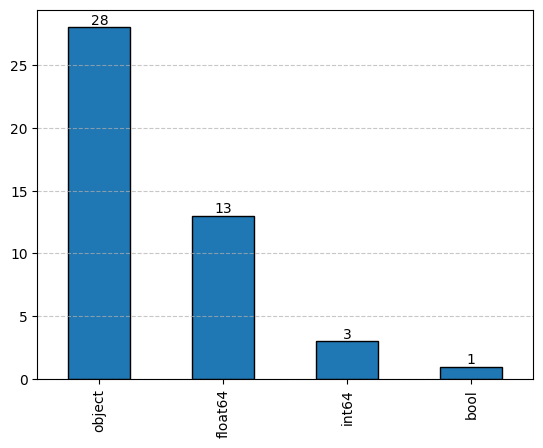

In [18]:
# visualizing the data types count
ax=df.dtypes.value_counts().plot(kind='bar',edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
df.nunique()

student_id                  1009
full_name                   1001
age                           10
email                       1006
phone_number                1009
gender                         2
birth_country                 10
secondary_address            587
building_number              360
street_name                 1003
street_suffix                200
city                         985
postcode                     609
state_abbr                     8
admission_year                12
hsc_year                      12
program                        1
scholarship                    2
university_transport           2
learning_mode                  2
has_phone                      2
has_laptop                     2
english_proficiency            3
on_probation                   2
is_suspended                   2
has_consulted_teacher          2
relationship                   4
co_curricular                  2
living_arrangement             2
health_issues                  2
disabiliti

Program column has only one unique value and hence it does not provide any information to the model for trainig.

In [20]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_features=df[numerical_columns]
numerical_columns

Index(['student_id', 'age', 'building_number', 'postcode', 'admission_year',
       'hsc_year', 'current _semester', 'study_hours', 'study_sessions',
       'social_media_hours', 'average_attendance', 'skills_development_hours',
       'previous_gpa', 'current_gpa', 'completed_credits', 'house_income'],
      dtype='object')

In [21]:
numerical_features.isnull().sum()

student_id                  0
age                         0
building_number             0
postcode                    0
admission_year              0
hsc_year                    0
current _semester           0
study_hours                 0
study_sessions              0
social_media_hours          0
average_attendance          0
skills_development_hours    0
previous_gpa                0
current_gpa                 0
completed_credits           0
house_income                0
dtype: int64

In [22]:
numerical_features.nunique()

student_id                  1009
age                           10
building_number              360
postcode                     609
admission_year                12
hsc_year                      12
current _semester             21
study_hours                   28
study_sessions                14
social_media_hours            19
average_attendance            62
skills_development_hours      12
previous_gpa                 251
current_gpa                  186
completed_credits            130
house_income                 139
dtype: int64

In [23]:
numerical_features.describe()

student_id          age  building_number     postcode  admission_year  \
count  1009.000000  1009.000000      1009.000000  1009.000000     1009.000000   
mean    673.108028    21.368285       180.305253  3153.528246     2040.321110   
std     311.377223     1.614943       273.531962  1768.243964      629.677177   
min       7.000000    18.000000         0.000000   202.000000     2013.000000   
25%     410.000000    20.000000         6.000000  2602.000000     2020.000000   
50%     685.000000    21.000000        46.000000  2691.000000     2021.000000   
75%     941.000000    22.000000       237.000000  2960.000000     2022.000000   
max    1193.000000    26.000000       998.000000  9941.000000    22022.000000   

          hsc_year  current _semester  study_hours  study_sessions  \
count  1009.000000        1009.000000  1009.000000     1009.000000   
mean   2019.251734          43.000991     3.334616        2.066898   
std       1.346681         266.874155     2.096762        1.034492   
min    2012.000000           1.000000     0.000000        0.000000   
25%    2019.000000           3.000000     2.000000        1.000000   
50%    2020.000000           8.000000     3.000000        2.000000   
75%    2020.000000          10.000000     4.000000        2.000000   
max    2028.000000        2022.000000    30.000000       10.000000   

       social_media_hours  average_attendance  skills_development_hours  \
count         1009.000000         1009.000000               1009.000000   
mean             3.439296           88.111001                  2.224975   
std              2.439363           16.079094                  1.473957   
min              0.000000            0.000000                  0.000000   
25%              2.000000           80.000000                  1.000000   
50%              3.000000           95.000000                  2.000000   
75%              4.000000          100.000000                  3.000000   
max             20.000000          100.000000                 20.000000   

       previous_gpa  current_gpa  completed_credits  house_income  
count   1009.000000  1009.000000        1009.000000  1.009000e+03  
mean       2.756482     3.211343          76.936571  6.349576e+04  
std        0.858012     0.731698          47.733885  7.927658e+04  
min        0.000000     0.000000           0.000000  2.530000e+03  
25%        2.110000     2.880000          24.000000  3.000000e+04  
50%        2.770000     3.390000          85.000000  5.000000e+04  
75%        3.480000     3.710000         122.000000  7.700000e+04  
max        5.000000     4.670000         147.000000  2.000000e+06

* seems like there are outliers we will deal with them later before training the mdoel

In [24]:

# visualizing the features
for column in numerical_features.columns:
    # Create an interactive histogram for each feature
    fig = px.histogram(numerical_features, x=column, title=f"Histogram for {column}",
                       labels={column: column, 'count': 'Frequency'}, nbins=50)

    fig.show()

In [25]:
# checking for outliers

# Selecting relevant numerical columns
relevant_number_columns=df[['age','admission_year','hsc_year','current _semester','study_hours','study_sessions','social_media_hours','average_attendance','skills_development_hours','previous_gpa','current_gpa','house_income','completed_credits']]

outlier_counts = {}

for column in relevant_number_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]


    outlier_counts[column] = num_outliers


outlier_counts_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_counts_df

Outlier Count
age                                   9
admission_year                        9
hsc_year                             96
current _semester                    32
study_hours                          25
study_sessions                       61
social_media_hours                   68
average_attendance                   36
skills_development_hours              6
previous_gpa                         14
current_gpa                          31
house_income                         50
completed_credits                     0

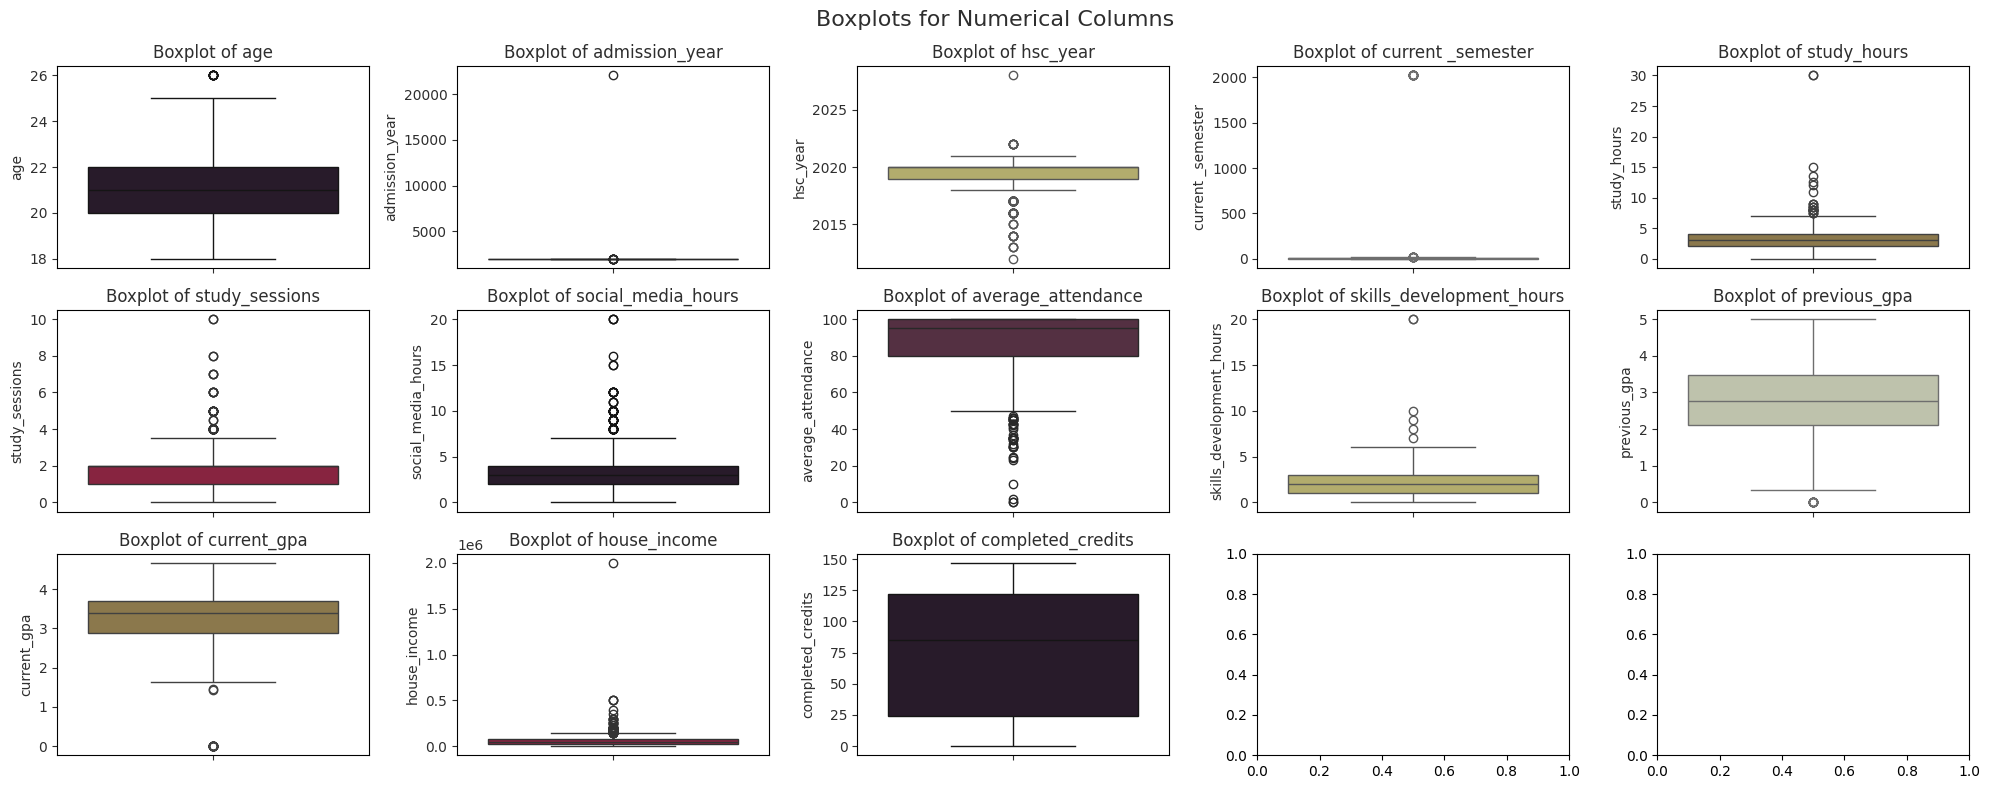

In [26]:

# Define custom colors
custom_colors = ["#2A192C", "#5A2A42", "#BDB562", "#C1C6A8", "#967C41", "#971439"]

# Create a 4x4 grid for plotting
fig, axes = plt.subplots(3, 5, figsize=(20, 8))
axes = axes.flatten()  # Flatten for easy iteration
# Plot boxplots for each column
for i, column in enumerate(relevant_number_columns):
    sns.boxplot(y=df[column], ax=axes[i], color=custom_colors[i % len(custom_colors)])
    axes[i].set_title(f'Boxplot of {column}', color='#2E2E2E')
    axes[i].set_ylabel(column, color='#2E2E2E')
    axes[i].tick_params(axis='x', colors='#2E2E2E')
    axes[i].tick_params(axis='y', colors='#2E2E2E')


# Add title and caption
plt.suptitle('Boxplots for Numerical Columns', fontsize=16, color='#2E2E2E')


plt.tight_layout()
plt.show()

we can see few outliers in various relevant columns we will deal with them later before training the model

In [27]:
#getting a statistical approach for skewness
for column in numerical_features.columns:
    skewness = skew(df[column])
    print(f"Skewness for {column}: {skewness}")


Skewness for student_id: -0.11886374486405377
Skewness for age: 0.7719259841226793
Skewness for building_number: 1.6115393649907384
Skewness for postcode: 2.039966784540649
Skewness for admission_year: 31.71731543757041
Skewness for hsc_year: -0.9618216962410063
Skewness for current _semester: 7.282762823934059
Skewness for study_hours: 4.817192880070724
Skewness for study_sessions: 2.1681480754744737
Skewness for social_media_hours: 2.272907308424995
Skewness for average_attendance: -2.0211413744722804
Skewness for skills_development_hours: 4.179902422466498
Skewness for previous_gpa: -0.4351707932297124
Skewness for current_gpa: -2.41640985283069
Skewness for completed_credits: -0.1269320736555341
Skewness for house_income: 15.367128881867696


we can see alot of columns are skewed and this need to be addressed we will do this later in this notebook. if the skewness does not fall between -1 to 1 then those columns are skewed.

In [28]:
numerical_columns

Index(['student_id', 'age', 'building_number', 'postcode', 'admission_year',
       'hsc_year', 'current _semester', 'study_hours', 'study_sessions',
       'social_media_hours', 'average_attendance', 'skills_development_hours',
       'previous_gpa', 'current_gpa', 'completed_credits', 'house_income'],
      dtype='object')

In [29]:
# trying to visualize the relation of target with the other features

# List of numerical plot_features excluding 'target'
plot_features = ['age', 'admission_year', 'hsc_year', 'current _semester','study_hours','study_sessions','social_media_hours','average_attendance','skills_development_hours','previous_gpa','current_gpa','completed_credits','house_income']

# Generate interactive scatter plots for each feature
for feature in plot_features:
    fig = px.scatter(df, x=feature, y='target',
                     title=f'target vs {feature}',
                     labels={feature: feature, 'target': 'target'},
                     template='plotly_dark')
    fig.show()


Now lets look at the Categorical featues

In [30]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['full_name', 'email', 'phone_number', 'gender', 'birth_country',
       'secondary_address', 'street_name', 'street_suffix', 'city',
       'state_abbr', 'program', 'scholarship', 'university_transport',
       'learning_mode', 'has_phone', 'has_laptop', 'english_proficiency',
       'on_probation', 'is_suspended', 'has_consulted_teacher', 'relationship',
       'co_curricular', 'living_arrangement', 'health_issues', 'disabilities',
       'target', 'skills', 'area_of_interest', 'has_diploma'],
      dtype='object')

In [31]:
categorical_features=df[categorical_columns]

In [32]:
categorical_features.describe()

full_name                   email  phone_number gender  \
count              1009                    1009          1009   1009   
unique             1001                    1006          1009      2   
top     Melissa Preston  michelle11@example.org  (08)35431944   Male   
freq                  2                       2             1    557   

       birth_country secondary_address     street_name street_suffix  \
count           1009              1009            1009          1009   
unique            10               587            1003           200   
top               AU          Level 2   Jennifer Chase       Terrace   
freq             882                19               2            13   

                city state_abbr  ... has_consulted_teacher relationship  \
count           1009       1009  ...                  1009         1009   
unique           985          8  ...                     2            4   
top     Johnsonmouth         WA  ...                   Yes       Single   
freq               3        145  ...                   532          730   

       co_curricular living_arrangement health_issues disabilities target  \
count           1009               1009          1009         1009   1009   
unique             2                  2             2            2      4   
top               No             Family            No           No   Poor   
freq             578                542           830          988    503   

             skills area_of_interest has_diploma  
count          1008             1002        1009  
unique           68               20           2  
top     Programming         Software       False  
freq            380              296         992  

[4 rows x 29 columns]

In [33]:
categorical_features.isnull().sum()

full_name                0
email                    0
phone_number             0
gender                   0
birth_country            0
secondary_address        0
street_name              0
street_suffix            0
city                     0
state_abbr               0
program                  0
scholarship              0
university_transport     0
learning_mode            0
has_phone                0
has_laptop               0
english_proficiency      0
on_probation             0
is_suspended             0
has_consulted_teacher    0
relationship             0
co_curricular            0
living_arrangement       0
health_issues            0
disabilities             0
target                   0
skills                   1
area_of_interest         7
has_diploma              0
dtype: int64

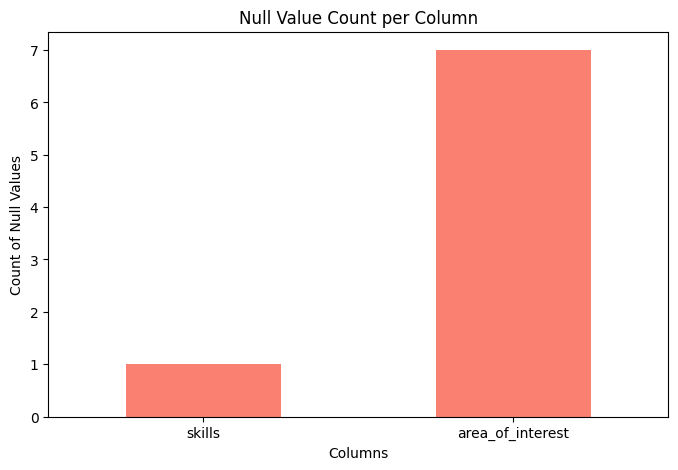

Data types of columns with null values:
skills              object
area_of_interest    object
dtype: object


In [34]:
# Selecting columns with null values
null_counts = categorical_features.isnull().sum()
null_counts = null_counts[null_counts > 0]  # Keep only columns with null values

# Plotting the bar chart
plt.figure(figsize=(8, 5))
null_counts.plot(kind='bar', color='salmon')
plt.xlabel('Columns')
plt.ylabel('Count of Null Values')
plt.title('Null Value Count per Column')
plt.xticks(rotation=0)

plt.show()


# Displaying data types of columns with null values
print("Data types of columns with null values:")
print(df[null_counts.index].dtypes)

In [35]:
categorical_features.skills.head()

0    Web development skill(Frontend)
1                        Programming
2                        Programming
3                        Programming
4    Web development skill(Frontend)
Name: skills, dtype: object

In [36]:
categorical_features.skills.unique()

array(['Web development skill(Frontend)', 'Programming',
       'Content creation', 'Programming, Software Development',
       'Programming, Microsoft office', 'Programming, Cyber security',
       'Software Development skill,', 'Programming, Photography',
       'Programming, Web development', 'Web development skill(Frontend),',
       'Web development skill(Backend),', 'Networking',
       'Programming, Networking', 'Web development skill(Backend)',
       'Programming, Digital Marketing', 'Cyber security',
       'Cyber security, Networking', 'Basic', 'Networking, Nothing',
       'Software Development skill', 'Networking, MIS',
       'Cyber security, Phishing', 'Digital Marketing, Teaching',
       'Programming, Microsoft Excel',
       'Programming, Designing(Photoshop), video',
       'Programming, Mentoring', 'Photographey', 'I do not',
       'Programming, Cyber security,', 'Programming, Mechine Learning',
       'learner', 'No skill', 'Basic knowledge of', 'System analysis',

In [37]:
categorical_features.area_of_interest.head()

0                          Networking
1                        Data Science
2    Machine Learning / Deep Learning
3             Artificial Intelligence
4                     Web Development
Name: area_of_interest, dtype: object

In [38]:
categorical_features.area_of_interest.unique()

array(['Networking', 'Data Science', 'Machine Learning / Deep Learning',
       'Artificial Intelligence', 'Web Development', 'Software', 'UI/UX',
       'Hardware', 'Software, Hardware', 'Hardware, Physics',
       'Cyber Security', 'Creating a game using a program language ',
       'Software, App', 'Software, BCS ', 'confuse', 'Web developing ',
       'Software, Blockchain Engineering', 'Teaching', 'Cybersecurity ',
       'Competitive programming ', nan], dtype=object)

we will deal with null values later in this notebook before training the model.

In [39]:
#checking for no. of unique values

categorical_features.nunique()

full_name                1001
email                    1006
phone_number             1009
gender                      2
birth_country              10
secondary_address         587
street_name              1003
street_suffix             200
city                      985
state_abbr                  8
program                     1
scholarship                 2
university_transport        2
learning_mode               2
has_phone                   2
has_laptop                  2
english_proficiency         3
on_probation                2
is_suspended                2
has_consulted_teacher       2
relationship                4
co_curricular               2
living_arrangement          2
health_issues               2
disabilities                2
target                      4
skills                     68
area_of_interest           20
has_diploma                 2
dtype: int64

Columns with low cardinality can bes used to visualization of data

In [40]:

# Get columns where unique count is less than 11
low_unique_cols = [col for col in df.columns if df[col].nunique() < 11]

for column in low_unique_cols:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':\n")
    print("\n".join(map(str, unique_values)))
    print("\n" + "=" * 50 + "\n")

Unique values in column 'age':

22.0
20.0
21.0
19.0
24.0
23.0
25.0
26.0
23.6
18.0


Unique values in column 'gender':

Female
Male


Unique values in column 'birth_country':

AU
NZ
IN
PH
CA
ZA
TH
US
BR
IE


Unique values in column 'state_abbr':

 QLD
 TAS
 NSW
 WA
 NT
 ACT
 VIC
 SA


Unique values in column 'program':

BCSE


Unique values in column 'scholarship':

Yes
No


Unique values in column 'university_transport':

No
Yes


Unique values in column 'learning_mode':

Offline
Online


Unique values in column 'has_phone':

Yes
No


Unique values in column 'has_laptop':

Yes
No


Unique values in column 'english_proficiency':

Basic
Advance
Intermediate


Unique values in column 'on_probation':

Yes
No


Unique values in column 'is_suspended':

No
Yes


Unique values in column 'has_consulted_teacher':

Yes
No


Unique values in column 'relationship':

Single
In a relationship
Married
Engaged


Unique values in column 'co_curricular':

No
Yes


Unique values in column 'living_arrangem

In [41]:
df['target'].value_counts()

target
Poor         503
Average      272
Good         178
Excellent     56
Name: count, dtype: int64

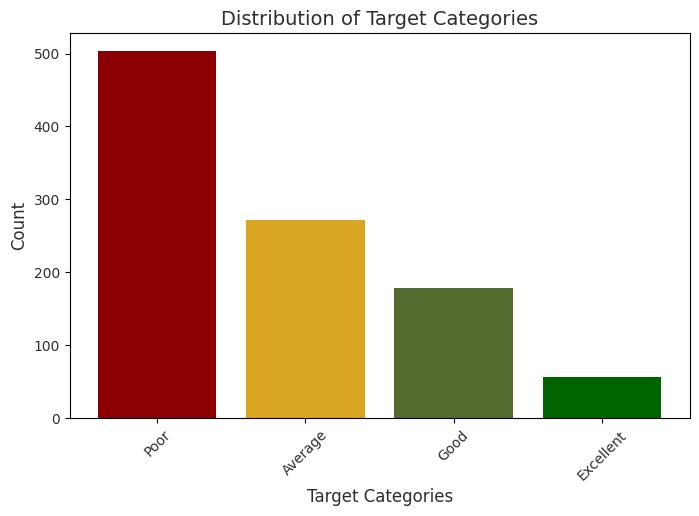

In [42]:


# Define colors for different categories
colors = {
    "Poor": "#8B0000",       # Dark Red
    "Average": "#DAA520",    # Goldenrod
    "Good": "#556B2F",       # Dark Olive Green
    "Excellent": "#006400"   # Dark Green
}

# Count occurrences of each unique value in 'target'
target_counts = df["target"].value_counts()

# Plot bar graph
plt.figure(figsize=(8, 5))
plt.bar(target_counts.index, target_counts.values, color=[colors[val] for val in target_counts.index])

# Labeling
plt.xlabel("Target Categories", fontsize=12, color="#2E2E2E")
plt.ylabel("Count", fontsize=12, color="#2E2E2E")
plt.title("Distribution of Target Categories", fontsize=14, color="#2E2E2E")

# Improve readability of x-axis labels
plt.xticks(rotation=45, color="#2E2E2E")
plt.yticks(color="#2E2E2E")

# Show plot
plt.show()

Almost 50 percent of the students are performing poor: this shows academic difficulties due to some reasons.

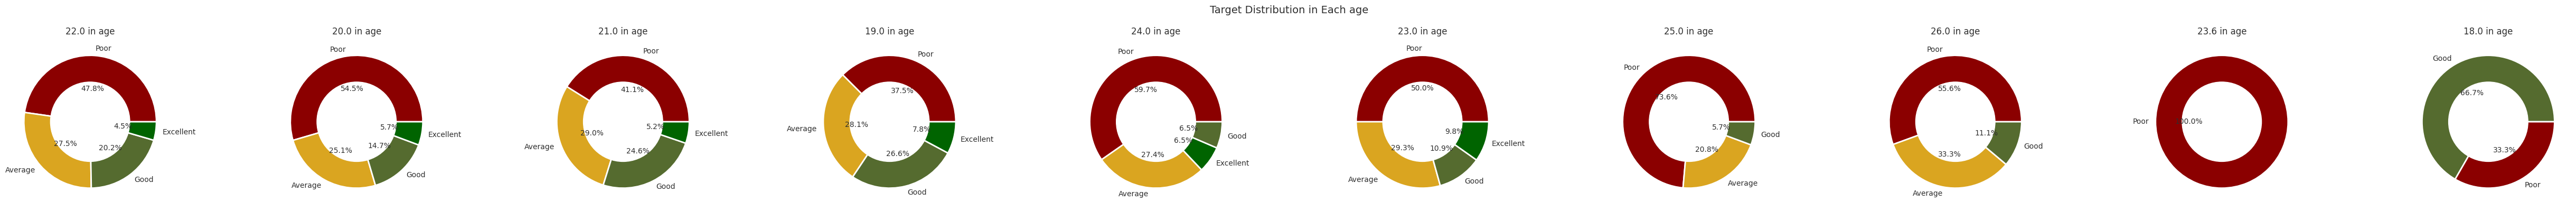

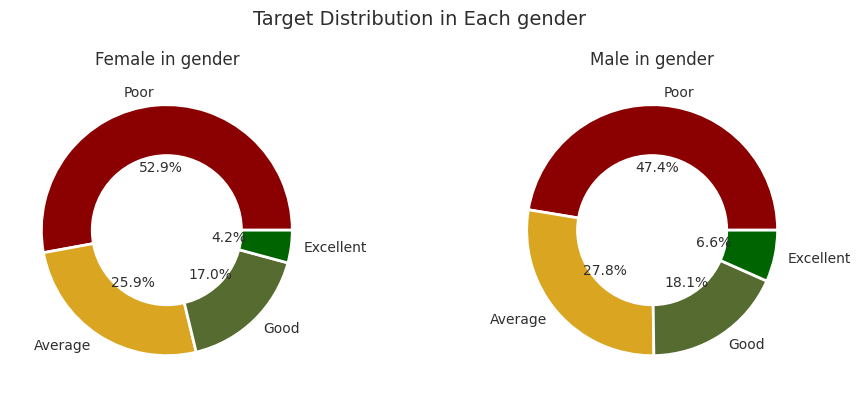

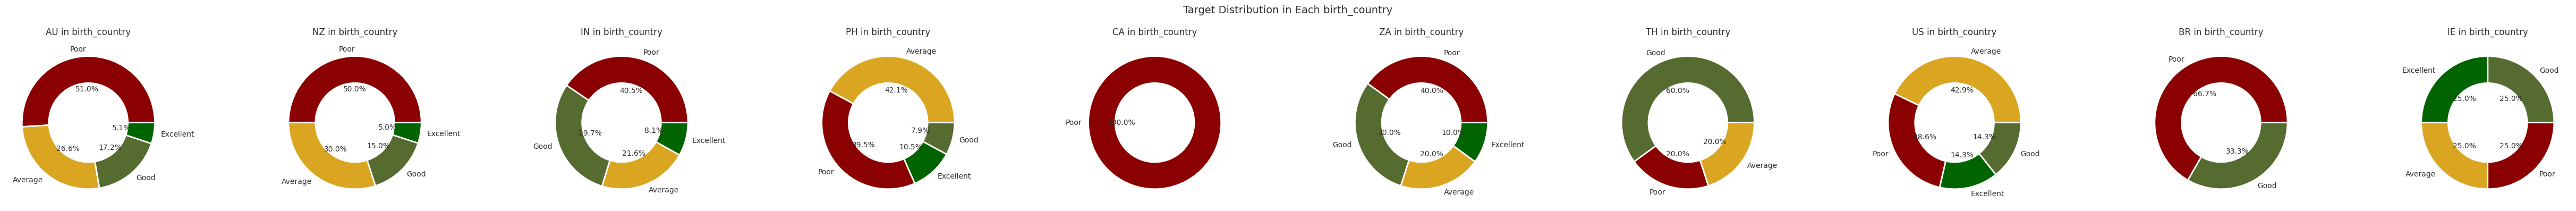

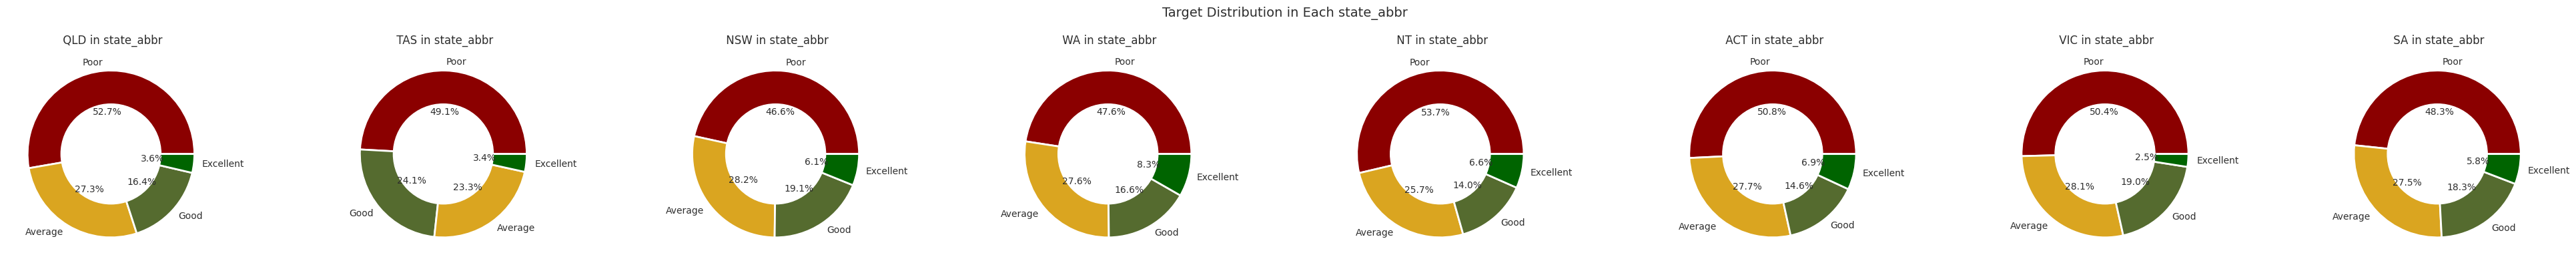

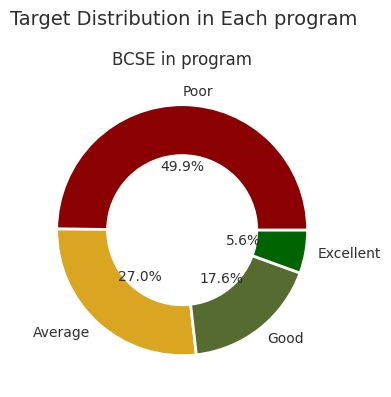

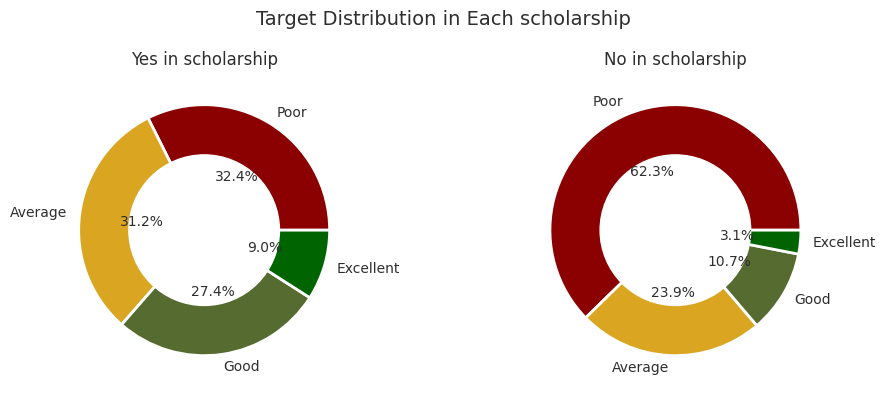

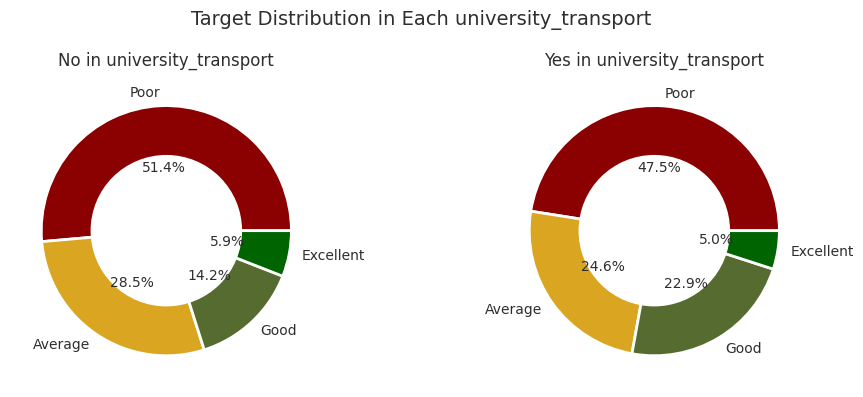

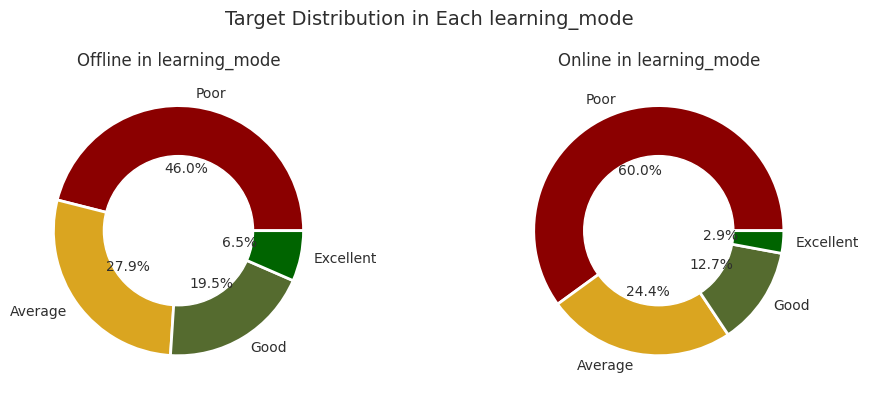

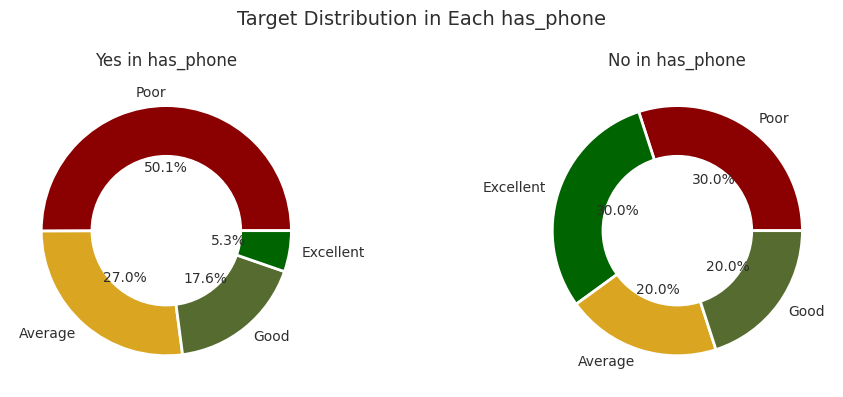

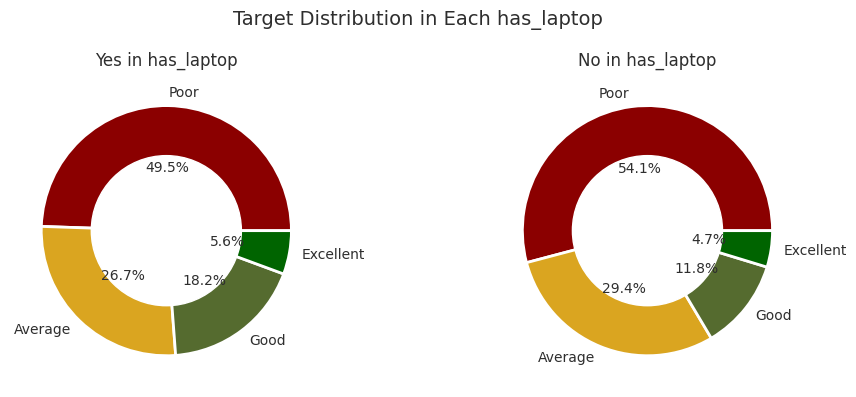

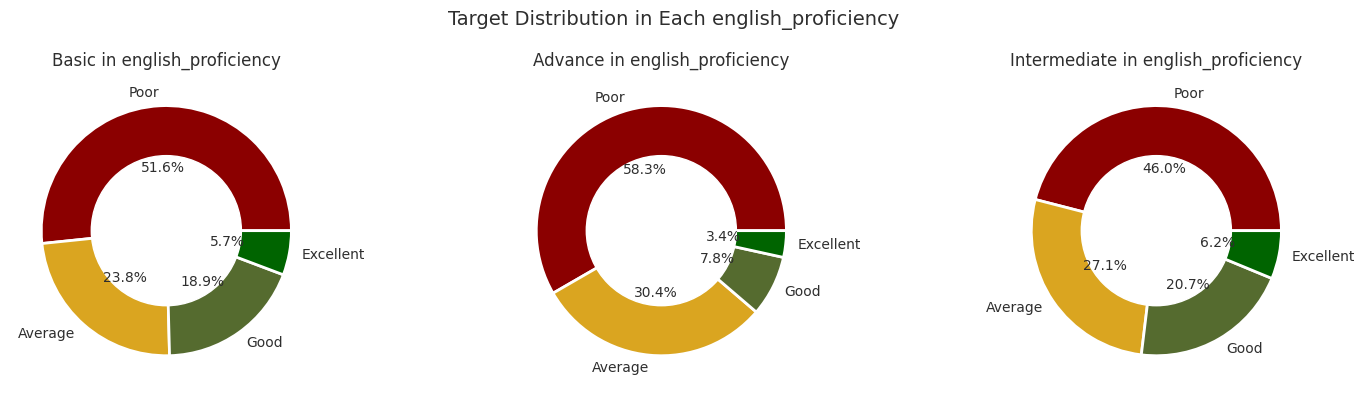

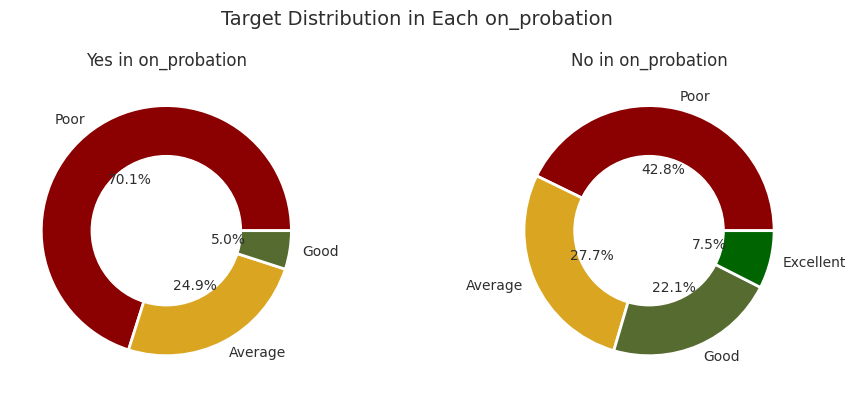

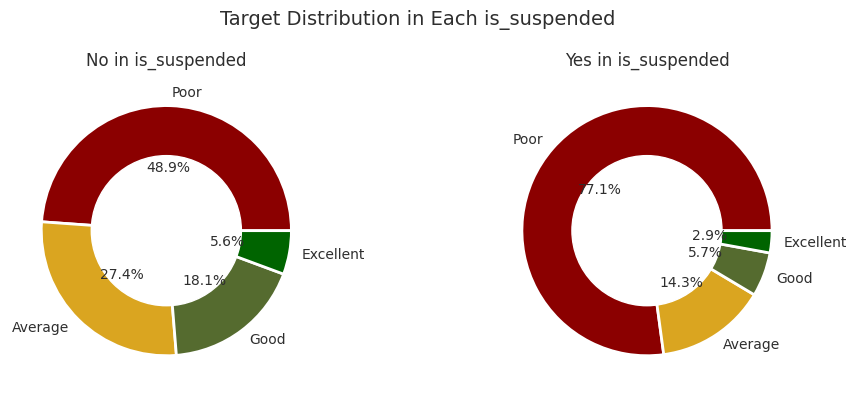

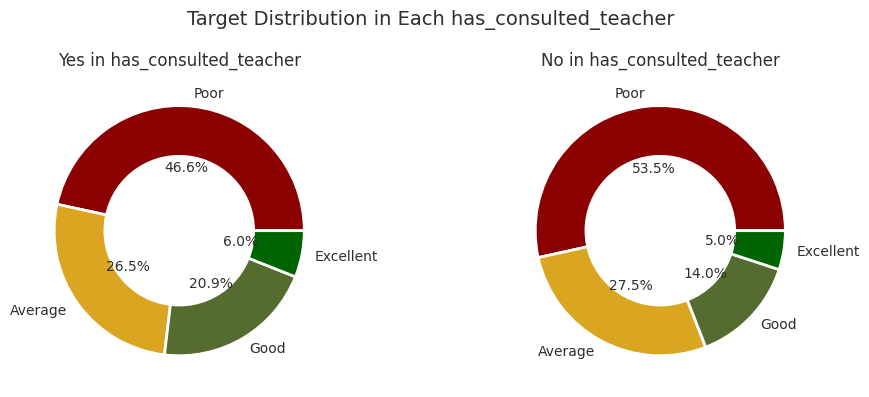

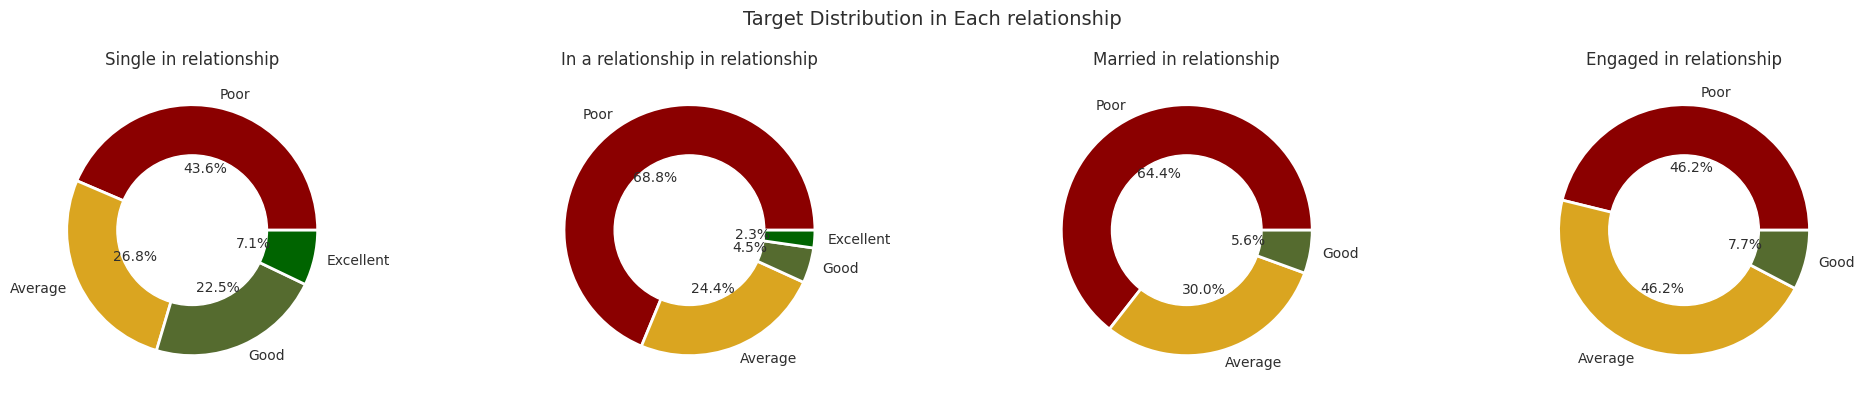

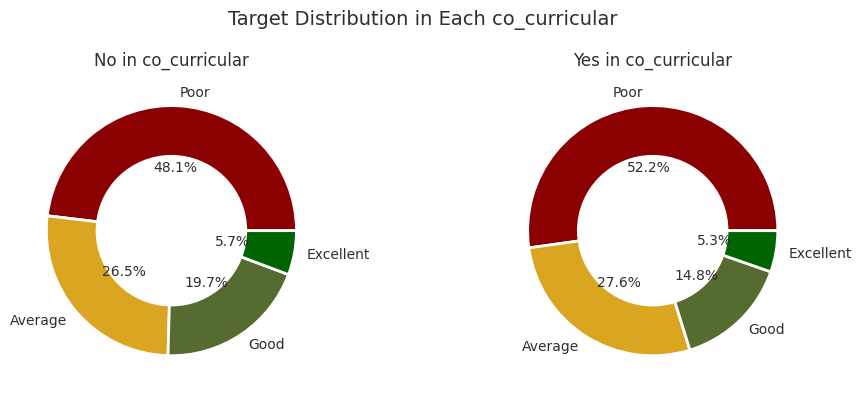

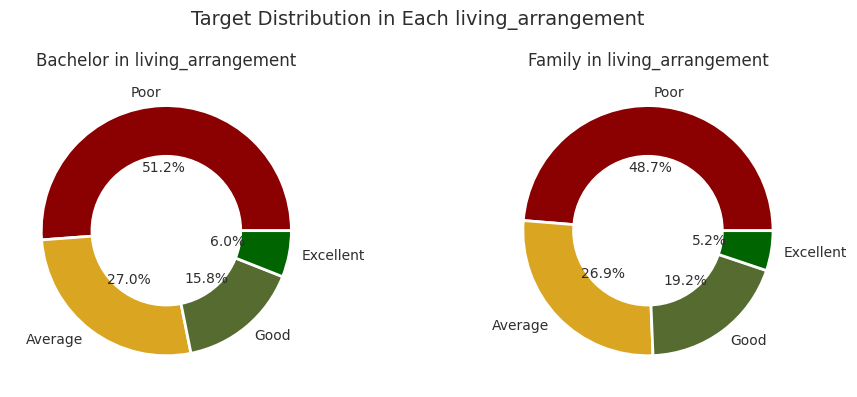

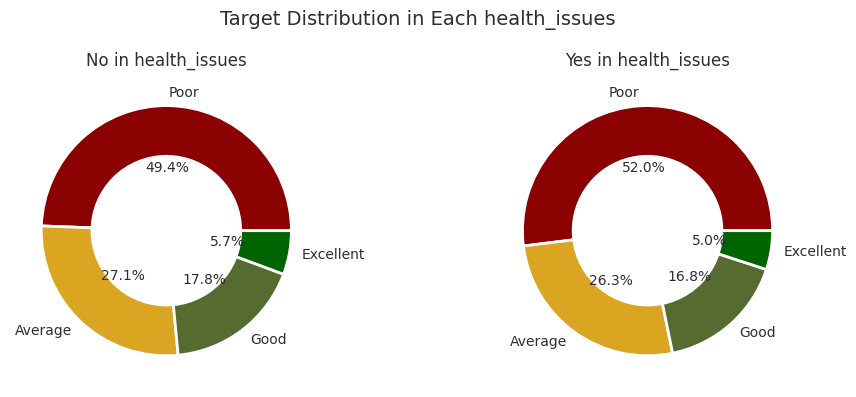

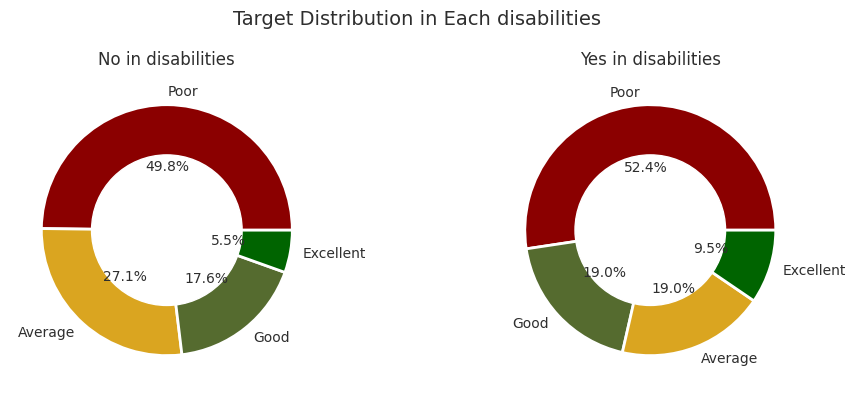

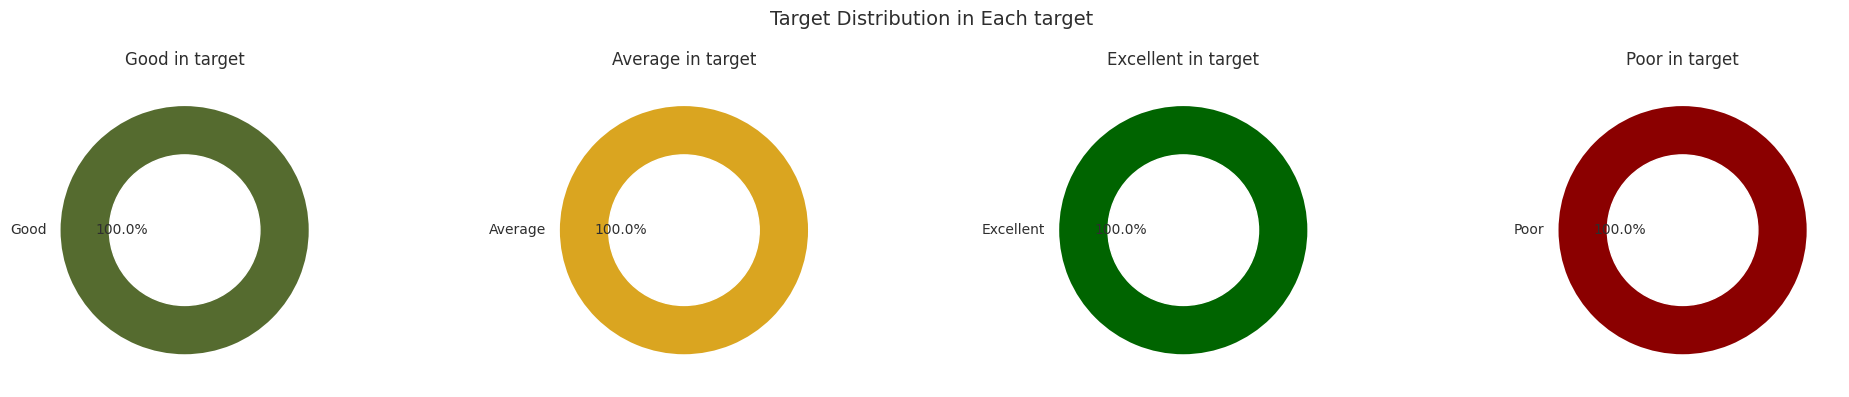

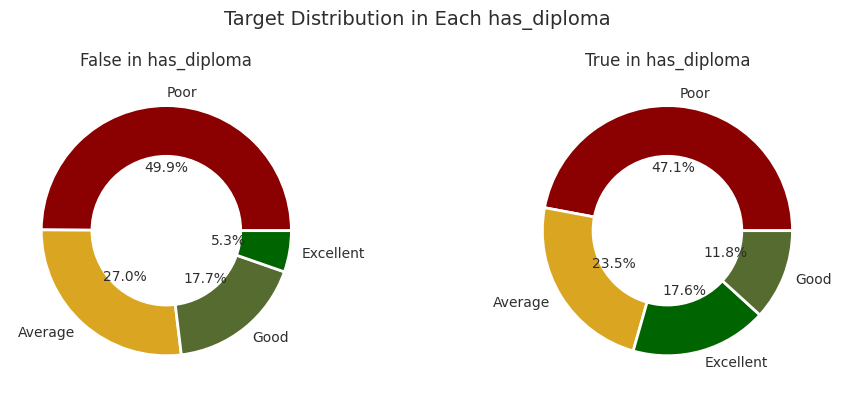

In [43]:
# making the above chart for all the low_unique_cols
# Loop through each column in low_unique_cols and generate pie charts
for col in low_unique_cols:
    unique_values = df[col].unique()

    # Create subplots for the unique values in the column
    fig, axes = plt.subplots(1, len(unique_values), figsize=(len(unique_values) * 5, 4))

    # Ensure axes is always iterable (handles single value case)
    if len(unique_values) == 1:
        axes = [axes]

    # Generate pie charts for each unique value in the column
    for ax, value in zip(axes, unique_values):
        target_counts = df[df[col] == value]["target"].value_counts()

        wedges, texts, autotexts = ax.pie(
            target_counts,
            labels=target_counts.index,
            colors=[colors[target] for target in target_counts.index],
            autopct='%1.1f%%',
            wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
            textprops={'color': '#2E2E2E', 'fontsize': 10},
            labeldistance=1.1,
            pctdistance=0.5
        )

        # Add a central circle for donut effect
        center_circle = plt.Circle((0, 0), 0.6, color='white')
        ax.add_artist(center_circle)

        # Set title for each subplot
        ax.set_title(f"{value} in {col}", fontsize=12, color="#2E2E2E")

    # Add an overall title for the figure
    plt.suptitle(f"Target Distribution in Each {col}", fontsize=14, color="#2E2E2E")
    plt.tight_layout()
    plt.show()

The graphs above give the below insights
- Students from NSW and WA perform slightly better than other states.  
- Scholarship students are more likely to perform well than non-scholarship students.  
- Offline learners perform better than online learners.  
- Students without phones perform significantly better than students with phones.  
- Students with laptops perform slightly better than those without.  
- Intermediate English proficiency correlates with better performance compared to basic or advanced proficiency.  
- Students not on probation perform better than those on probation.  
- Non-suspended students are much more likely to perform well than suspended students.  
- Students who consult teachers perform slightly better than those who don't.  
- Single students may have better academic performance.  
- Being in a relationship or married negatively impacts student performance.  
- Engaged students show a neutral effect on performance.  


In [44]:
df.columns

Index(['student_id', 'full_name', 'age', 'email', 'phone_number', 'gender',
       'birth_country', 'secondary_address', 'building_number', 'street_name',
       'street_suffix', 'city', 'postcode', 'state_abbr', 'admission_year',
       'hsc_year', 'program', 'scholarship', 'university_transport',
       'learning_mode', 'has_phone', 'has_laptop', 'english_proficiency',
       'on_probation', 'is_suspended', 'has_consulted_teacher', 'relationship',
       'co_curricular', 'living_arrangement', 'health_issues', 'disabilities',
       'target', 'current _semester', 'study_hours', 'study_sessions',
       'social_media_hours', 'average_attendance', 'skills',
       'skills_development_hours', 'area_of_interest', 'previous_gpa',
       'current_gpa', 'completed_credits', 'has_diploma', 'house_income'],
      dtype='object')

Now lets try to find correlation between the columns and with the target column and gain some insights about the columns

In [45]:
# Convert categorical target column to numerical labels
exp_df=df.copy()
# Selecting categorical columns with unique values <= 10
exp_categorical_columns = [col for col in exp_df.select_dtypes(include=['object','bool'])
                       if exp_df[col].nunique() < 11]

# Encoding categorical values as numerical
for col in exp_categorical_columns:
    exp_df[col] = exp_df[col].astype('category').cat.codes

# Display the transformed DataFrame
print(exp_df.head())


   student_id          full_name   age                     email  \
0           7        Lauren Moon  22.0  kimberlypark@example.org   
1          11        Larry Green  22.0      smithamy@example.net   
2          15    Alexander Scott  20.0          qlee@example.org   
3          18  Jonathan Thornton  21.0       cmorgan@example.com   
4          20        Susan Smith  21.0         xtodd@example.com   

   phone_number  gender  birth_country secondary_address  building_number  \
0  (08)35431944       0              0          Unit 93                 0   
1  (07)35774291       1              0          Level 2                43   
2      20356212       1              5              937/               96   
3     0627-6253       1              0          Level 3                 5   
4     9957-3583       0              0               00/                5   

       street_name  ... social_media_hours average_attendance  \
0      April Amble  ...                2.0              100.0  

Lets first check correlation of numerical columns which we have right now.

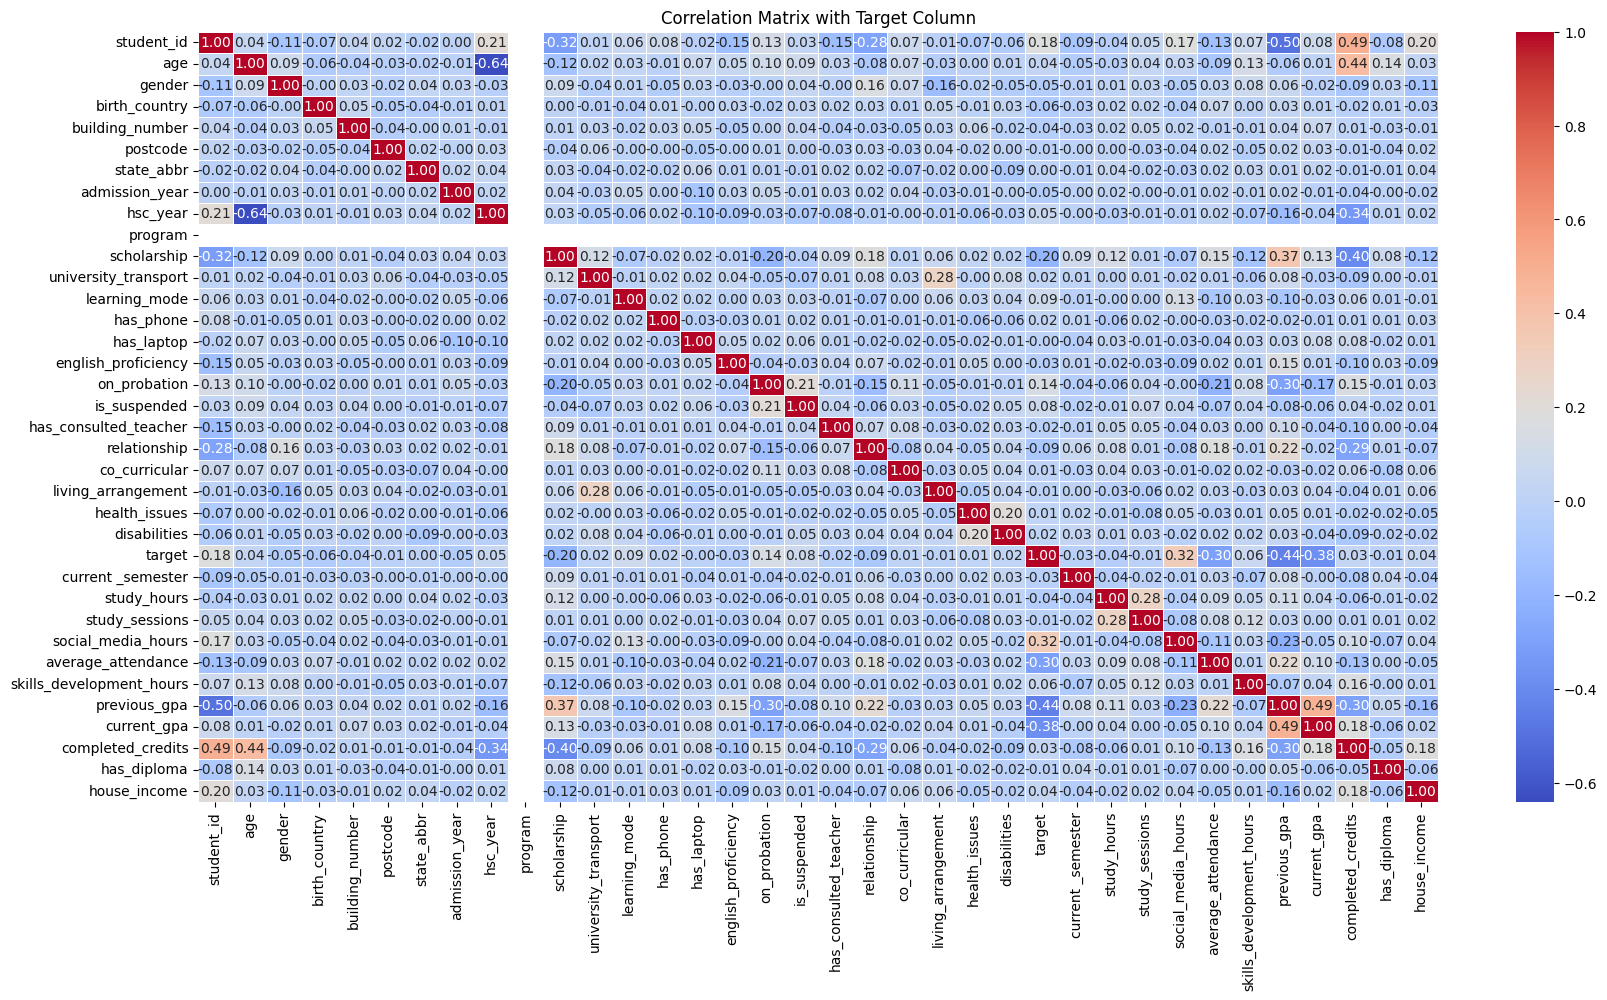

In [46]:


# Compute correlation matrix (using encoded target column)
correlation_matrix = exp_df[exp_df.select_dtypes(include=['number']).columns].corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix with Target Column")
plt.show()



Based on the **correlation matrix** in the image, here are some key takeaways regarding student performance (**target column**) and related variables:

### **1. Strong Academic Indicators**
- **Previous GPA vs. Current GPA (0.46 correlation):** This suggests that students who had strong academic performance in the past tend to maintain or improve their GPA.
- **Completed Credits vs. Age (0.44 correlation):** Older students tend to have completed more credits, possibly indicating experience or progression in their studies.

### **2. Attendance & Performance Relationship**
- **Average Attendance vs. Current GPA:** There appears to be a moderate **positive correlation**, implying that students with higher attendance rates tend to perform better academically.

### **3. Social Media & Study Habits**
- **Social Media Hours vs. Study Hours:** there is a **negative correlation**, it suggests that excessive social media usage might reduce the time dedicated to studying, potentially affecting performance.

### **4. Financial & Scholarship Insights**
- **House Income vs. Scholarship:** If a correlation exists, it could indicate whether students from different economic backgrounds tend to receive scholarships.

### **5. Factors Potentially Affecting Academic Performance**
- **Health Issues & Performance:** If there is a noticeable correlation between health concerns and academic outcomes, interventions may be necessary to support students with health challenges.
- **Living Arrangement & Performance:** If correlations exist, it could suggest whether students who live alone or with family perform differently.



now lets try dealing with the left over categorical features and see correlation again.

In [47]:
#Cleaning categorical columns
exp_df_categorical_columns = exp_df.select_dtypes(include=['object','bool']).columns
exp_df[exp_df_categorical_columns].nunique()

full_name            1001
email                1006
phone_number         1009
secondary_address     587
street_name          1003
street_suffix         200
city                  985
skills                 68
area_of_interest       20
dtype: int64

In [48]:
releveant_exp_df_categorical_columns=['skills','area_of_interest']

In [49]:
for items in releveant_exp_df_categorical_columns:
  print(items+' : '+str(exp_df[items].unique()))
  print(12*"+++++++++++++++")

skills : ['Web development skill(Frontend)' 'Programming' 'Content creation'
 'Programming, Software Development' 'Programming, Microsoft office'
 'Programming, Cyber security' 'Software Development skill,'
 'Programming, Photography' 'Programming, Web development'
 'Web development skill(Frontend),' 'Web development skill(Backend),'
 'Networking' 'Programming, Networking' 'Web development skill(Backend)'
 'Programming, Digital Marketing' 'Cyber security'
 'Cyber security, Networking' 'Basic' 'Networking, Nothing'
 'Software Development skill' 'Networking, MIS' 'Cyber security, Phishing'
 'Digital Marketing, Teaching' 'Programming, Microsoft Excel'
 'Programming, Designing(Photoshop), video' 'Programming, Mentoring'
 'Photographey' 'I do not' 'Programming, Cyber security,'
 'Programming, Mechine Learning' 'learner' 'No skill' 'Basic knowledge of'
 'System analysis' 'No skills' 'Memorizing' 'Nothing'
 'Photography & videography' 'Programming, SEO' 'data entry'
 'Programming, Php' nan 'I

In [50]:

# Cleaning function
def clean_area_of_interest(text):
    if pd.isnull(text) or text.strip().lower() == 'confuse':
      return 'confuse'  # Replace NaN and 'confuse' with "confuse"
    text = text.strip()  # Remove leading/trailing spaces
    text = text.lower()  # Convert to lowercase for uniformity
    text = text.replace(' / ', ', ')  # Standardizing delimiter
    text = text.replace(' ,', ',')  # Fixing spacing issues
    text = text.replace('creating a game using a program language', 'game development')  # Standardize order
    text = text.replace('software, hardware', 'hardware, software')  # Standardize order
    text = text.replace('web developing', 'web development')  # Standardizing common terms
    text = text.replace('cybersecurity ', 'cyber security')  # Removing extra space
    return text

# Apply cleaning function
exp_df['area_of_interest'] = exp_df['area_of_interest'].apply(clean_area_of_interest)

# Display cleaned DataFrame

print(exp_df.area_of_interest.unique())

['networking' 'data science' 'machine learning, deep learning'
 'artificial intelligence' 'web development' 'software' 'ui/ux' 'hardware'
 'hardware, software' 'hardware, physics' 'cyber security'
 'game development' 'software, app' 'software, bcs' 'confuse'
 'software, blockchain engineering' 'teaching' 'cybersecurity'
 'competitive programming']


In [51]:

# Cleaning function
def clean_skills(text):
    if pd.isnull(text) or text.strip().lower() in ['nothing', 'no skill', 'no skills', 'i do not', 'i have no', "i don't", 'nothing properly', 'nothing much','basic knowledge of']:
        return np.nan  # Replace vague or missing skills with NaN
    text = text.strip().lower()  # Remove spaces & convert to lowercase
    text = text.replace('mechine learning', 'machine learning')  # Correct spelling
    text = text.replace('photographey', 'photography')  # Correct spelling
    text = text.replace('vedio editing', 'video editing')  # Correct spelling
    text = text.replace('programming, strating....', 'programming')  # Fix incomplete entry
    text = text.replace('working on web', 'web development')  # Standardization

    text = text.replace('graphics designing', 'graphic design')  # Consistent naming
    text = text.replace('graphic designing', 'graphic design')  # Standardize term
    text = text.replace('e-commerce, digital marketing', 'digital marketing')  # Standardization
    text = text.replace('photography & videography', 'photography, videography')  # Uniform format
    text = text.replace('programming, drawing', 'programming, designing')  # Reclassification
    text = text.replace('programming, mentoring', 'mentoring')  # Reclassification
    text = text.replace('programming, networking, digital', 'programming, networking')  # Simplify category
    text = text.replace('cyber security, phishing', 'cyber security')  # Standardization
    text = text.replace('programming, microsoft office', 'programming, office tools')  # Standardization
    text = text.replace('programming, microsoft excel', 'programming, office tools')  # Merge similar skills
    text = text.replace('web development skill(frontend)', 'frontend development')  # Rename for clarity
    text = text.replace('web development skill(backend)', 'backend development')  # Rename for clarity
    return text

# Apply cleaning function
exp_df['skills'] = exp_df['skills'].apply(clean_skills)

# Display cleaned DataFrame
print(exp_df.skills.unique())

['frontend development' 'programming' 'content creation'
 'programming, software development' 'programming, office tools'
 'programming, cyber security' 'software development skill,'
 'programming, photography' 'programming, web development'
 'frontend development,' 'backend development,' 'networking'
 'programming, networking' 'backend development'
 'programming, digital marketing' 'cyber security'
 'cyber security, networking' 'basic' 'networking, nothing'
 'software development skill' 'networking, mis'
 'digital marketing, teaching' 'programming, designing(photoshop), video'
 'mentoring' 'photography' nan 'programming, cyber security,'
 'programming, machine learning' 'learner' 'system analysis' 'memorizing'
 'photography, videography' 'programming, seo' 'data entry'
 'programming, php' 'programming, volunteering.' 'programming, designing'
 'cyber security, networking,' 'its on learning' 'graphic design'
 'web development' 'digital marketing' 'teaching' 'video editing and'
 'graphic

In [52]:

# Cleaning function
def clean_skills(text):
    if pd.isnull(text) or text.strip().lower() in ['nothing', 'no skill', 'no skills',
                                                   'learner', 'its on learning', 'networking, nothing']:
        return np.nan  # Replace vague or missing skills with NaN
    text = text.strip().lower()  # Remove spaces & convert to lowercase
    text = text.replace('programming, cyber security,', 'programming, cyber security')  # Remove trailing comma
    text = text.replace('software development skill,', 'software development skill')  # Remove trailing comma
    text = text.replace('software development skill', 'software development')
    text = text.replace('backend development,', 'backend development')  # Remove trailing comma
    text = text.replace('frontend development,', 'frontend development')  # Remove trailing comma
    text = text.replace('graphic design', 'graphics design')  # Standardize naming

    text = text.replace('programming, software development', 'software development')  # Standardize naming
    text = text.replace('programming, cyber security', 'cyber security')  # Standardize naming
    text = text.replace('programming, artificial intelligence', 'artificial intelligence')  # Standardize naming
    text = text.replace('programming, game development', 'game developmen')  # Standardize naming


    text = text.replace('programming, machine learning', 'machine learning') # Standardize naming
    text = text.replace('programming, web development', 'web development')  # Simplify classification
    text = text.replace('programming, video editing', 'video editing')  # Standardize classification
    text = text.replace('programming, designing(photoshop), video', 'programming, graphic design, video editing')  # Standardize skill format
    text = text.replace('cyber security, networking,', 'cyber security, networking')  # Remove trailing comma
    text = text.replace('photography, videography', 'photography, video editing')  # Standardize format
    return text

# Apply cleaning function
exp_df['skills'] = exp_df['skills'].apply(clean_skills)

# Display cleaned DataFrame
print(exp_df.skills.unique())

['frontend development' 'programming' 'content creation'
 'software development' 'programming, office tools' 'cyber security'
 'programming, photography' 'web development' 'backend development'
 'networking' 'programming, networking' 'programming, digital marketing'
 'cyber security, networking' 'basic' nan 'networking, mis'
 'digital marketing, teaching'
 'programming, graphic design, video editing' 'mentoring' 'photography'
 'machine learning' 'system analysis' 'memorizing'
 'photography, video editing' 'programming, seo' 'data entry'
 'programming, php' 'programming, volunteering.' 'programming, designing'
 'graphics design' 'digital marketing' 'teaching' 'video editing and'
 'market analysis' 'learning python' 'video editing' 'problem solving'
 'learning frontend' 'networking, graphics design' 'game developmen'
 'artificial intelligence']


In [53]:

exp_categorical_columns = releveant_exp_df_categorical_columns

# Encoding categorical values as numerical
for col in exp_categorical_columns:
    exp_df[col] = exp_df[col].astype('category').cat.codes

# Display the transformed DataFrame
print(exp_df[releveant_exp_df_categorical_columns].head())

   skills  area_of_interest
0       9                11
1      24                 5
2      24                10
3      24                 0
4       9                18


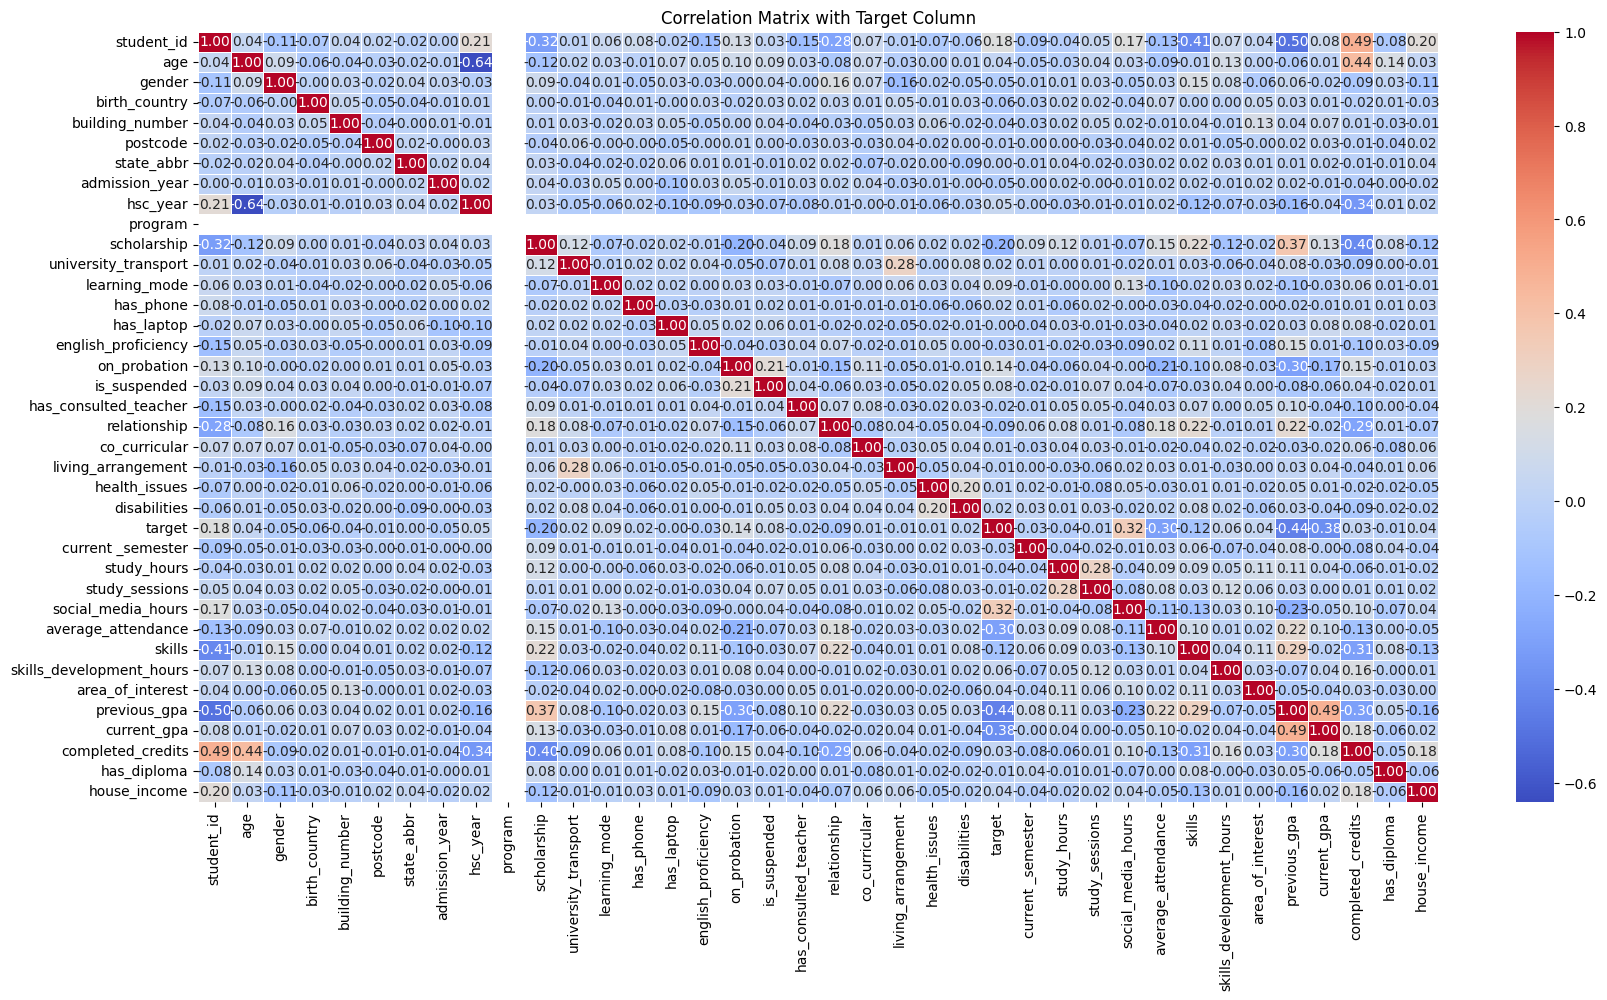

In [54]:

# Compute correlation matrix (using encoded target column)
correlation_matrix = exp_df[exp_df.select_dtypes(include=['number']).columns].corr()

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix with Target Column")
plt.show()

after cleaning the skills column we found it to be slightly related to the target value adding information in future training of the model.

In [55]:
# <Student to fill this section>

dataset_insights = """

Summary of Findings:
- Shape: (1009, 45)
- The `Program` column is irrelevant for training due to having only one unique value.
- Outliers exist in the data and will need handling before model training.
- Many columns are skewed and require transformation to reduce skewness if it falls outside the range of -1 to 1.
- Null values in the dataset need to be dealt with before model training.
- Columns with low cardinality can be leveraged for visualizing patterns.
- 50% of students are performing poorly, indicating significant academic challenges.

Insights from the Graphs:
- Students from NSW and WA perform slightly better than other states.
- Scholarship students outperform non-scholarship students.
- Offline learners perform better than online learners.
- Students without phones perform significantly better than those with phones.
- Students with laptops perform slightly better than those without laptops.
- Intermediate English proficiency is linked to better performance than basic or advanced proficiency.
- Students not on probation outperform those on probation.
- Non-suspended students are more likely to perform well.
- Consulting teachers is associated with slightly better performance.
- Single students perform better than those in relationships or married.
- Being in a relationship or married negatively impacts academic performance.
- Engagement shows a neutral effect on performance.

Correlation Matrix Insights:
- Strong academic indicators like previous GPA and completed credits correlate positively with current GPA and age.
- Attendance correlates positively with academic performance.
- Excessive social media usage negatively impacts study hours and likely academic performance.
- Financial background and scholarship opportunities may be related.
- Health issues and living arrangements could influence performance.

---

Things to Be Done Later:
1. Handle outliers before training the model.
2. Address skewness in columns outside the range of -1 to 1.
3. Impute or clean null values in the dataset.
4. Conduct further data visualization using columns with low cardinality.
5. Use cleaned skills data as a feature during model training for added value.


"""

In [56]:
# Do not modify this code
print_tile(size="h3", key='dataset_insights', value=dataset_insights)

### C.2 Explore Target Variable

In [57]:
# <Student to fill this section>
target_name = 'target'

In [58]:
df.target.head()

0       Good
1       Good
2       Good
3    Average
4       Good
Name: target, dtype: object

In [59]:
df.target.isnull().sum()

np.int64(0)

It has no null values

In [60]:
df.target.describe()

count     1009
unique       4
top       Poor
freq       503
Name: target, dtype: object

In [61]:
#getting a statistical approach for skewness

skewness = skew(exp_df['target'])
print(f"Skewness for {'target'}: {skewness}")


Skewness for target: -0.6018958947420245


it is not skewed

```
# This is formatted as code
```



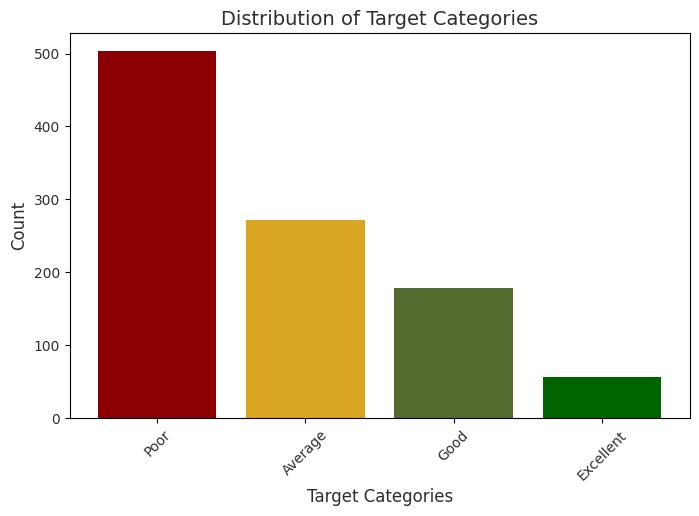

In [62]:


# Define colors for different categories
colors = {
    "Poor": "#8B0000",       # Dark Red
    "Average": "#DAA520",    # Goldenrod
    "Good": "#556B2F",       # Dark Olive Green
    "Excellent": "#006400"   # Dark Green
}

# Count occurrences of each unique value in 'target'
target_counts = df["target"].value_counts()

# Plot bar graph
plt.figure(figsize=(8, 5))
plt.bar(target_counts.index, target_counts.values, color=[colors[val] for val in target_counts.index])

# Labeling
plt.xlabel("Target Categories", fontsize=12, color="#2E2E2E")
plt.ylabel("Count", fontsize=12, color="#2E2E2E")
plt.title("Distribution of Target Categories", fontsize=14, color="#2E2E2E")

# Improve readability of x-axis labels
plt.xticks(rotation=45, color="#2E2E2E")
plt.yticks(color="#2E2E2E")

# Show plot
plt.show()

### **Insights from the Performance Distribution Graph**  
- **Majority of Students Struggle:** The "Poor" category has the highest frequency (~500 students), indicating a significant portion of students are underperforming.  
- **Few Top Performers:** The "Excellent" category has the lowest count (~50 students), suggesting that achieving excellence is rare.  
- **Moderate Performance Levels:** The "Average" category (~300 students) is the second most common, showing that many students maintain a middle-ground performance.  
- **Room for Improvement:** The "Good" category (~200 students) is less common than "Average," highlighting a gap between mediocre and strong performance.  




Few limitations

### **1. Categorical Nature of the Target Variable**
- The `performance` column is **categorical** (`Good, Average, Excellent, Poor`), meaning it cannot be directly used for numerical computations.
- Standard correlation techniques won't work unless it is properly **encoded** (e.g., ordinal encoding or one-hot encoding).
- Converting it into an **ordinal variable** (e.g., Poor = 1, Average = 2, Good = 3, Excellent = 4) may help.

### **2. Potential Class Imbalance**
- If there are significantly more instances of one category (`Poor`) and very few of another (`Excellent`), the model may become **biased** toward the majority class.
- Models trained on imbalanced data tend to perform **poorly on minority classes**, leading to misclassification.









In [63]:
# <Student to fill this section>

target_insights = """
Summary of Findings
1. **No Null Values**: The target variable is complete, with no missing data.
2. **Not Skewed**: The distribution of the target variable is balanced without extreme skewness.
3. **Insights from the Distribution**:
   - **Majority Underperforming**: Almost 50% of students fall into the "Poor" category (~500 students), highlighting a significant academic challenge within the student population.
   - **Rare Excellence**: Only ~50 students are classified as "Excellent," showing that outstanding performance is uncommon.
   - **Moderate Trends**: The "Average" category (~300 students) is the second most common, indicating many students perform at an acceptable but not stellar level.
   - **Gap in Good Performance**: The "Good" category (~200 students) is noticeably smaller than "Average," signifying fewer students transition from average to strong performance.

---

Detailed Analysi
 **Distribution**
The distribution provides valuable insights into the overall academic health of the students:
- A **concentrated Poor performance** reveals the challenges faced by a large group of students. This calls for targeted interventions to address their difficulties.
- The **limited Excellent performance** emphasizes the need for strategies to nurture high-performing students.

Limitations
- **Imbalance in Target Classes**: Although not highly imbalanced, the significant majority in the "Poor" category could lead to a focus on that class during model training, potentially underperforming for minority classes like "Excellent."

Potential Issues
1. **Imbalance During Training**: Models might favor the "Poor" category and underperform on less represented categories like "Excellent" due to the difference in frequencies.

---
"""

In [64]:
# Do not modify this code
print_tile(size="h3", key='target_insights', value=target_insights)

### C.4 Explore Feature of Interest `Social_media_hours`

In [65]:
# <Student to fill this section>

In [66]:
exp_df=df.copy()

In [67]:
df.social_media_hours.head()

0    2.0
1    2.0
2    1.0
3    3.0
4    2.0
Name: social_media_hours, dtype: float64

In [68]:
df.social_media_hours.describe()

count    1009.000000
mean        3.439296
std         2.439363
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        20.000000
Name: social_media_hours, dtype: float64

In [69]:
#getting a statistical approach for skewness

skewness = skew(exp_df['social_media_hours'])
print(f"Skewness for {'social_media_hours'}: {skewness}")


Skewness for social_media_hours: 2.272907308424995


the data seems to be skewed

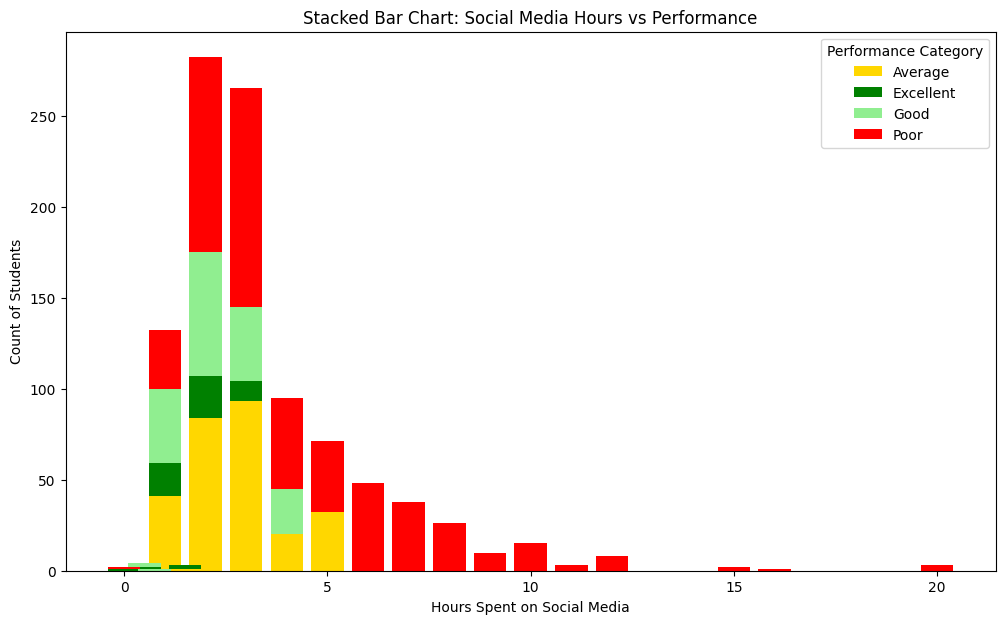

In [70]:

# Define custom colors for each performance category
custom_palette = {
    "Poor": "red",
    "Average": "gold",
    "Good": "lightgreen",
    "Excellent": "green"
}

# Grouping data by social media hours and performance category
grouped_data = exp_df.groupby(["social_media_hours", "target"]).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(12, 7))
bottom_values = [0] * len(grouped_data)  # Initialize bottom values for stacking

for category in grouped_data.columns:
    plt.bar(grouped_data.index, grouped_data[category], color=custom_palette.get(category, "gray"),
            label=category, bottom=bottom_values)
    bottom_values += grouped_data[category]  # Update stacking position

# Formatting
plt.xlabel("Hours Spent on Social Media")
plt.ylabel("Count of Students")
plt.title("Stacked Bar Chart: Social Media Hours vs Performance")
plt.xticks(rotation=0)
plt.legend(title="Performance Category")

# Show plot
plt.show()



### **1. Increased Social Media Use is Linked to Poor Performance**  
- The **red (Poor performance) section grows larger** as social media hours increase, suggesting that excessive social media use **negatively impacts academic performance**.  
- Most students spending **more than 5 hours on social media** are in the poor performance category.  

### **2. Balanced Usage Shows a Mixed Performance Trend**  
- Students who spend **0-3 hours** on social media have a more **balanced mix** of performance levels (Excellent, Good, Average, and Poor).  
- This suggests that **moderate social media usage** does not necessarily harm academic performance.  

### **3. Fewer High Performers as Social Media Hours Increase**  
- The **green (Excellent performance) section gets smaller** as social media hours increase.  
- Very few students who use **more than 5 hours of social media** achieve excellent academic results.

### **Key Takeaways**  
📌 **Excessive social media usage (>5 hours) seems correlated with poor academic performance**.  
📌 **Moderate social media use (~2-3 hours) appears to be manageable for good performance**.  
📌 **Students with excellent performance tend to have lower social media hours**.  


In [71]:
# Finding the correlation statistically
# Define a mapping for numerical encoding
performance_mapping = {"Poor": 1, "Average": 2, "Good": 3, "Excellent": 4}

# Apply mapping
exp_df["target_numeric"] = exp_df["target"].map(performance_mapping)
correlation = exp_df["social_media_hours"].corr(exp_df["target_numeric"])
print(f"Correlation between Social Media Hours and Performance: {correlation:.4f}")

Correlation between Social Media Hours and Performance: -0.3974



## The number of social media hours is highly correlated with the target value as comparitively.

In [72]:
# <Student to fill this section>
feature_1_insights = """
### **Summary of Findings from the Graph**


### **Key Insights**
1. **Excessive Social Media Use Correlates with Poor Performance**:
   - As **social media hours increase**, the **red section (Poor performance)** grows significantly, dominating the distribution.
   - Most students spending **more than 5 hours** on social media fall into the **poor performance category**, indicating that excessive usage negatively affects academic results.

2. **Moderate Usage Reflects Mixed Performance Levels**:
   - For students spending **0-3 hours** on social media, there is a **balanced mix** of performance levels, with students appearing across all categories (Excellent, Good, Average, Poor).
   - Moderate usage does not seem to significantly harm academic performance and may be manageable.

3. **Low Social Media Usage Linked to Higher Performance**:
   - The **green section (Excellent performance)** is more prevalent among students with **0-3 hours** of social media usage.
   - Students achieving **excellent academic results** tend to have lower social media hours, reinforcing the notion that time spent on social media impacts performance.

4. **Decline in High Performers with Increased Hours**:
   - Beyond **5 hours**, the presence of **Excellent** and **Good performance categories** shrinks considerably, showing fewer high-performing students among excessive users.

---

### **Detailed Analysis**
#### **Distribution**:
The stacked bar chart highlights a skewed distribution, with a significant shift towards "Poor" performance as social media hours increase. The visual representation confirms the correlation between high social media usage and academic struggles.

#### **Impacts on Academic Performance**:
1. **Time Mismanagement**:
   - Excessive social media use (>5 hours) may reduce study hours, contributing to poorer academic results.
2. **Performance Moderation**:
   - Students spending 0-3 hours on social media maintain mixed performance levels, indicating that manageable usage does not negatively impact their studies.

#### **Limitations**:
1. **Causation vs Correlation**:
  -The skewed distribution may introduce bias during training, favoring predictions for certain ranges of social media hours over others.

---"""

In [73]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)



```
# This is formatted as code
```

### C.5 Explore Feature of Interest `Average Attendance`

In [74]:
# <Student to fill this section>

In [75]:
df.average_attendance.head()

0    100.0
1     90.0
2     95.0
3     95.0
4     96.0
Name: average_attendance, dtype: float64

In [76]:

df.average_attendance.describe()


count    1009.000000
mean       88.111001
std        16.079094
min         0.000000
25%        80.000000
50%        95.000000
75%       100.000000
max       100.000000
Name: average_attendance, dtype: float64

In [77]:
#getting a statistical approach for skewness

skewness = skew(exp_df['average_attendance'])
print(f"Skewness for {'average_attendance'}: {skewness}")



Skewness for average_attendance: -2.0211413744722804


It appears to be skewed

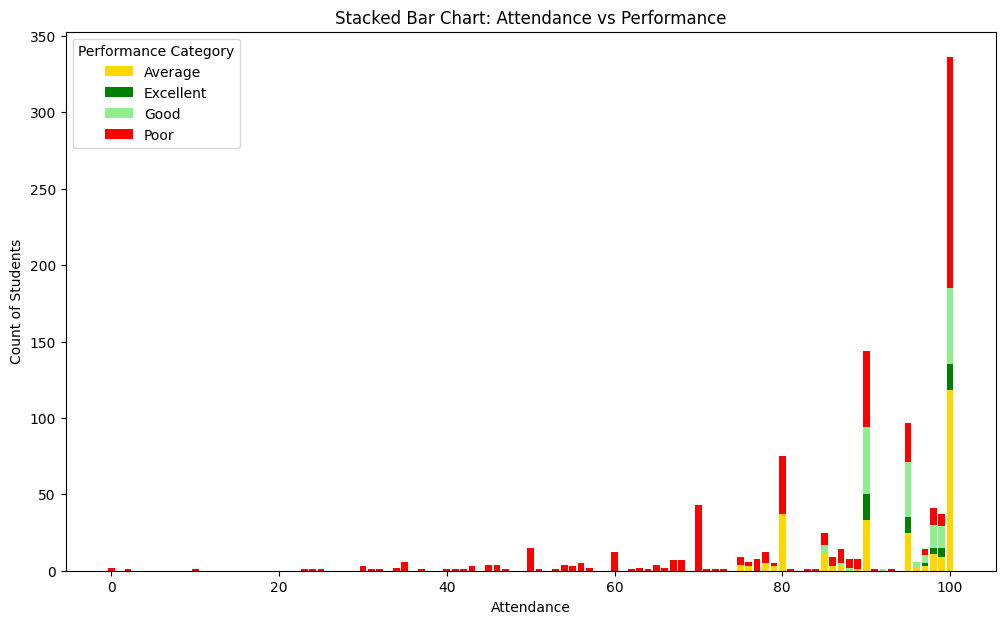

In [78]:

# Define custom colors for each performance category
custom_palette = {
    "Poor": "red",
    "Average": "gold",
    "Good": "lightgreen",
    "Excellent": "green"
}

# Grouping data by attendance and performance category
grouped_data = exp_df.groupby(["average_attendance", "target"]).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(12, 7))
bottom_values = [0] * len(grouped_data)  # Initialize bottom values for stacking

for category in grouped_data.columns:
    plt.bar(grouped_data.index, grouped_data[category], color=custom_palette.get(category, "gray"),
            label=category, bottom=bottom_values)
    bottom_values += grouped_data[category]  # Update stacking position

# Formatting
plt.xlabel("Attendance")
plt.ylabel("Count of Students")
plt.title("Stacked Bar Chart: Attendance vs Performance")
plt.xticks(rotation=0)
plt.legend(title="Performance Category")

# Show plot
plt.show()



### **Key Observations:**
1. **Higher Attendance Correlates with Better Performance**  
   - As attendance **increases**, the number of students with **Excellent (green) and Good (black) performance** also **rises**.  
   - The highest attendance levels have the most students achieving **top performance**.

2. **Low Attendance is Associated with Poor Performance**  
   - The **red bars (Poor performance)** are more frequent and **taller** at **lower attendance levels**, indicating that students who attend less tend to struggle academically.  
   - This suggests that irregular attendance **negatively impacts learning outcomes**.


### **Conclusions:**
📌 **Regular attendance is strongly linked to better academic performance**—students attending more consistently achieve higher grades.  
📌 **Poor attendance is a risk factor for lower performance**, possibly due to missed lectures, assignments, or study routines.  
📌 **Interventions to improve attendance rates** could help boost academic success across all categories.  


In [79]:

# Finding the correlation statistically
# Define a mapping for numerical encoding
performance_mapping = {"Poor": 1, "Average": 2, "Good": 3, "Excellent": 4}

# Apply mapping
exp_df["target_numeric"] = exp_df["target"].map(performance_mapping)
correlation = exp_df["average_attendance"].corr(exp_df["target_numeric"])
print(f"Correlation between Attendance and Performance: {correlation:.4f}")




Correlation between Attendance and Performance: 0.3491


In [80]:
# <Student to fill this section>
feature_2_insights = """
### **Detailed Analysis for Average Attendance**

#### **Feature Distribution**
- The `average_attendance` feature ranges from **0% to 100%**, with a mean value of **88.11%**.
- It is **negatively skewed**, with a skewness of **-2.02**, indicating that the majority of students have high attendance rates closer to 100%.

#### **Insights from the Graph**
1. **Higher Attendance Correlates with Better Performance**:
   - Students with **excellent (green)** and **good (light green)** performance are more prevalent as attendance rates increase.
   - **Students with the highest attendance levels tend to achieve top performance.**

2. **Low Attendance is Linked to Poor Performance**:
   - The **red bars (Poor performance)** are more frequent and taller at lower attendance levels, illustrating that students with lower attendance are more likely to struggle academically.

3. **Balance in Moderate Attendance**:
   - In the mid-attendance range (60–80%), there is a **mixed distribution** across all performance levels, indicating variability in how moderate attendance impacts academic outcomes.



### **Issues**
1. **Skewness**:
   - The negative skewness may affect model training, as most values are concentrated near the upper limit.

"""

In [81]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest `current_gpa`

In [82]:
# <Student to fill this section>

In [83]:
df.current_gpa.head()

0    3.64
1    3.53
2    3.89
3    3.50
4    3.65
Name: current_gpa, dtype: float64

In [84]:
df.current_gpa.describe()

count    1009.000000
mean        3.211343
std         0.731698
min         0.000000
25%         2.880000
50%         3.390000
75%         3.710000
max         4.670000
Name: current_gpa, dtype: float64

In [85]:
#getting a statistical approach for skewness

skewness = skew(exp_df['current_gpa'])
print(f"Skewness for {'current_gpa'}: {skewness}")



Skewness for current_gpa: -2.41640985283069


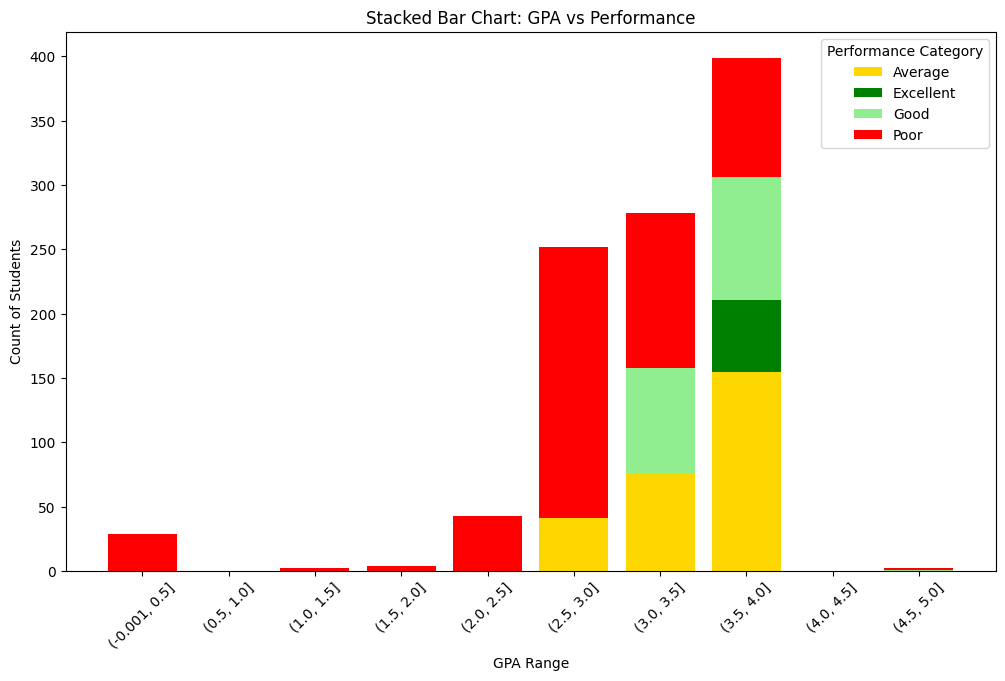

In [86]:

# Define custom color mapping for performance categories
custom_palette = {
    "Poor": "red",
    "Average": "gold",
    "Good": "lightgreen",
    "Excellent": "green"
}

# Define bins for GPA (e.g., grouping into ranges like 0-1, 1-2, etc.)
gpa_bins = np.arange(0, exp_df["current_gpa"].max() + 0.5, 0.5)  # Creates bins every 0.5 units
exp_df["gpa_range"] = pd.cut(exp_df["current_gpa"], bins=gpa_bins, include_lowest=True)

# Group data dynamically by GPA range and performance category
grouped_data = exp_df.groupby(["gpa_range", "target"]).size().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(12, 7))
bottom_values = np.zeros(len(grouped_data))  # Initialize bottom values for stacking

for category in grouped_data.columns:
    plt.bar(grouped_data.index.astype(str), grouped_data[category], color=custom_palette.get(category, "gray"),
            label=category, bottom=bottom_values)
    bottom_values += grouped_data[category]  # Update stacking positions dynamically

# Formatting
plt.xlabel("GPA Range")
plt.ylabel("Count of Students")
plt.title("Stacked Bar Chart: GPA vs Performance")
plt.xticks(rotation=45)
plt.legend(title="Performance Category")

# Show plot
plt.show()

In [87]:
# <Student to fill this section>
feature_n_insights = """
### Insights to Write in the Cell



### **Detailed Analysis**

#### **Feature Distribution**:
- The `current_gpa` feature ranges from **0.00 to 4.67**, with a mean value of **3.21**.
- The feature appears to be **negatively skewed** with a skewness of **-2.42**, indicating that most values cluster toward the higher end of the scale (closer to 3.5-4.0).

#### **Correlation with Performance**:
- Higher `current_gpa` values strongly correlate with better academic performance. Students with **Excellent performance** often fall into the top GPA range (above 4.0).
- Lower GPAs are predominantly associated with **Poor performance**, highlighting its significance in identifying struggling students.

---


#### **Issues**:
1. **Skewness**:
   - The negative skewness needs to be addressed to normalize the data for machine learning algorithms that assume normal distributions.
2. **Potential Outliers**:
   - Extreme GPAs at both ends (e.g., values near 0.00) could affect model predictions disproportionately.

---


"""

In [88]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

---
## D. Feature Selection


### D.1 Approach Selecting numerical features using correlation matrix


In [89]:
# <Student to fill this section>

In [90]:
exp_numerical_features = exp_df.select_dtypes(include=['number'])

In [91]:
exp_numerical_features.isnull().sum()

student_id                  0
age                         0
building_number             0
postcode                    0
admission_year              0
hsc_year                    0
current _semester           0
study_hours                 0
study_sessions              0
social_media_hours          0
average_attendance          0
skills_development_hours    0
previous_gpa                0
current_gpa                 0
completed_credits           0
house_income                0
target_numeric              0
dtype: int64

In [92]:
exp_numerical_features.nunique()

student_id                  1009
age                           10
building_number              360
postcode                     609
admission_year                12
hsc_year                      12
current _semester             21
study_hours                   28
study_sessions                14
social_media_hours            19
average_attendance            62
skills_development_hours      12
previous_gpa                 251
current_gpa                  186
completed_credits            130
house_income                 139
target_numeric                 4
dtype: int64

In [93]:
exp_numerical_features.describe()

student_id          age  building_number     postcode  admission_year  \
count  1009.000000  1009.000000      1009.000000  1009.000000     1009.000000   
mean    673.108028    21.368285       180.305253  3153.528246     2040.321110   
std     311.377223     1.614943       273.531962  1768.243964      629.677177   
min       7.000000    18.000000         0.000000   202.000000     2013.000000   
25%     410.000000    20.000000         6.000000  2602.000000     2020.000000   
50%     685.000000    21.000000        46.000000  2691.000000     2021.000000   
75%     941.000000    22.000000       237.000000  2960.000000     2022.000000   
max    1193.000000    26.000000       998.000000  9941.000000    22022.000000   

          hsc_year  current _semester  study_hours  study_sessions  \
count  1009.000000        1009.000000  1009.000000     1009.000000   
mean   2019.251734          43.000991     3.334616        2.066898   
std       1.346681         266.874155     2.096762        1.034492   
min    2012.000000           1.000000     0.000000        0.000000   
25%    2019.000000           3.000000     2.000000        1.000000   
50%    2020.000000           8.000000     3.000000        2.000000   
75%    2020.000000          10.000000     4.000000        2.000000   
max    2028.000000        2022.000000    30.000000       10.000000   

       social_media_hours  average_attendance  skills_development_hours  \
count         1009.000000         1009.000000               1009.000000   
mean             3.439296           88.111001                  2.224975   
std              2.439363           16.079094                  1.473957   
min              0.000000            0.000000                  0.000000   
25%              2.000000           80.000000                  1.000000   
50%              3.000000           95.000000                  2.000000   
75%              4.000000          100.000000                  3.000000   
max             20.000000          100.000000                 20.000000   

       previous_gpa  current_gpa  completed_credits  house_income  \
count   1009.000000  1009.000000        1009.000000  1.009000e+03   
mean       2.756482     3.211343          76.936571  6.349576e+04   
std        0.858012     0.731698          47.733885  7.927658e+04   
min        0.000000     0.000000           0.000000  2.530000e+03   
25%        2.110000     2.880000          24.000000  3.000000e+04   
50%        2.770000     3.390000          85.000000  5.000000e+04   
75%        3.480000     3.710000         122.000000  7.700000e+04   
max        5.000000     4.670000         147.000000  2.000000e+06   

       target_numeric  
count     1009.000000  
mean         1.788900  
std          0.923694  
min          1.000000  
25%          1.000000  
50%          2.000000  
75%          2.000000  
max          4.000000

In [94]:
# using correaltion fo numerical features


correlation_matrix= exp_numerical_features.corr()
print(correlation_matrix['target_numeric'].sort_values(ascending=False))
correlation_matrix

target_numeric              1.000000
previous_gpa                0.688076
current_gpa                 0.456501
average_attendance          0.349052
study_hours                 0.195313
current _semester           0.061011
building_number             0.037840
study_sessions              0.028290
postcode                    0.022181
admission_year              0.007277
skills_development_hours   -0.052522
hsc_year                   -0.065701
age                        -0.103851
house_income               -0.137837
completed_credits          -0.251450
student_id                 -0.391707
social_media_hours         -0.397438
Name: target_numeric, dtype: float64


student_id       age  building_number  postcode  \
student_id                  1.000000  0.042733         0.036685  0.020536   
age                         0.042733  1.000000        -0.041144 -0.026173   
building_number             0.036685 -0.041144         1.000000 -0.042726   
postcode                    0.020536 -0.026173        -0.042726  1.000000   
admission_year              0.003406 -0.008461         0.013051 -0.003373   
hsc_year                    0.212053 -0.640971        -0.013712  0.034570   
current _semester          -0.093401 -0.047150        -0.025683 -0.003063   
study_hours                -0.036861 -0.026075         0.020053  0.003913   
study_sessions              0.046471  0.038623         0.050496 -0.027182   
social_media_hours          0.174496  0.034666         0.019048 -0.036361   
average_attendance         -0.133576 -0.090853        -0.006988  0.023669   
skills_development_hours    0.071873  0.127448        -0.006807 -0.050243   
previous_gpa               -0.497968 -0.062855         0.035242  0.023077   
current_gpa                 0.079696  0.011112         0.067000  0.032811   
completed_credits           0.490768  0.435914         0.008348 -0.009486   
house_income                0.202774  0.034751        -0.012759  0.021395   
target_numeric             -0.391707 -0.103851         0.037840  0.022181   

                          admission_year  hsc_year  current _semester  \
student_id                      0.003406  0.212053          -0.093401   
age                            -0.008461 -0.640971          -0.047150   
building_number                 0.013051 -0.013712          -0.025683   
postcode                       -0.003373  0.034570          -0.003063   
admission_year                  1.000000  0.019074          -0.004778   
hsc_year                        0.019074  1.000000          -0.004172   
current _semester              -0.004778 -0.004172           1.000000   
study_hours                     0.017500 -0.032521          -0.041967   
study_sessions                 -0.002063 -0.006403          -0.015862   
social_media_hours             -0.005755 -0.010217          -0.011555   
average_attendance              0.019437  0.023724           0.034562   
skills_development_hours       -0.005092 -0.066044          -0.069164   
previous_gpa                    0.021092 -0.156001           0.084201   
current_gpa                    -0.013525 -0.035798          -0.004556   
completed_credits              -0.044174 -0.343164          -0.075381   
house_income                   -0.018200  0.017173          -0.039756   
target_numeric                  0.007277 -0.065701           0.061011   

                          study_hours  study_sessions  social_media_hours  \
student_id                  -0.036861        0.046471            0.174496   
age                         -0.026075        0.038623            0.034666   
building_number              0.020053        0.050496            0.019048   
postcode                     0.003913       -0.027182           -0.036361   
admission_year               0.017500       -0.002063           -0.005755   
hsc_year                    -0.032521       -0.006403           -0.010217   
current _semester           -0.041967       -0.015862           -0.011555   
study_hours                  1.000000        0.278635           -0.039869   
study_sessions               0.278635        1.000000           -0.080848   
social_media_hours          -0.039869       -0.080848            1.000000   
average_attendance           0.088531        0.077594           -0.105009   
skills_development_hours     0.045386        0.122196            0.025117   
previous_gpa                 0.108382        0.030979           -0.231522   
current_gpa                  0.041275        0.003348           -0.045585   
completed_credits           -0.062737        0.011608            0.102406   
house_income                -0.016259        0.016213            0.038691   
target_numeric 

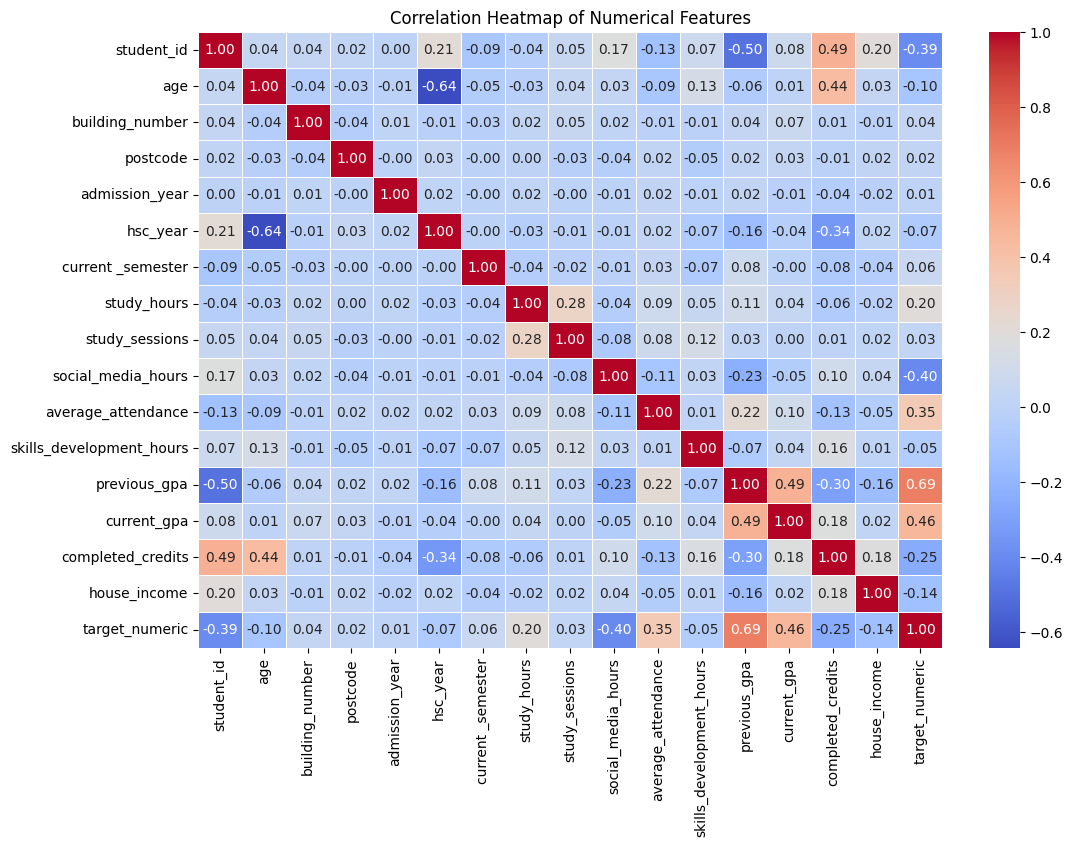

In [95]:
# Compute correlation matrix for numerical features
correlation_matrix = exp_numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Formatting
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [96]:

# Extract relevant numerical feature names based on correlation threshold (>abs(0.05))
selected_numerical_feature_names = correlation_matrix.loc[
    (correlation_matrix["target_numeric"].abs() > 0.05), "target_numeric"
].drop("target_numeric").index.tolist()


selected_numerical_feature_names

['student_id',
 'age',
 'hsc_year',
 'current _semester',
 'study_hours',
 'social_media_hours',
 'average_attendance',
 'skills_development_hours',
 'previous_gpa',
 'current_gpa',
 'completed_credits',
 'house_income']

In [97]:
# <Student to fill this section>
feature_selection_1_insights = """
### **Section D.1 - Approach: Selecting Numerical Features Using Correlation Matrix**

#### **Analysis**
In this section, the correlation matrix was utilized to identify numerical features that are strongly related to the target variable, `target_numeric`. Features with an absolute correlation greater than 0.05 were selected, as this threshold ensures meaningful relationships while excluding weakly correlated features.

#### **Selected Features**
The following numerical features were identified as significant:
- **student_id**: Surprisingly showed some negative correlation, indicating potential grouping patterns.
- **age**: Shows a weak negative correlation with `target_numeric`, potentially capturing performance variation across age groups.
- **hsc_year**: Offers academic progression insights, albeit with weak correlation.
- **current_semester**: Reflects the academic stage of a student, offering context for performance.
- **study_hours**: A moderate positive correlation highlights its importance in performance predictions.
- **social_media_hours**: A moderately negative correlation, underscoring the impact of high social media usage on performance.
- **average_attendance**: Positively correlated, indicating that consistent attendance improves performance.
- **skills_development_hours**: Shows limited correlation but remains useful for broader skill analysis.
- **previous_gpa**: Highly correlated, demonstrating its importance in predicting current performance.
- **current_gpa**: Strongly correlated with `target_numeric` and vital for understanding academic consistency.
- **completed_credits**: Correlates negatively, possibly hinting at workload-related challenges.
- **house_income**: A weak negative correlation suggests socio-economic context might subtly influence academic outcomes.

#### **Approach and Rationale**
- Features were selected based on correlation values, a data-driven approach that ensures the inclusion of impactful variables for model training. The correlation matrix provides transparency into the relationships between features and the target variable.
- Excluding features with very weak correlations avoids unnecessary noise in the model, enhancing predictive accuracy.

#### **Limitations**
- **Linear Relationships Only**: Correlation analysis captures linear relationships but may overlook non-linear patterns.
- """

In [98]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach Selecting categorical features based on transformation and correlation matrix


In [99]:
# <Student to fill this section>

In [100]:
# Extract object (categorical) and boolean features
exp_categorical_features = exp_df.select_dtypes(include=['object', 'bool'])
exp_categorical_features.head()

full_name                     email  phone_number  gender  \
0        Lauren Moon  kimberlypark@example.org  (08)35431944  Female   
1        Larry Green      smithamy@example.net  (07)35774291    Male   
2    Alexander Scott          qlee@example.org      20356212    Male   
3  Jonathan Thornton       cmorgan@example.com     0627-6253    Male   
4        Susan Smith         xtodd@example.com     9957-3583  Female   

  birth_country secondary_address      street_name street_suffix  \
0            AU          Unit 93       April Amble          Brow   
1            AU          Level 2       Davis Crest          Rest   
2            NZ              937/     Emily Little         Drive   
3            AU          Level 3   William Pathway        Circle   
4            AU               00/     Martin Close          Part   

            city state_abbr  ... has_consulted_teacher       relationship  \
0  Chaneyborough        QLD  ...                   Yes             Single   
1  Andrewborough        TAS  ...                    No             Single   
2   New Chadbury        NSW  ...                   Yes             Single   
3    Elliottside         WA  ...                   Yes  In a relationship   
4   Gonzalezberg        TAS  ...                   Yes             Single   

  co_curricular living_arrangement health_issues disabilities   target  \
0            No           Bachelor            No           No     Good   
1            No           Bachelor           Yes           No     Good   
2           Yes             Family            No           No     Good   
3            No             Family            No           No  Average   
4           Yes           Bachelor            No           No     Good   

                            skills                  area_of_interest  \
0  Web development skill(Frontend)                        Networking   
1                      Programming                      Data Science   
2                      Programming  Machine Learning / Deep Learning   
3                      Programming           Artificial Intelligence   
4  Web development skill(Frontend)                   Web Development   

  has_diploma  
0       False  
1       False  
2       False  
3       False  
4       False  

[5 rows x 29 columns]

In [101]:
exp_categorical_features.isnull().sum()

full_name                0
email                    0
phone_number             0
gender                   0
birth_country            0
secondary_address        0
street_name              0
street_suffix            0
city                     0
state_abbr               0
program                  0
scholarship              0
university_transport     0
learning_mode            0
has_phone                0
has_laptop               0
english_proficiency      0
on_probation             0
is_suspended             0
has_consulted_teacher    0
relationship             0
co_curricular            0
living_arrangement       0
health_issues            0
disabilities             0
target                   0
skills                   1
area_of_interest         7
has_diploma              0
dtype: int64

In [102]:
exp_categorical_features.nunique()

full_name                1001
email                    1006
phone_number             1009
gender                      2
birth_country              10
secondary_address         587
street_name              1003
street_suffix             200
city                      985
state_abbr                  8
program                     1
scholarship                 2
university_transport        2
learning_mode               2
has_phone                   2
has_laptop                  2
english_proficiency         3
on_probation                2
is_suspended                2
has_consulted_teacher       2
relationship                4
co_curricular               2
living_arrangement          2
health_issues               2
disabilities                2
target                      4
skills                     68
area_of_interest           20
has_diploma                 2
dtype: int64

we drop program as it has only one unique value and hence it wont be adding information while training the model
* we will add area of interrest and skills after cleaning.

In [103]:
# we selected all the column which at present donot require any hard preprocessing at the moment.

# Extract only feature names where unique values are less than 11
selected_categorical_feature_names = exp_categorical_features.nunique()[exp_categorical_features.nunique() < 11].drop('program').index.tolist()

selected_categorical_feature_names

['gender',
 'birth_country',
 'state_abbr',
 'scholarship',
 'university_transport',
 'learning_mode',
 'has_phone',
 'has_laptop',
 'english_proficiency',
 'on_probation',
 'is_suspended',
 'has_consulted_teacher',
 'relationship',
 'co_curricular',
 'living_arrangement',
 'health_issues',
 'disabilities',
 'target',
 'has_diploma']

In [104]:
# encoding the feature list
encoded_features = exp_df[selected_categorical_feature_names].apply(LabelEncoder().fit_transform)
# Perform Chi-Square test
chi_scores, p_values = chi2(encoded_features, exp_df['target'])

# Create results DataFrame
chi_square_results = pd.DataFrame({
    'Feature': selected_categorical_feature_names,
    'Chi2 Score': chi_scores,
    'P-Value': p_values
})

print(chi_square_results)

                  Feature  Chi2 Score        P-Value
0                  gender    2.104217   5.510602e-01
1           birth_country   34.778166   1.357061e-07
2              state_abbr    1.702311   6.364201e-01
3             scholarship   60.348265   4.952663e-13
4    university_transport    7.757777   5.129218e-02
5           learning_mode   13.587959   3.523201e-03
6               has_phone    0.117845   9.896132e-01
7              has_laptop    0.209128   9.761025e-01
8     english_proficiency    8.907068   3.055233e-02
9            on_probation   60.105765   5.580206e-13
10           is_suspended   10.593683   1.413868e-02
11  has_consulted_teacher    4.497971   2.124713e-01
12           relationship   15.541275   1.407930e-03
13          co_curricular    2.486739   4.776925e-01
14     living_arrangement    1.021327   7.960917e-01
15          health_issues    0.358278   9.487198e-01
16           disabilities    1.135365   7.685444e-01
17                 target  860.184279  3.82910

Keep features with p-value < 0.05 (statistically significant association with target_numeric).



In [105]:
selected_categorical_feature_names = [
    "birth_country",
    "scholarship",
    "university_transport",
    "learning_mode",
    "english_proficiency",
    "on_probation",
    "is_suspended",
    "relationship"
]

* The chi square score is high with low p score, so we are gonna keep these features
* the chi square score is low with high p score,so we are not gonna keep these features as of now for model training .

In [106]:
# <Student to fill this section>
feature_selection_2_insights = """
 Approach: Selecting Categorical Features Based on Transformation and Correlation Matrix**

#### **Analysis**
Categorical features were selected using a two-step approach: transformation and statistical evaluation (Chi-Square test). Features were transformed into numerical formats, allowing for correlation analysis between categorical predictors and the target variable.

#### **Selected Features**
The following categorical features were identified as significant based on their Chi-Square scores and p-values:
1. **birth_country**: Strong association with the target, suggesting geographic factors influence performance.
2. **scholarship**: Students with scholarships show strong correlations to better academic outcomes.
3. **university_transport**: Indicates how transportation access may impact academic performance.
4. **learning_mode**: Offline learners have better performance trends compared to online learners.
5. **english_proficiency**: Intermediate proficiency correlates positively with better academic results.
6. **on_probation**: Students not on probation are more likely to succeed academically.
7. **is_suspended**: Suspension status has a statistically significant impact on performance.
8. **relationship**: Being single correlates positively with better academic results.

#### **Approach and Rationale**
1. **Transformation**:
   - Categorical features were encoded numerically using techniques like Label Encoding to facilitate statistical analysis.

2. **Chi-Square Test**:
   - Evaluated the independence between each categorical feature and the target variable (`target_numeric`).
   - Features with low p-values (< 0.05) and high Chi-Square scores were selected, as they demonstrated significant associations with the target.

#### **Limitations**
1. **Ignoring Interaction Effects**:
   - The Chi-Square test evaluates features individually, potentially ignoring combined influences of multiple features.
2. **Excluding Features with High P-Values**:
   - Some features may still contribute indirectly to predictions but are excluded due to weaker statistical associations.
"""

In [107]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.n Approach "\<describe_approach_here\>"

> You can add more cells related to other approaches in this section

## D.z Final Selection of Features

In [108]:
# <Student to fill this section>

features_list = []
features_list.extend(selected_numerical_feature_names)
features_list.extend(selected_categorical_feature_names)
features_list.append('skills',) # adding this column to be dealt with later, need to be processed
features_list.append('area_of_interest',) # adding this column to be dealt with later, need to be processed
features_list.append('target') # adding the target column

print(features_list)

['student_id', 'age', 'hsc_year', 'current _semester', 'study_hours', 'social_media_hours', 'average_attendance', 'skills_development_hours', 'previous_gpa', 'current_gpa', 'completed_credits', 'house_income', 'birth_country', 'scholarship', 'university_transport', 'learning_mode', 'english_proficiency', 'on_probation', 'is_suspended', 'relationship', 'skills', 'area_of_interest', 'target']


In [109]:
# creating final categorical features df
final_categorical_features=df[selected_categorical_feature_names]
final_categorical_features.head()


birth_country scholarship university_transport learning_mode  \
0            AU         Yes                   No       Offline   
1            AU          No                   No       Offline   
2            NZ         Yes                  Yes       Offline   
3            AU         Yes                   No        Online   
4            AU         Yes                   No       Offline   

  english_proficiency on_probation is_suspended       relationship  
0               Basic          Yes           No             Single  
1               Basic           No           No             Single  
2               Basic           No           No             Single  
3             Advance           No           No  In a relationship  
4        Intermediate           No           No             Single

In [110]:
final_numerical_features=df[selected_numerical_feature_names]
final_numerical_features.head()

student_id   age  hsc_year  current _semester  study_hours  \
0           7  22.0    2019.0                4.0          2.0   
1          11  22.0    2019.0                4.0          3.5   
2          15  20.0    2020.0                4.0          2.0   
3          18  21.0    2020.0                4.0          1.0   
4          20  21.0    2019.0                4.0          3.0   

   social_media_hours  average_attendance  skills_development_hours  \
0                 2.0               100.0                       1.0   
1                 2.0                90.0                       1.0   
2                 1.0                95.0                       3.0   
3                 3.0                95.0                       1.0   
4                 2.0                96.0                       1.0   

   previous_gpa  current_gpa  completed_credits  house_income  
0          3.80         3.64               35.0       32500.0  
1          3.40         3.53               35.0       20000.0  
2          3.93         3.89               35.0       30000.0  
3          3.10         3.50               35.0       25000.0  
4          3.81         3.65               34.0       30000.0

In [111]:
# <Student to fill this section>
feature_selection_explanations = """
### **Section D.z – Final Feature Selection**

#### **Final List of Selected Features**
1. **Numerical Features**:
   - `student_id`
   - `age`
   - `hsc_year`
   - `current_semester`
   - `study_hours`
   - `social_media_hours`
   - `average_attendance`
   - `skills_development_hours`
   - `previous_gpa`
   - `current_gpa`
   - `completed_credits`
   - `house_income`

2. **Categorical Features**:
   - `birth_country`
   - `scholarship`
   - `university_transport`
   - `learning_mode`
   - `english_proficiency`
   - `on_probation`
   - `is_suspended`
   - `relationship`

3. **Additional Features**:
   - `skills` (cleaned and generalized)
   - `area_of_interest` (cleaned and standardized)

4. **Target Variable**:
   - `target`

---

#### **Reasons for Selection**
1. **Numerical Features**:
   - These features were selected based on their correlation with the target variable (`target_numeric`). Features with significant positive or negative correlations were included.
   - For example:
     - `previous_gpa` and `current_gpa` showed high positive correlations with academic performance.
     - `social_media_hours` exhibited a negative correlation, indicating its impact on poor academic results.

2. **Categorical Features**:
   - Categorical features with strong statistical associations (based on the Chi-Square test and low p-values) were selected.
   - Features such as `scholarship` and `on_probation` were found to have significant influence on academic outcomes.

3. **Additional Features**:
   - **Skills** and **Area of Interest**: After cleaning and standardizing, these features could provide valuable insights into students' interests and extracurricular engagement.

---

"""

In [112]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Cleaning

In [113]:
# Do not modify this code
try:
  df_clean = df[features_list].copy()
except Exception as e:
  print(e)

### E.1 Fixing "non standard values in Area_of_interest and skills columns"


In [114]:
df_clean.area_of_interest.nunique() #number of unique values in the column

20

In [115]:
df_clean.area_of_interest.unique() # all the unique values in the group

array(['Networking', 'Data Science', 'Machine Learning / Deep Learning',
       'Artificial Intelligence', 'Web Development', 'Software', 'UI/UX',
       'Hardware', 'Software, Hardware', 'Hardware, Physics',
       'Cyber Security', 'Creating a game using a program language ',
       'Software, App', 'Software, BCS ', 'confuse', 'Web developing ',
       'Software, Blockchain Engineering', 'Teaching', 'Cybersecurity ',
       'Competitive programming ', nan], dtype=object)

In [116]:

# Cleaning function
def clean_area_of_interest(text):
    if pd.isnull(text) or text.strip().lower() == 'confuse':
      return 'confuse'  # Replace NaN and 'confuse' with "confuse"
    text = text.strip()  # Remove leading/trailing spaces
    text = text.lower()  # Convert to lowercase for uniformity
    text = text.replace(' / ', ', ')  # Standardizing delimiter
    text = text.replace(' ,', ',')  # Fixing spacing issues
    text = text.replace('creating a game using a program language', 'game development')  # Standardize order
    text = text.replace('software, hardware', 'hardware, software')  # Standardize order
    text = text.replace('web developing', 'web development')  # Standardizing common terms
    text = text.replace('cybersecurity ', 'cyber security')  # Removing extra space
    return text

# Apply cleaning function
df_clean['area_of_interest'] = df_clean['area_of_interest'].apply(clean_area_of_interest)
# exp= df_clean['area_of_interest'].apply(clean_area_of_interest)

# Display cleaned DataFrame
# print(exp.unique())

print(df_clean.area_of_interest.nunique())
print(df_clean.area_of_interest.unique())









19
['networking' 'data science' 'machine learning, deep learning'
 'artificial intelligence' 'web development' 'software' 'ui/ux' 'hardware'
 'hardware, software' 'hardware, physics' 'cyber security'
 'game development' 'software, app' 'software, bcs' 'confuse'
 'software, blockchain engineering' 'teaching' 'cybersecurity'
 'competitive programming']


In [117]:
df_clean.skills.nunique()# number of unique value in the column

68

In [118]:
df_clean.skills.unique() # all the unique value in the column

array(['Web development skill(Frontend)', 'Programming',
       'Content creation', 'Programming, Software Development',
       'Programming, Microsoft office', 'Programming, Cyber security',
       'Software Development skill,', 'Programming, Photography',
       'Programming, Web development', 'Web development skill(Frontend),',
       'Web development skill(Backend),', 'Networking',
       'Programming, Networking', 'Web development skill(Backend)',
       'Programming, Digital Marketing', 'Cyber security',
       'Cyber security, Networking', 'Basic', 'Networking, Nothing',
       'Software Development skill', 'Networking, MIS',
       'Cyber security, Phishing', 'Digital Marketing, Teaching',
       'Programming, Microsoft Excel',
       'Programming, Designing(Photoshop), video',
       'Programming, Mentoring', 'Photographey', 'I do not',
       'Programming, Cyber security,', 'Programming, Mechine Learning',
       'learner', 'No skill', 'Basic knowledge of', 'System analysis',

In [119]:

# Cleaning function
def clean_skills(text):
    if pd.isnull(text) or text.strip().lower() in ['nothing', 'no skill', 'no skills', 'i do not', 'i have no', "i don't", 'nothing properly', 'nothing much','basic knowledge of']:
        return np.nan  # Replace vague or missing skills with NaN
    text = text.strip().lower()  # Remove spaces & convert to lowercase
    text = text.replace('mechine learning', 'machine learning')  # Correct spelling
    text = text.replace('photographey', 'photography')  # Correct spelling
    text = text.replace('vedio editing', 'video editing')  # Correct spelling
    text = text.replace('programming, strating....', 'programming')  # Fix incomplete entry
    text = text.replace('working on web', 'web development')  # Standardization

    text = text.replace('graphics designing', 'graphic design')  # Consistent naming
    text = text.replace('graphic designing', 'graphic design')  # Standardize term
    text = text.replace('e-commerce, digital marketing', 'digital marketing')  # Standardization
    text = text.replace('photography & videography', 'photography, videography')  # Uniform format
    text = text.replace('programming, drawing', 'programming, designing')  # Reclassification
    text = text.replace('programming, mentoring', 'mentoring')  # Reclassification
    text = text.replace('programming, networking, digital', 'programming, networking')  # Simplify category
    text = text.replace('cyber security, phishing', 'cyber security')  # Standardization
    text = text.replace('programming, microsoft office', 'programming, office tools')  # Standardization
    text = text.replace('programming, microsoft excel', 'programming, office tools')  # Merge similar skills
    text = text.replace('web development skill(frontend)', 'frontend development')  # Rename for clarity
    text = text.replace('web development skill(backend)', 'backend development')  # Rename for clarity
    return text

# Apply cleaning function
df_clean['skills'] = df_clean['skills'].apply(clean_skills)
# exp = df_clean['skills'].apply(clean_skills)

# Display cleaned DataFrame
print(df_clean.skills.unique())
# print(df_clean.unique())


['frontend development' 'programming' 'content creation'
 'programming, software development' 'programming, office tools'
 'programming, cyber security' 'software development skill,'
 'programming, photography' 'programming, web development'
 'frontend development,' 'backend development,' 'networking'
 'programming, networking' 'backend development'
 'programming, digital marketing' 'cyber security'
 'cyber security, networking' 'basic' 'networking, nothing'
 'software development skill' 'networking, mis'
 'digital marketing, teaching' 'programming, designing(photoshop), video'
 'mentoring' 'photography' nan 'programming, cyber security,'
 'programming, machine learning' 'learner' 'system analysis' 'memorizing'
 'photography, videography' 'programming, seo' 'data entry'
 'programming, php' 'programming, volunteering.' 'programming, designing'
 'cyber security, networking,' 'its on learning' 'graphic design'
 'web development' 'digital marketing' 'teaching' 'video editing and'
 'graphic

In [120]:


# Cleaning function
def clean_skills(text):
    if pd.isnull(text) or text.strip().lower() in ['nothing', 'no skill', 'no skills',
                                                   'learner', 'its on learning', 'networking, nothing']:
        return np.nan  # Replace vague or missing skills with NaN
    text = text.strip().lower()  # Remove spaces & convert to lowercase
    text = text.replace('programming, cyber security,', 'programming, cyber security')  # Remove trailing comma
    text = text.replace('software development skill,', 'software development skill')  # Remove trailing comma
    text = text.replace('software development skill', 'software development') # Standardize naming
    text = text.replace('backend development,', 'backend development')  # Remove trailing comma
    text = text.replace('frontend development,', 'frontend development')  # Remove trailing comma
    text = text.replace('graphics design', 'graphic design')  # Standardize naming

    text = text.replace('programming, software development', 'software development')  # Standardize naming
    text = text.replace('programming, cyber security', 'cyber security')  # Standardize naming
    text = text.replace('programming, artificial intelligence', 'artificial intelligence')  # Standardize naming
    text = text.replace('programming, game development', 'game development')  # Standardize naming

    text = text.replace('programming, machine learning', 'machine learning') # Standardize naming
    text = text.replace('programming, web development', 'web development')  # Simplify classification
    text = text.replace('programming, designing(photoshop), video', 'programming, graphic design, video editing')  # Standardize skill format
    text = text.replace('cyber security, networking,', 'cyber security, networking')  # Remove trailing comma
    text = text.replace('photography, videography', 'content creation')  # Standardize format
    return text

# Apply cleaning function
df_clean['skills'] = df_clean['skills'].apply(clean_skills)

# Display cleaned DataFrame
print(df_clean.skills.unique())



['frontend development' 'programming' 'content creation'
 'software development' 'programming, office tools' 'cyber security'
 'programming, photography' 'web development' 'backend development'
 'networking' 'programming, networking' 'programming, digital marketing'
 'cyber security, networking' 'basic' nan 'networking, mis'
 'digital marketing, teaching'
 'programming, graphic design, video editing' 'mentoring' 'photography'
 'machine learning' 'system analysis' 'memorizing' 'programming, seo'
 'data entry' 'programming, php' 'programming, volunteering.'
 'programming, designing' 'graphic design' 'digital marketing' 'teaching'
 'video editing and' 'market analysis' 'learning python'
 'programming, video editing' 'problem solving' 'learning frontend'
 'networking, graphic design' 'game development' 'artificial intelligence']


In [121]:
print(df_clean.skills.nunique())

39


We reduced the number of unique values to 39 by generalizing the names and merging the different duplicate values with same meaning.

In [122]:
# <Student to fill this section>
data_cleaning_1_explanations = """
### **Importance of Fixing Non-Standard Values in `Area_of_interest` and `Skills` Columns**

#### **Why It’s Important**
1. **Data Consistency**:
   - Non-standard values in these columns hinder effective analysis and accurate modeling. Standardizing them ensures consistency across the dataset, enabling clearer insights and more reliable predictions.

2. **Improved Feature Utility**:
   - Columns like `area_of_interest` and `skills` capture significant aspects of student preferences and competencies. Cleaning these values improves their utility in understanding how interests and skills influence performance.

3. **Enhanced Model Accuracy**:
   - Standardized data reduces noise and ambiguity during model training, enhancing prediction accuracy and minimizing errors caused by inconsistent inputs.

4. **Visualization Clarity**:
   - Cleaned data is easier to visualize, helping identify patterns and relationships between student interests/skills and academic performance.

---

#### **Impacts**
Fixing non-standard values in `area_of_interest` and `skills` is essential for preparing the data for the predictive model. It ensures consistency, improves feature utility, and reduces noise, leading to better model accuracy. Standardizing these features enables meaningful analysis and reliable predictions, particularly for understanding how interests and skills influence academic performance.
"""

In [123]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Fixing "outliers"

In [124]:
# <Student to fill this section>

In [125]:
# Selecting the numerical columns from the df_clean to check for the outliers.
exp_df = df_clean[features_list].select_dtypes(include=['number'])

In [126]:
# checking for outliers

# Selecting relevant numerical columns
relevant_number_columns=exp_df.columns

outlier_counts = {}

for column in relevant_number_columns:
    Q1 = exp_df[column].quantile(0.25)
    Q3 = exp_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = exp_df[(exp_df[column] < lower_bound) | (exp_df[column] > upper_bound)].shape[0]


    outlier_counts[column] = num_outliers


outlier_counts_exp_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_counts_exp_df

Outlier Count
student_id                            0
age                                   9
hsc_year                             96
current _semester                    32
study_hours                          25
social_media_hours                   68
average_attendance                   36
skills_development_hours              6
previous_gpa                         14
current_gpa                          31
completed_credits                     0
house_income                         50

In [127]:


# Define custom colors
custom_colors = ["#2A192C", "#5A2A42", "#BDB562", "#C1C6A8", "#967C41", "#971439"]

# Create a 3x5 grid layout
rows, cols = 3, 5
fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=relevant_number_columns)

# Add boxplots to each grid cell
for i, column in enumerate(relevant_number_columns):
    row = (i // cols) + 1  # Calculate row index
    col = (i % cols) + 1   # Calculate column index

    fig.add_trace(
        go.Box(
            y=exp_df[column],
            name=column,
            marker_color=custom_colors[i % len(custom_colors)],  # Assign colors cyclically
            boxmean=True  # Show mean as a marker in the boxplot
        ),
        row=row,
        col=col
    )

# Update layout for titles and formatting
fig.update_layout(
    title="Interactive Boxplots for Numerical Columns (3x5 Grid)",
    height=800,  # Adjust height for better visuals
    width=1200,  # Adjust width for better visuals
    showlegend=False,
    template="plotly_white",
    font=dict(color="#2E2E2E"),
    title_font=dict(size=16, color="#2E2E2E"),
)

# Show the interactive plot
fig.show()

In [128]:
# Filter rows where the possible outliers must be present
age_outlier = exp_df[exp_df['age'] == 26]
hsc_year_outlier = exp_df[exp_df['hsc_year'] == 2028]
current_sem_outlier = exp_df[exp_df['current _semester'] == 2022]
study_hours_outlier = exp_df[exp_df['study_hours'] == 30]
skills_development_hours_outlier = exp_df[exp_df['skills_development_hours'] == 20]
social_media_hours_outlier = exp_df[exp_df['social_media_hours'] == 20]
house_income_outlier = exp_df[exp_df['house_income'] == 2000000]

# Display the filtered data
# List of variables to print
outliers = [
    "age_outlier",
    "hsc_year_outlier",
    "current_sem_outlier",
    "study_hours_outlier",
    "skills_development_hours_outlier",
    "social_media_hours_outlier",
    "house_income_outlier"
]

# Loop through the list
for outlier in outliers:
    print(outlier)
    print(eval(outlier))  # Use eval to evaluate the variable name
    print(12 * '++++++++++++++++++++++++++++++')  # Separator
# house_income_outlier


age_outlier
     student_id   age  hsc_year  current _semester  study_hours  \
50          187  26.0    2014.0               22.0          3.0   
76          213  26.0    2014.0               10.0          4.0   
95          233  26.0    2014.0               17.0          3.0   
162         314  26.0    2018.0               12.0          3.0   
299         465  26.0    2018.0               12.0          8.0   
326         494  26.0    2014.0                3.0          4.5   
365         537  26.0    2014.0                3.0          5.5   
403         576  26.0    2013.0               11.0          1.0   
510         692  26.0    2012.0                9.0          3.0   

     social_media_hours  average_attendance  skills_development_hours  \
50                  1.0               100.0                       5.0   
76                  1.0                70.0                       2.0   
95                  1.0                95.0                       6.0   
162                 2.0  

Upon reviewing the box plot, we have identified a few data points that seem  unusual. These are outlined below for further analysis.
- age outlier seems to be fine
- hsc_year --> 2028 ( in the future )
- current _semseter -->2022 (it does not represent the current semester instead represent the year of current semeseter)
- the study_hours --> 30 hours exceed 24 hours hence incorrect data.
- The skill development hour --> 20 seems suspicious spending 20 hours out of 24 daily for skill development.
- The social media hour --> 20 seems suspicious spending 20 hours out of 24 daily for social media hour.
- family income --> monthly house income of 2 Mils seems to be very much and might hinder model performance

In [129]:
# dealing with hsc_year outliers by taking the median using the age filter
# Filter data points where age is 22
age_22_data = df_clean[df_clean['age'] == 22]

# Calculate the mode of the hsc_year column
hsc_year_mode = age_22_data['hsc_year'].mode()[0]  # Get the mode value

# Replace the outlier's hsc_year value with the mode
df_clean.loc[df_clean['student_id'] == 208, 'hsc_year'] = hsc_year_mode

# Display the updated row with the outlier
print(df_clean.loc[df_clean['student_id'] == 208])

    student_id   age  hsc_year  current _semester  study_hours  \
71         208  22.0    2019.0                8.0          2.5   

    social_media_hours  average_attendance  skills_development_hours  \
71                 4.0                85.0                       1.0   

    previous_gpa  current_gpa  ...  scholarship  university_transport  \
71          3.33          3.1  ...           No                    No   

   learning_mode english_proficiency on_probation is_suspended relationship  \
71       Offline        Intermediate           No           No       Single   

                  skills area_of_interest   target  
71  software development     data science  Average  

[1 rows x 23 columns]


In [130]:
# dealing with current_semester outliers by taking the median using the hsc year filter
# Group by hsc_year and calculate the median of current_semester for each group
median_semester_by_hsc_year = df_clean.groupby('hsc_year')['current _semester'].median()

# Replace the outlier values in current_semester with the median based on hsc_year
df_clean['current _semester'] = df_clean.apply(
    lambda row: median_semester_by_hsc_year[row['hsc_year']]
    if row['current _semester'] == 2022 else row['current _semester'], axis=1
)

# Display the updated DataFrame
current_sem_outlier = df_clean[df_clean['current _semester'] == 2022]
current_sem_outlier

Empty DataFrame
Columns: [student_id, age, hsc_year, current _semester, study_hours, social_media_hours, average_attendance, skills_development_hours, previous_gpa, current_gpa, completed_credits, house_income, birth_country, scholarship, university_transport, learning_mode, english_proficiency, on_probation, is_suspended, relationship, skills, area_of_interest, target]
Index: []

[0 rows x 23 columns]

In [131]:
#dealing with study_hours outliers by taking the median using the age filter
# Loop through each outlier and replace with median study_hours for the respective age
for student_id in [506, 571]:
    # Get the age of the current student
    student_age = df_clean.loc[df_clean['student_id'] == student_id, 'age'].values[0]

    # Calculate the median of study_hours for the respective age
    median_study_hours = df_clean[df_clean['age'] == student_age]['study_hours'].median()

    # Replace the outlier value with the median
    df_clean.loc[df_clean['student_id'] == student_id, 'study_hours'] = median_study_hours

# Display the updated rows to verify the changes
print(df_clean.loc[df_clean['student_id'].isin([506, 571])])

     student_id   age  hsc_year  current _semester  study_hours  \
336         506  19.0    2020.0                2.0          3.5   
399         571  24.0    2016.0               10.0          3.0   

     social_media_hours  average_attendance  skills_development_hours  \
336                 2.0                90.0                       1.0   
399                 0.5                80.0                       0.0   

     previous_gpa  current_gpa  ...  scholarship  university_transport  \
336           2.9         2.90  ...          Yes                    No   
399           3.0         2.85  ...          Yes                    No   

    learning_mode english_proficiency on_probation is_suspended relationship  \
336        Online               Basic          Yes           No       Single   
399       Offline        Intermediate           No           No       Single   

          skills area_of_interest   target  
336  programming         software  Average  
399     teaching        

In [132]:
#dealing with skill development_hours outliers by taking the median using the average attendance filter
# Calculate the median skills_development_hours for each average_attendance value
median_skills_by_attendance = df_clean.groupby('average_attendance')['skills_development_hours'].median()

# Replace the outliers in skills_development_hours based on average_attendance
for student_id in [210, 311]:
    # Get the average_attendance for the current student
    attendance_value = df_clean.loc[df_clean['student_id'] == student_id, 'average_attendance'].values[0]

    # Get the median skills_development_hours for this attendance value
    median_skill_hours = median_skills_by_attendance[attendance_value]

    # Replace the outlier value with the median
    df_clean.loc[df_clean['student_id'] == student_id, 'skills_development_hours'] = median_skill_hours

# Display the updated rows for verification
print(df_clean.loc[df_clean['student_id'].isin([210, 311])])

     student_id   age  hsc_year  current _semester  study_hours  \
73          210  21.0    2020.0                4.0          1.0   
159         311  24.0    2018.0                9.0          1.0   

     social_media_hours  average_attendance  skills_development_hours  \
73                  6.0               100.0                       2.0   
159                 3.0                95.0                       2.0   

     previous_gpa  current_gpa  ...  scholarship  university_transport  \
73           2.83         3.05  ...           No                    No   
159          1.61         2.44  ...           No                    No   

    learning_mode english_proficiency on_probation is_suspended relationship  \
73        Offline               Basic           No           No       Single   
159        Online               Basic          Yes           No       Single   

              skills area_of_interest target  
73       programming         software   Poor  
159  web development

In [133]:
#dealing with social_media_hours outliers by taking the median using the average attendance filter
# Calculate the median social_media_hours for each average_attendance value
median_socials_by_attendance = df_clean.groupby('average_attendance')['social_media_hours'].median()

# Replace the outliers in social_media_hours based on average_attendance
for student_id in [230, 600, 675]:
    # Get the average_attendance for the current student
    attendance_value = df_clean.loc[df_clean['student_id'] == student_id, 'average_attendance'].values[0]

    # Get the median social_media_hours for this attendance value
    median_social_hours = median_socials_by_attendance[attendance_value]

    # Replace the outlier value with the median
    df_clean.loc[df_clean['student_id'] == student_id, 'social_media_hours'] = median_social_hours

# Display the updated rows for verification
print(df_clean.loc[df_clean['student_id'].isin([230, 600, 675])])

     student_id   age  hsc_year  current _semester  study_hours  \
92          230  22.0    2018.0                2.0          1.0   
426         600  23.0    2016.0               14.0          2.0   
495         675  24.0    2018.0               11.0          3.0   

     social_media_hours  average_attendance  skills_development_hours  \
92                  4.0                70.0                       6.0   
426                 4.0                70.0                       1.0   
495                 3.0                90.0                       6.0   

     previous_gpa  current_gpa  ...  scholarship  university_transport  \
92           3.68         3.39  ...          Yes                   Yes   
426          2.75         2.88  ...           No                   Yes   
495          3.45         3.34  ...           No                   Yes   

    learning_mode english_proficiency on_probation is_suspended  \
92        Offline        Intermediate           No           No   
426    

In [134]:
# Drop the rows where house_income is equal to 2000000 as it is possible but is not goood for our model so dropping it is right way
df_clean =df_clean[df_clean['house_income'] != 2000000]

# Display the updated DataFrame
print(df_clean)

      student_id   age  hsc_year  current _semester  study_hours  \
0              7  22.0    2019.0                4.0          2.0   
1             11  22.0    2019.0                4.0          3.5   
2             15  20.0    2020.0                4.0          2.0   
3             18  21.0    2020.0                4.0          1.0   
4             20  21.0    2019.0                4.0          3.0   
...          ...   ...       ...                ...          ...   
1004        1189  20.0    2020.0                8.0          1.0   
1005        1190  23.0    2020.0                8.0          4.0   
1006        1191  22.0    2020.0                9.0          3.0   
1007        1192  25.0    2018.0               11.0          5.0   
1008        1193  23.0    2017.0               11.0          3.0   

      social_media_hours  average_attendance  skills_development_hours  \
0                    2.0               100.0                       1.0   
1                    2.0           

In [135]:
# Add a new variable by summing the values of the specified columns
exp = df_clean['study_hours'] + df_clean['social_media_hours'] + df_clean['skills_development_hours']

# Display the unique values in the total_hours column
expunique=exp.unique()
expunique.sort()
expunique

array([ 2.        ,  3.        ,  3.5       ,  4.        ,  4.5       ,
        5.        ,  5.5       ,  5.66666667,  5.75      ,  6.        ,
        6.34752981,  6.5       ,  7.        ,  7.34752981,  7.5       ,
        8.        ,  8.33333333,  8.34752981,  8.5       ,  9.        ,
        9.5       , 10.        , 10.34752981, 10.5       , 11.        ,
       11.34752981, 11.5       , 12.        , 12.5       , 13.        ,
       13.5       , 14.        , 15.        , 15.5       , 16.        ,
       16.5       , 17.        , 17.5       , 18.        , 19.        ,
       20.        , 22.        , 22.5       , 23.        , 24.        ])

In [136]:
# Extract data points where total_hours exceed 24 hours
exceed_24_hours = df_clean[exp > 24]

# Display the filtered DataFrame
exceed_24_hours

Empty DataFrame
Columns: [student_id, age, hsc_year, current _semester, study_hours, social_media_hours, average_attendance, skills_development_hours, previous_gpa, current_gpa, completed_credits, house_income, birth_country, scholarship, university_transport, learning_mode, english_proficiency, on_probation, is_suspended, relationship, skills, area_of_interest, target]
Index: []

[0 rows x 23 columns]

In [137]:
# <Student to fill this section>
data_cleaning_2_explanations = """
### Importance of Fixing Outliers

#### **Why It’s Important**
1. **Ensures Model Reliability**:
   - Outliers can disproportionately influence the model's parameters and predictions, leading to unreliable outcomes. Addressing these ensures the model captures genuine trends in student performance without noise.

2. **Improves Accuracy**:
   - By removing or adjusting extreme values, the model can better generalize to unseen data and produce accurate predictions for most students.

3. **Prevents Bias**:
   - Outliers may skew results or create bias, particularly for regression-based algorithms. Fixing these ensures a more fair and balanced analysis.

---

#### **Impacts**
1. **Enhanced Predictive Power**:
   - Cleaning outliers improves the model's ability to classify students correctly, especially those at risk (categorized as "poor").

2. **Improved Data Quality**:
   - Handling anomalies like incorrect `current_semester` or excessive `study_hours` ensures the dataset reflects realistic academic scenarios.

"""

In [138]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 Fixing "missing values"

In [139]:
# <Student to fill this section>

In [140]:
df_clean.isnull().sum()

student_id                   0
age                          0
hsc_year                     0
current _semester            0
study_hours                  0
social_media_hours           0
average_attendance           0
skills_development_hours     0
previous_gpa                 0
current_gpa                  0
completed_credits            0
house_income                 0
birth_country                0
scholarship                  0
university_transport         0
learning_mode                0
english_proficiency          0
on_probation                 0
is_suspended                 0
relationship                 0
skills                      15
area_of_interest             0
target                       0
dtype: int64

In [141]:
df_clean.isna().sum() / len(df) * 100

student_id                  0.00000
age                         0.00000
hsc_year                    0.00000
current _semester           0.00000
study_hours                 0.00000
social_media_hours          0.00000
average_attendance          0.00000
skills_development_hours    0.00000
previous_gpa                0.00000
current_gpa                 0.00000
completed_credits           0.00000
house_income                0.00000
birth_country               0.00000
scholarship                 0.00000
university_transport        0.00000
learning_mode               0.00000
english_proficiency         0.00000
on_probation                0.00000
is_suspended                0.00000
relationship                0.00000
skills                      1.48662
area_of_interest            0.00000
target                      0.00000
dtype: float64

In [142]:
df_clean.skills.unique()

array(['frontend development', 'programming', 'content creation',
       'software development', 'programming, office tools',
       'cyber security', 'programming, photography', 'web development',
       'backend development', 'networking', 'programming, networking',
       'programming, digital marketing', 'cyber security, networking',
       'basic', nan, 'networking, mis', 'digital marketing, teaching',
       'programming, graphic design, video editing', 'mentoring',
       'photography', 'machine learning', 'system analysis', 'memorizing',
       'programming, seo', 'data entry', 'programming, php',
       'programming, volunteering.', 'programming, designing',
       'graphic design', 'digital marketing', 'teaching',
       'video editing and', 'market analysis', 'learning python',
       'programming, video editing', 'problem solving',
       'learning frontend', 'networking, graphic design',
       'game development', 'artificial intelligence'], dtype=object)

since the null value consist of only ~1.5 percent so we can drop this data.

In [143]:
# Drop rows with missing values
df_clean = df_clean.dropna()

# Display the updated DataFrame
print("Updated DataFrame after dropping missing values:")
print(df_clean)
df_clean.isna().sum() / len(df) * 100

Updated DataFrame after dropping missing values:
      student_id   age  hsc_year  current _semester  study_hours  \
0              7  22.0    2019.0                4.0          2.0   
1             11  22.0    2019.0                4.0          3.5   
2             15  20.0    2020.0                4.0          2.0   
3             18  21.0    2020.0                4.0          1.0   
4             20  21.0    2019.0                4.0          3.0   
...          ...   ...       ...                ...          ...   
1004        1189  20.0    2020.0                8.0          1.0   
1005        1190  23.0    2020.0                8.0          4.0   
1006        1191  22.0    2020.0                9.0          3.0   
1007        1192  25.0    2018.0               11.0          5.0   
1008        1193  23.0    2017.0               11.0          3.0   

      social_media_hours  average_attendance  skills_development_hours  \
0                    2.0               100.0                

student_id                  0.0
age                         0.0
hsc_year                    0.0
current _semester           0.0
study_hours                 0.0
social_media_hours          0.0
average_attendance          0.0
skills_development_hours    0.0
previous_gpa                0.0
current_gpa                 0.0
completed_credits           0.0
house_income                0.0
birth_country               0.0
scholarship                 0.0
university_transport        0.0
learning_mode               0.0
english_proficiency         0.0
on_probation                0.0
is_suspended                0.0
relationship                0.0
skills                      0.0
area_of_interest            0.0
target                      0.0
dtype: float64

In [144]:
# <Student to fill this section>
data_cleaning_3_explanations = """
### Fixing "Missing Values" in Skills Column

#### **Why It’s Important**
1. **Ensures Data Completeness**:
   - Even though missing values in the `skills` column make up only ~1.5% of the data, handling them ensures the dataset is complete and consistent for model training.

2. **Prevents Bias**:
   - Missing entries can introduce bias or reduce the reliability of the model. Dropping rows with null values ensures only complete and meaningful data is used.

3. **Preserves Predictive Power**:
   - As the `skills` feature is selected for training, fixing missing values ensures that all rows contribute to the learning process without any gaps.

---

#### **Impacts**
1. **Improved Model Accuracy**:
   - Removing incomplete data eliminates potential errors during preprocessing and training, ensuring higher prediction accuracy.

2. **Streamlined Processing**:
   - Dropping missing values reduces the complexity of imputation or additional handling required during feature engineering.

3. **Data Integrity**:
   - Cleaning up missing entries establishes a robust dataset for exploration, visualization, and learning.

Fixing missing values is a critical step to maintain dataset quality and support model performance.

"""

In [145]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

### E.n Fixing "\<describe_issue_here\>"

> You can add more cells related to other issues in this section

---
## F. Feature Engineering

In [146]:
# Do not modify this code
try:
  df_eng = df_clean.copy()
except Exception as e:
  print(e)

### F.1 New Feature "Academic Consistency"


 A high correlation exists between previous_gpa and current_gpa , indicating that academic history strongly influences current performance
 as we have seen previously in this notebook using correlation matrix

In [147]:
# <Student to fill this section>
df_eng['gpa_consistency'] = df_eng['previous_gpa'] - df_eng['current_gpa']

In [148]:
df_eng.gpa_consistency.head()

0    0.16
1   -0.13
2    0.04
3   -0.40
4    0.16
Name: gpa_consistency, dtype: float64

In [149]:
df_eng.gpa_consistency.describe()

count    993.000000
mean      -0.464476
std        0.806999
min       -3.780000
25%       -1.080000
50%       -0.440000
75%        0.000000
max        4.700000
Name: gpa_consistency, dtype: float64

this suggest that students have worked harder this semester have scored better results then previous semester

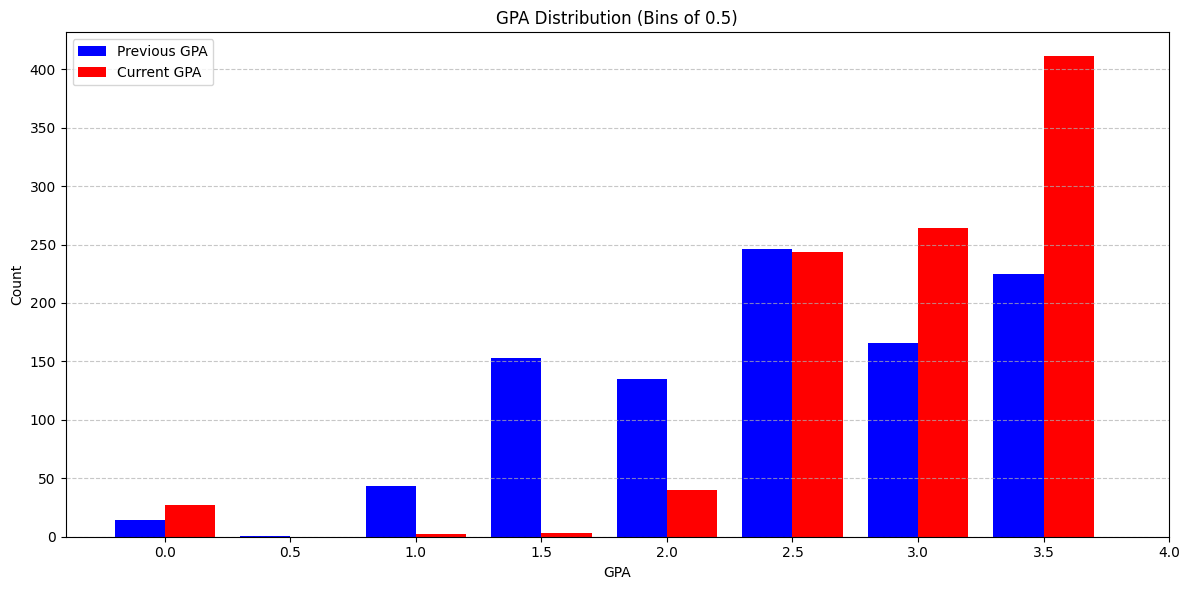

In [150]:


# Define GPA bins with intervals of 0.5
bins = np.arange(0, 4.5, 0.5)  # Adjust the upper limit as needed

# Calculate the count of students in each GPA range for both previous_gpa and current_gpa
previous_gpa_counts, previous_gpa_bins = np.histogram(df_eng['previous_gpa'], bins=bins)
current_gpa_counts, current_gpa_bins = np.histogram(df_eng['current_gpa'], bins=bins)

# Define the bar width
bar_width = 0.2

# Plot the graph
plt.figure(figsize=(12, 6))
plt.bar(
    previous_gpa_bins[:-1] - bar_width / 2,  # Shift bars for previous GPA to the left
    previous_gpa_counts,
    width=bar_width,
    label='Previous GPA',
    color='blue'
)
plt.bar(
    current_gpa_bins[:-1] + bar_width / 2,  # Shift bars for current GPA to the right
    current_gpa_counts,
    width=bar_width,
    label='Current GPA',
    color='red'
)

# Customize graph
plt.title("GPA Distribution (Bins of 0.5)")
plt.xlabel("GPA")
plt.ylabel("Count")
plt.xticks(bins)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Display the graph
plt.show()

this can also be clearly seen from individual plot that students have performed better in current semeseter

In [151]:
# <Student to fill this section>
feature_engineering_1_explanations = """
### Feature Engineering: Academic Consistency

**Why It’s Important**:
1. **Insight into Academic Improvement**:
   - Creating a feature like `gpa_consistency` highlights trends in how students perform across semesters. A positive score indicates that students improved, while a negative score reveals areas where performance may have declined.

2. **Targeted Interventions**:
   - Understanding consistency can help pinpoint students struggling academically. Tailored interventions, such as focused mentorship, can be provided to help them align with previous achievements.

3. **Predictive Relevance**:
   - This feature adds depth to the model by combining past and current GPA, enabling the model to predict future performance trends with higher accuracy.

---

**Impacts**:
1. **Student-Level Benefits**:
   - Recognizing improvements motivates students to sustain better study habits. Identifying declines early allows for corrective action before serious academic consequences arise.

2. **Institutional Insights**:
   - It assists universities in tracking semester-wise academic trends, optimizing resources to strengthen student outcomes.



"""

In [152]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "Social media Impact"

>



 Balancing time spent on social media against study hours can illustrate productivity trends.

In [153]:
# <Student to fill this section>

In [154]:


# Compute the social_media_impact with a condition to handle division by zero
df_eng['social_media_impact'] = np.where(
    df_eng['social_media_hours'] == 0,  # Check for division by zero
    df_eng['study_hours'].max(),        # Assign the maximum study_hours value if social_media_hours is 0
    df_eng['study_hours'] / df_eng['social_media_hours']  # Otherwise, perform the division
)

In [155]:
df_eng.social_media_impact.head()

0    1.000000
1    1.750000
2    2.000000
3    0.333333
4    1.500000
Name: social_media_impact, dtype: float64

In [156]:
df_eng.social_media_impact.describe()

count    993.000000
mean       1.447521
std        1.473216
min        0.000000
25%        0.625000
50%        1.000000
75%        1.750000
max       15.000000
Name: social_media_impact, dtype: float64

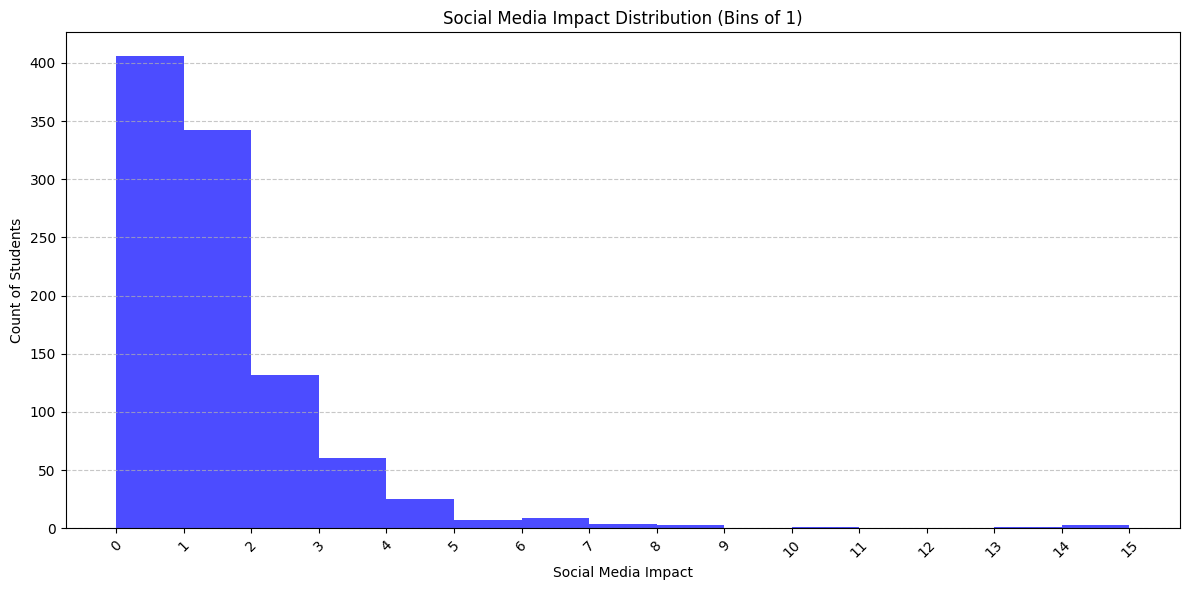

In [157]:


# Define bins for social_media_impact with intervals of 1
bins = np.arange(df_eng['social_media_impact'].min(), df_eng['social_media_impact'].max() + 1, 1)

# Calculate the count of students in each bin
impact_counts, impact_bins = np.histogram(df_eng['social_media_impact'], bins=bins)

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(impact_bins[:-1], impact_counts, width=np.diff(impact_bins), align='edge', color='blue', alpha=0.7)

# Customize the graph
plt.title("Social Media Impact Distribution (Bins of 1)")
plt.xlabel("Social Media Impact")
plt.ylabel("Count of Students")
plt.xticks(bins, rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Display the graph
plt.show()

this graph clearly suggest that most student balance the time spent on study and social media followed by people who study twice as much they use social media.


In [158]:


# Assuming df_eng is defined from the previous code.
numeric_cols = df_eng.select_dtypes(include=np.number).columns
numeric_cols


Index(['student_id', 'age', 'hsc_year', 'current _semester', 'study_hours',
       'social_media_hours', 'average_attendance', 'skills_development_hours',
       'previous_gpa', 'current_gpa', 'completed_credits', 'house_income',
       'gpa_consistency', 'social_media_impact'],
      dtype='object')

In [159]:
# <Student to fill this section>
feature_engineering_2_explanations = """
### Feature Engineering: Social Media Impact

#### **Why It’s Important**
1. **Balances Social Media and Study Time**:
   - The `social_media_impact` feature is crucial in understanding how students balance their time. A higher value indicates more time spent studying relative to social media usage, while a lower value suggests an imbalance with excessive social media consumption.

2. **Predictive Power**:
   - This feature can help the model identify students who might be underperforming due to poor time management, providing actionable insights for targeted interventions.

3. **Enhanced Insights**:
   - By quantifying the relationship between study hours and social media use, the feature offers a direct metric for understanding productivity trends among students.

---

#### **Impacts**
1. **Time Management Analysis**:
   - The feature allows the model to distinguish students who maintain a healthy balance from those who are overusing social media, potentially correlating with lower academic outcomes.

2. **Improved Accuracy**:
   - Adding this feature improves the model's ability to predict performance levels more precisely, as it incorporates critical behavioral aspects influencing academic success.

3. **Actionable Interventions**:
   - Universities can leverage this feature to design programs that promote better time management practices among students.

This feature provides meaningful insights into students' productivity and is a valuable addition to the dataset for improving prediction accuracy.

"""

In [160]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "Income and academic performance"



Higher family income could enable access to resources that positively affect academic performance (indicated by completed credits)

In [161]:
# <Student to fill this section>

In [162]:
df_eng['income_academic_score'] = df_eng['house_income'] * df_eng['completed_credits']/10000

In [163]:
df_eng.income_academic_score.head()

0    113.75
1     70.00
2    105.00
3     87.50
4    102.00
Name: income_academic_score, dtype: float64

In [164]:
df_eng.income_academic_score.describe()

count     993.000000
mean      543.490286
std       593.538461
min         0.000000
25%       100.000000
50%       369.000000
75%       787.800000
max      4620.000000
Name: income_academic_score, dtype: float64

In [165]:
# <Student to fill this section>
feature_engineering_n_explanations = """
### Feature Engineering: Income and Academic Performance

#### **Why It’s Important**
1. **Captures Resource Access**:
   - Family income can be an indicator of access to resources, such as technology, tutoring, or academic support, which positively influence academic outcomes.
   - Integrating it with completed credits provides a measure of how well students utilize these resources academically.

2. **Highlights Socio-Economic Impact**:
   - This feature helps to understand the relationship between socio-economic background and academic achievements, enabling universities to tailor support programs for students from varying income levels.

3. **Predictive Enhancement**:
   - Combining income and academic performance adds depth to the dataset, improving the model’s ability to identify at-risk students and uncover actionable insights.

---

#### **Impacts**
1. **Improved Equity Analysis**:
   - Universities can identify students who excel despite lower family income and provide targeted recognition or scholarships.

2. **Resource Allocation**:
   - By analyzing the feature, institutions can focus on providing essential resources to students who need them the most.

3. **Better Predictions**:
   - This feature refines the predictive model, capturing nuanced socio-economic factors that influence academic success.

It’s a key addition to enhance both prediction accuracy and actionable insights for student success.
"""

In [166]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_n_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

---
## G. Data Preparation for Modeling

### G.1 Split Datasets


In [167]:
# <Student to fill this section>

In [168]:
# Sort the DataFrame by 'current_semester' in ascending order
df_eng_sorted = df_eng.sort_values(by='current _semester')

# Calculate split indices for train (70%), validation (15%), and test (15%)
train_size = int(0.7 * len(df_eng_sorted))
val_size = int(0.15 * len(df_eng_sorted))
test_size = len(df_eng_sorted) - train_size - val_size

# Split the data
train_df = df_eng_sorted.iloc[:train_size]  # First 70%
validation_df = df_eng_sorted.iloc[train_size:train_size + val_size]  # Next 15%
test_df = df_eng_sorted.iloc[train_size + val_size:]  # Remaining 15%

# Print sizes of each split
print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(validation_df)}")
print(f"Test set size: {len(test_df)}")

Train set size: 695
Validation set size: 148
Test set size: 150


- The data is divided into 70% train, 15% validation, and 15% test to maintain standard proportions.
-  Training the model on earlier semesters and testing it on later semesters mimics a real-world application, where past data is used to predict future outcomes.
- This could apply to forecasting student performance for upcoming semesters or analyzing trends in academic improvement.
- model is trained on data reflecting historical patterns and tested on unseen future data

In [169]:
# <Student to fill this section>
data_splitting_explanations = """
### Best Strategy for Data Splitting

#### **Why It's Important**
1. **Chronological Relevance**:
   - The dataset represents data from past semesters. Splitting it sequentially ensures that the training set reflects historical patterns and the validation/test sets represent future trends, mimicking real-world usage where past data predicts future outcomes.

2. **Avoiding Data Leakage**:
   - Random splits risk introducing future data points into the training set, leading to unrealistic model performance. A sequential split eliminates this risk, preserving data integrity.

3. **Balanced Evaluation**:
   - The split into training (70%), validation (15%), and testing (15%) allows sufficient data for training while reserving enough for unbiased evaluation and hyperparameter tuning.

---

#### **Impacts**
1. **Robust Model Development**:
   - Training on earlier semesters ensures the model learns from past patterns, improving its generalizability when predicting future student performance.

2. **Improved Real-World Application**:
   - Testing on later semesters evaluates how well the model forecasts trends, making it applicable to real-world scenarios like predicting outcomes for upcoming semesters.

3. **Effective Resource Allocation**:
   - This approach allows educators to proactively use the model’s predictions for intervention and support, benefiting students identified as at-risk.

This splitting strategy supports realistic and reliable predictions while ensuring the model's fairness and practicality.
"""

In [170]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation Categorical Transformation

In [171]:
# <Student to fill this section>

In [172]:
# prompt: show all dtypes present in traindf

train_df.dtypes.value_counts()


float64    14
object     11
int64       1
Name: count, dtype: int64

In [173]:
num_cols=train_df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['student_id', 'age', 'hsc_year', 'current _semester', 'study_hours',
       'social_media_hours', 'average_attendance', 'skills_development_hours',
       'previous_gpa', 'current_gpa', 'completed_credits', 'house_income',
       'gpa_consistency', 'social_media_impact', 'income_academic_score'],
      dtype='object')

In [174]:
# prompt: extract all the object columns from the train df

categorical_columns = train_df.select_dtypes(include=['object']).columns
categorical_columns


Index(['birth_country', 'scholarship', 'university_transport', 'learning_mode',
       'english_proficiency', 'on_probation', 'is_suspended', 'relationship',
       'skills', 'area_of_interest', 'target'],
      dtype='object')

we will use different type on encoding for each type of categorical columns we have so lets split the columns accordingly.

In [175]:
ordinal_categorical_columns=['english_proficiency','target']

In [176]:
nominal_categorical_columns=['birth_country', 'scholarship', 'university_transport', 'learning_mode',
       'on_probation', 'is_suspended', 'relationship',
       'skills', 'area_of_interest', ]

In [177]:
train_df.english_proficiency.unique()

array(['Basic', 'Intermediate', 'Advance'], dtype=object)

In [178]:
train_df.target.unique()

array(['Poor', 'Excellent', 'Good', 'Average'], dtype=object)

In [179]:


# Define encoding orders
english_proficiency_order = ['Basic', 'Intermediate', 'Advance']
target_order = ['Poor', 'Average', 'Good', 'Excellent']

# Initialize OrdinalEncoder with the defined orders
ordinal_encoder = OrdinalEncoder(
    categories=[english_proficiency_order, target_order]
)

# Apply the encoder to the respective columns
train_df[['english_proficiency_encoded', 'target']] = ordinal_encoder.fit_transform(
    train_df[['english_proficiency', 'target']]
)
test_df[['english_proficiency_encoded', 'target']] = ordinal_encoder.fit_transform(
    test_df[['english_proficiency', 'target']]
)
validation_df[['english_proficiency_encoded', 'target']] = ordinal_encoder.fit_transform(
    validation_df[['english_proficiency', 'target']]
)

# Display the first few rows
print(train_df[['english_proficiency', 'english_proficiency_encoded', 'target']])
print(test_df[['english_proficiency', 'english_proficiency_encoded', 'target']])
print(validation_df[['english_proficiency', 'english_proficiency_encoded', 'target']])



# #drop the original columns
train_df.drop(columns=['english_proficiency'], inplace=True)
test_df.drop(columns=['english_proficiency'], inplace=True)
validation_df.drop(columns=['english_proficiency'], inplace=True)



    english_proficiency  english_proficiency_encoded  target
323               Basic                          0.0     0.0
325        Intermediate                          1.0     0.0
79                Basic                          0.0     0.0
262             Advance                          2.0     3.0
245             Advance                          2.0     0.0
..                  ...                          ...     ...
572        Intermediate                          1.0     1.0
568             Advance                          2.0     0.0
739        Intermediate                          1.0     0.0
93              Advance                          2.0     1.0
91                Basic                          0.0     3.0

[695 rows x 3 columns]
    english_proficiency  english_proficiency_encoded  target
657               Basic                          0.0     1.0
542        Intermediate                          1.0     0.0
809               Basic                          0.0     1.0


C:\Users\agama\AppData\Local\Temp\ipykernel_13988\1677120265.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\agama\AppData\Local\Temp\ipykernel_13988\1677120265.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\agama\AppData\Local\Temp\ipykernel_13988\1677120265.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Popping the target column coz we will perform various transformation ahead and we donot want target variable to get transformed.

In [180]:
y_train = train_df.pop(target_name)
y_val = validation_df.pop(target_name)
y_test = test_df.pop(target_name)

In [181]:
# <Student to fill this section>
data_transformation_1_explanations = """
### **Data Transformation Explanation (Section G.2)**

Data transformation was carried out in several steps to ensure that the dataset is in an optimal state for modeling. Here's why it was important and its impact:

#### **Reasons for Transformation**
1. **Consistency and Usability**:
   - Categorical features with unique string values like `skills` and `area_of_interest` were transformed using one-hot and binary encoding, ensuring the model can interpret them effectively.
   - Ordinal categorical features like `target` and `english_proficiency` were encoded based on their inherent order, preserving their meaningful hierarchy.

2. **Handling High Cardinality**:
   - Columns with higher unique values, such as `skills` and `area_of_interest`, were encoded using `MultiLabelBinarizer` to maintain interpretability and prevent model complexity.

3. **Skewness Adjustment**:
   - Numerical features with skewed distributions were log-transformed or inverted based on their skewness direction, bringing distributions closer to normal and stabilizing variance.

4. **Scaling for Uniformity**:
   - Standardization ensured that numerical columns like `study_hours`, `house_income`, and `gpa_consistency` have a mean of 0 and a standard deviation of 1. This made them comparable and improved convergence in algorithms sensitive to scale, such as gradient descent.

---

#### **Impacts**
1. **Improved Model Performance**:
   - Transformed features reduce noise and improve the model's ability to generalize, enhancing accuracy and reliability.

2. **Efficient Handling of High Cardinality**:
   - Encoding high-cardinality features helps prevent dimensionality issues, making the dataset computationally manageable.

3. **Mitigating Bias**:
   - Normalizing features like `social_media_hours` ensures that no single feature disproportionately influences the predictions.

4. **Ease of Interpretation**:
   - Clean, encoded, and scaled data allows the model to derive meaningful patterns and relationships, improving interpretability.

This thoughtful transformation process optimizes the dataset for efficient, accurate model training and ensures its readiness for predictive tasks.
"""

In [182]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation <put_name_here>

In [183]:
# <Student to fill this section>

In [184]:
# Loop through each column in nominal_categorical_columns and display unique values
for column in nominal_categorical_columns:
    print(f"Unique values in {column}:")
    print(train_df[column].unique())
    print()  # Add spacing between outputs for readability

Unique values in birth_country:
['AU' 'PH' 'BR' 'IN' 'IE' 'NZ' 'ZA' 'US' 'TH' 'CA']

Unique values in scholarship:
['Yes' 'No']

Unique values in university_transport:
['Yes' 'No']

Unique values in learning_mode:
['Offline' 'Online']

Unique values in on_probation:
['No' 'Yes']

Unique values in is_suspended:
['No' 'Yes']

Unique values in relationship:
['Single' 'In a relationship' 'Engaged' 'Married']

Unique values in skills:
['networking' 'backend development' 'programming' 'web development'
 'software development' 'frontend development' 'cyber security'
 'programming, networking' 'machine learning' 'cyber security, networking'
 'graphic design' 'programming, designing' 'programming, volunteering.'
 'data entry' 'programming, php' 'game development'
 'programming, video editing' 'content creation' 'artificial intelligence'
 'programming, office tools' 'memorizing' 'photography'
 'programming, graphic design, video editing' 'mentoring'
 'market analysis' 'problem solving' 'programm

we will use one hot encoding for the columns with less number of unique values.


In [185]:

# Define categorical columns
encoder_categorical_columns = [
    'birth_country', 'scholarship', 'university_transport',
    'learning_mode', 'on_probation', 'is_suspended', 'relationship'
]


# Initialize OneHotEncoder with the correct parameter
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply encoder to training data
train_df_encoded = encoder.fit_transform(train_df[encoder_categorical_columns])

# Convert encoded arrays to DataFrames
train_df_encoded_df = pd.DataFrame(train_df_encoded, columns=encoder.get_feature_names_out(encoder_categorical_columns))

# Add encoded columns to the datasets
train_df = pd.concat([train_df.reset_index(drop=True), train_df_encoded_df], axis=1)

# Drop the original categorical columns after encoding
train_df.drop(columns=encoder_categorical_columns, inplace=True)

train_df.head()

student_id   age  hsc_year  current _semester  study_hours  \
0         491  23.0    2019.0                1.0          2.0   
1         493  20.0    2020.0                1.0          2.0   
2         216  20.0    2020.0                1.0          2.0   
3         423  21.0    2020.0                1.0          3.5   
4         403  20.0    2020.0                1.0          3.0   

   social_media_hours  average_attendance  skills_development_hours  \
0                 8.0               100.0                       1.0   
1                 7.0               100.0                       1.0   
2                 6.0               100.0                       4.0   
3                 1.0                99.0                       1.0   
4                 3.0               100.0                       2.0   

   previous_gpa  current_gpa  ...  learning_mode_Offline  \
0           0.0          0.0  ...                    1.0   
1           0.0          0.0  ...                    1.0   
2           4.0          4.0  ...                    1.0   
3           4.5          4.0  ...                    1.0   
4           0.0          0.0  ...                    1.0   

   learning_mode_Online on_probation_No on_probation_Yes  is_suspended_No  \
0                   0.0             1.0              0.0              1.0   
1                   0.0             1.0              0.0              1.0   
2                   0.0             0.0              1.0              1.0   
3                   0.0             1.0              0.0              1.0   
4                   0.0             1.0              0.0              1.0   

   is_suspended_Yes  relationship_Engaged  relationship_In a relationship  \
0               0.0                   0.0                             0.0   
1               0.0                   0.0                             0.0   
2               0.0                   0.0                             0.0   
3               0.0                   0.0                             0.0   
4               0.0                   0.0                             0.0   

   relationship_Married  relationship_Single  
0                   0.0                  1.0  
1                   0.0                  1.0  
2                   0.0                  1.0  
3                   0.0                  1.0  
4                   0.0                  1.0  

[5 rows x 42 columns]

In [186]:
# doing same for test data

# Define categorical columns
encoder_categorical_columns = [
    'birth_country', 'scholarship', 'university_transport',
    'learning_mode', 'on_probation', 'is_suspended', 'relationship'
]


# Initialize OneHotEncoder with the correct parameter
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply encoder to testing data
test_df_encoded = encoder.fit_transform(test_df[encoder_categorical_columns])

# Convert encoded arrays to DataFrames
test_df_encoded_df = pd.DataFrame(test_df_encoded, columns=encoder.get_feature_names_out(encoder_categorical_columns))

# Add encoded columns to the datasets
test_df = pd.concat([test_df.reset_index(drop=True), test_df_encoded_df], axis=1)

# Drop the original categorical columns after encoding
test_df.drop(columns=encoder_categorical_columns, inplace=True)

test_df.head()

student_id   age  hsc_year  current _semester  study_hours  \
0         842  21.0    2020.0               11.0          2.0   
1         727  22.0    2018.0               11.0          4.0   
2         994  20.0    2020.0               11.0          1.0   
3         990  25.0    2019.0               11.0          5.0   
4        1026  22.0    2018.0               11.0          5.0   

   social_media_hours  average_attendance  skills_development_hours  \
0                 1.0                79.0                       2.0   
1                10.0                99.0                       2.0   
2                 3.0               100.0                       4.0   
3                 3.0               100.0                       4.0   
4                 8.0                77.0                       2.0   

   previous_gpa  current_gpa  ...  learning_mode_Offline  \
0          2.81         3.89  ...                    1.0   
1          3.72         3.78  ...                    1.0   
2          2.75         3.86  ...                    1.0   
3          2.56         3.67  ...                    1.0   
4          2.33         3.88  ...                    1.0   

   learning_mode_Online on_probation_No on_probation_Yes  is_suspended_No  \
0                   0.0             1.0              0.0              1.0   
1                   0.0             1.0              0.0              1.0   
2                   0.0             1.0              0.0              1.0   
3                   0.0             0.0              1.0              1.0   
4                   0.0             1.0              0.0              1.0   

   is_suspended_Yes  relationship_Engaged  relationship_In a relationship  \
0               0.0                   0.0                             0.0   
1               0.0                   0.0                             0.0   
2               0.0                   0.0                             1.0   
3               0.0                   0.0                             1.0   
4               0.0                   0.0                             0.0   

   relationship_Married  relationship_Single  
0                   0.0                  1.0  
1                   0.0                  1.0  
2                   0.0                  0.0  
3                   0.0                  0.0  
4                   0.0                  1.0  

[5 rows x 38 columns]

In [187]:
#doing the same for validation data

# Define categorical columns
encoder_categorical_columns = [
    'birth_country', 'scholarship', 'university_transport',
    'learning_mode', 'on_probation', 'is_suspended', 'relationship'
]


# Initialize OneHotEncoder with the correct parameter
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply encoder to validationing data
validation_df_encoded = encoder.fit_transform(validation_df[encoder_categorical_columns])

# Convert encoded arrays to DataFrames
validation_df_encoded_df = pd.DataFrame(validation_df_encoded, columns=encoder.get_feature_names_out(encoder_categorical_columns))

# Add encoded columns to the datasets
validation_df = pd.concat([validation_df.reset_index(drop=True), validation_df_encoded_df], axis=1)

# Drop the original categorical columns after encoding
validation_df.drop(columns=encoder_categorical_columns, inplace=True)

validation_df.head()

student_id   age  hsc_year  current _semester  study_hours  \
0         765  21.0    2019.0                9.0          3.0   
1         764  20.0    2020.0                9.0          4.0   
2         898  23.0    2019.0                9.0          1.0   
3         921  20.0    2020.0                9.0          2.0   
4         917  21.0    2020.0                9.0          3.0   

   social_media_hours  average_attendance  skills_development_hours  \
0                 9.0               100.0                       2.0   
1                 2.0                78.0                       4.0   
2                 5.0               100.0                       1.0   
3                 3.0                55.0                       1.0   
4                 3.0                46.0                       2.0   

   previous_gpa  current_gpa  ...  university_transport_Yes  \
0          1.87         2.82  ...                       0.0   
1          1.83         2.90  ...                       0.0   
2          2.91         3.89  ...                       0.0   
3          2.87         3.90  ...                       0.0   
4          1.88         2.92  ...                       0.0   

   learning_mode_Offline learning_mode_Online on_probation_No  \
0                    0.0                  1.0             1.0   
1                    1.0                  0.0             0.0   
2                    1.0                  0.0             1.0   
3                    1.0                  0.0             1.0   
4                    0.0                  1.0             1.0   

   on_probation_Yes  is_suspended_No  is_suspended_Yes  \
0               0.0              1.0               0.0   
1               1.0              1.0               0.0   
2               0.0              1.0               0.0   
3               0.0              1.0               0.0   
4               0.0              1.0               0.0   

   relationship_In a relationship  relationship_Married  relationship_Single  
0                             1.0                   0.0                  0.0  
1                             1.0                   0.0                  0.0  
2                             1.0                   0.0                  0.0  
3                             1.0                   0.0                  0.0  
4                             0.0                   0.0                  1.0  

[5 rows x 38 columns]

#lets ensure that the number of column in the test, train and validation set are same after encoding

In [188]:
print(set(train_df.columns) - set(validation_df.columns))
print(set(train_df.columns) - set(test_df.columns))
print(set(validation_df.columns) == set(test_df.columns))


{'birth_country_IE', 'birth_country_TH', 'birth_country_CA', 'relationship_Engaged'}
{'birth_country_IE', 'birth_country_ZA', 'birth_country_BR', 'birth_country_CA'}
False


In [189]:
# the shape of the training got disruptted using encoding lets deal with it right now

In [190]:
# Align columns of validation_df to match train_df
validation_df = validation_df.reindex(columns=train_df.columns, fill_value=0)
test_df = test_df.reindex(columns=train_df.columns, fill_value=0)



In [191]:
print(set(train_df.columns) - set(validation_df.columns))
print(set(train_df.columns) - set(test_df.columns))
print(set(validation_df.columns) == set(test_df.columns))


set()
set()
True


In [192]:
# <Student to fill this section>
data_transformation_2_explanations = """
### Section G.3 - Binary Encoding for High-Cardinality Features

#### **Why It’s Important**
1. **Handling Complexity**:
   - High-cardinality categorical features like `skills` and `area_of_interest` include many unique values, which could complicate the model if encoded directly. Binary encoding resolves this issue by breaking them into binary vectors, simplifying the structure.

2. **Improving Model Interpretability**:
   - By splitting categories into binary columns, the relationship between individual categories and the target variable becomes clearer.

3. **Avoiding Dimensionality Issues**:
   - Direct encoding of high-cardinality features would create a sparse matrix, increasing computational costs. Binary encoding condenses this information efficiently.

---

#### **Impacts**
1. **Reduced Sparsity**:
   - The compressed binary representation allows the model to process categorical data more effectively without introducing excessive noise.

2. **Enhanced Learning**:
   - The model can now capture the influence of specific subcategories on performance, leading to better predictions and insights.

3. **Balanced Representation**:
   - Binary encoding ensures equal weightage for all subcategories, preventing potential bias toward those with more frequent appearances.

This step is crucial for optimizing the dataset for modeling while maintaining the granularity of high-cardinality categorical features.
"""


In [193]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### G.4 Data Transformation <put_name_here>

In [194]:
# <Student to fill this section>

Now lets binary code the high cardinal categorical columns

In [195]:


# Initialize MultiLabelBinarizer for each column
mlb_skills = MultiLabelBinarizer()
mlb_interests = MultiLabelBinarizer()

# Apply binary encoding
skills_encoded = mlb_skills.fit_transform(train_df['skills'])
interests_encoded = mlb_interests.fit_transform(train_df['area_of_interest'])

# Create DataFrame for encoded results
skills_encoded_train_df = pd.DataFrame(skills_encoded, columns=mlb_skills.classes_)
interests_encoded_train_df = pd.DataFrame(interests_encoded, columns=mlb_interests.classes_)

# Merge encoded columns back with the original DataFrame
train_df_encoded = pd.concat([train_df, skills_encoded_train_df, interests_encoded_train_df], axis=1)

# Drop the original categorical columns after encoding
train_df.drop(columns=['skills','area_of_interest'], inplace=True)
# Display the result
print(train_df.head())

   student_id   age  hsc_year  current _semester  study_hours  \
0         491  23.0    2019.0                1.0          2.0   
1         493  20.0    2020.0                1.0          2.0   
2         216  20.0    2020.0                1.0          2.0   
3         423  21.0    2020.0                1.0          3.5   
4         403  20.0    2020.0                1.0          3.0   

   social_media_hours  average_attendance  skills_development_hours  \
0                 8.0               100.0                       1.0   
1                 7.0               100.0                       1.0   
2                 6.0               100.0                       4.0   
3                 1.0                99.0                       1.0   
4                 3.0               100.0                       2.0   

   previous_gpa  current_gpa  ...  learning_mode_Offline  \
0           0.0          0.0  ...                    1.0   
1           0.0          0.0  ...                    1.0   
2 

In [196]:
#doing the same for test df


# Initialize MultiLabelBinarizer for each column
mlb_skills = MultiLabelBinarizer()
mlb_interests = MultiLabelBinarizer()

# Apply binary encoding
skills_encoded = mlb_skills.fit_transform(test_df['skills'])
interests_encoded = mlb_interests.fit_transform(test_df['area_of_interest'])

# Create DataFrame for encoded results
skills_encoded_test_df = pd.DataFrame(skills_encoded, columns=mlb_skills.classes_)
interests_encoded_test_df = pd.DataFrame(interests_encoded, columns=mlb_interests.classes_)

# Merge encoded columns back with the original DataFrame
test_df_encoded = pd.concat([test_df, skills_encoded_test_df, interests_encoded_test_df], axis=1)

# Drop the original categorical columns after encoding
test_df.drop(columns=['skills','area_of_interest'], inplace=True)
# Display the result
print(test_df.head())

   student_id   age  hsc_year  current _semester  study_hours  \
0         842  21.0    2020.0               11.0          2.0   
1         727  22.0    2018.0               11.0          4.0   
2         994  20.0    2020.0               11.0          1.0   
3         990  25.0    2019.0               11.0          5.0   
4        1026  22.0    2018.0               11.0          5.0   

   social_media_hours  average_attendance  skills_development_hours  \
0                 1.0                79.0                       2.0   
1                10.0                99.0                       2.0   
2                 3.0               100.0                       4.0   
3                 3.0               100.0                       4.0   
4                 8.0                77.0                       2.0   

   previous_gpa  current_gpa  ...  learning_mode_Offline  \
0          2.81         3.89  ...                    1.0   
1          3.72         3.78  ...                    1.0   
2 

In [197]:
#doing the same for validation dataset


# Initialize MultiLabelBinarizer for each column
mlb_skills = MultiLabelBinarizer()
mlb_interests = MultiLabelBinarizer()

# Apply binary encoding
skills_encoded = mlb_skills.fit_transform(validation_df['skills'])
interests_encoded = mlb_interests.fit_transform(validation_df['area_of_interest'])

# Create DataFrame for encoded results
skills_encoded_validation_df = pd.DataFrame(skills_encoded, columns=mlb_skills.classes_)
interests_encoded_validation_df = pd.DataFrame(interests_encoded, columns=mlb_interests.classes_)

# Merge encoded columns back with the original DataFrame
validation_df_encoded = pd.concat([validation_df, skills_encoded_validation_df, interests_encoded_validation_df], axis=1)

# Drop the original categorical columns after encoding
validation_df.drop(columns=['skills','area_of_interest'], inplace=True)
# Display the result
print(validation_df.head())

   student_id   age  hsc_year  current _semester  study_hours  \
0         765  21.0    2019.0                9.0          3.0   
1         764  20.0    2020.0                9.0          4.0   
2         898  23.0    2019.0                9.0          1.0   
3         921  20.0    2020.0                9.0          2.0   
4         917  21.0    2020.0                9.0          3.0   

   social_media_hours  average_attendance  skills_development_hours  \
0                 9.0               100.0                       2.0   
1                 2.0                78.0                       4.0   
2                 5.0               100.0                       1.0   
3                 3.0                55.0                       1.0   
4                 3.0                46.0                       2.0   

   previous_gpa  current_gpa  ...  learning_mode_Offline  \
0          1.87         2.82  ...                    0.0   
1          1.83         2.90  ...                    1.0   
2 

In [198]:
# <Student to fill this section>
data_transformation_3_explanations = """
### Explanation for Section G.4 - Addressing High-Cardinality Features

#### **Why It’s Important**
1. **Enhances Model Interpretability**:
   - High-cardinality categorical features like `skills` and `area_of_interest` can introduce complexity during modeling. Using binary encoding ensures these features are represented efficiently while retaining their diversity.

2. **Reduces Dimensionality Challenges**:
   - Direct usage of high-cardinality features can result in sparse data matrices or computational inefficiencies. Binary encoding mitigates these risks, enabling streamlined preprocessing and faster model training.

3. **Captures Feature Diversity**:
   - Binary encoding effectively represents multiple categories simultaneously, ensuring no information is lost during transformation, while allowing the model to learn meaningful patterns.

---

#### **Impacts**
1. **Improved Feature Utility**:
   - Encoding features like `skills` and `area_of_interest` transforms them into usable formats, unlocking their predictive power within the dataset.

2. **Optimized Performance**:
   - Binary encoding prevents overfitting and reduces noise that high-cardinality features might introduce in predictive models.

3. **Balanced Representation**:
   - By encoding, each category contributes proportionally to the dataset, enhancing fairness in predictions and improving accuracy across all performance levels.

"""

In [199]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

### G.5 Fixing "skewness "

> You can add more cells related to data preparation in this section

In [200]:
# --- Step 1: Check Skewness of the Numerical Columns ---
print("Skewness before transformation:")
skew_before = train_df[num_cols].skew()
print(skew_before)


Skewness before transformation:
student_id                  0.042797
age                         0.911234
hsc_year                   -1.535225
current _semester           0.043399
study_hours                 1.621994
social_media_hours          1.817825
average_attendance         -2.199819
skills_development_hours    1.361476
previous_gpa               -0.568123
current_gpa                -2.368322
completed_credits           0.270037
house_income                4.265978
gpa_consistency             2.104216
social_media_impact         4.004318
income_academic_score       2.456920
dtype: float64


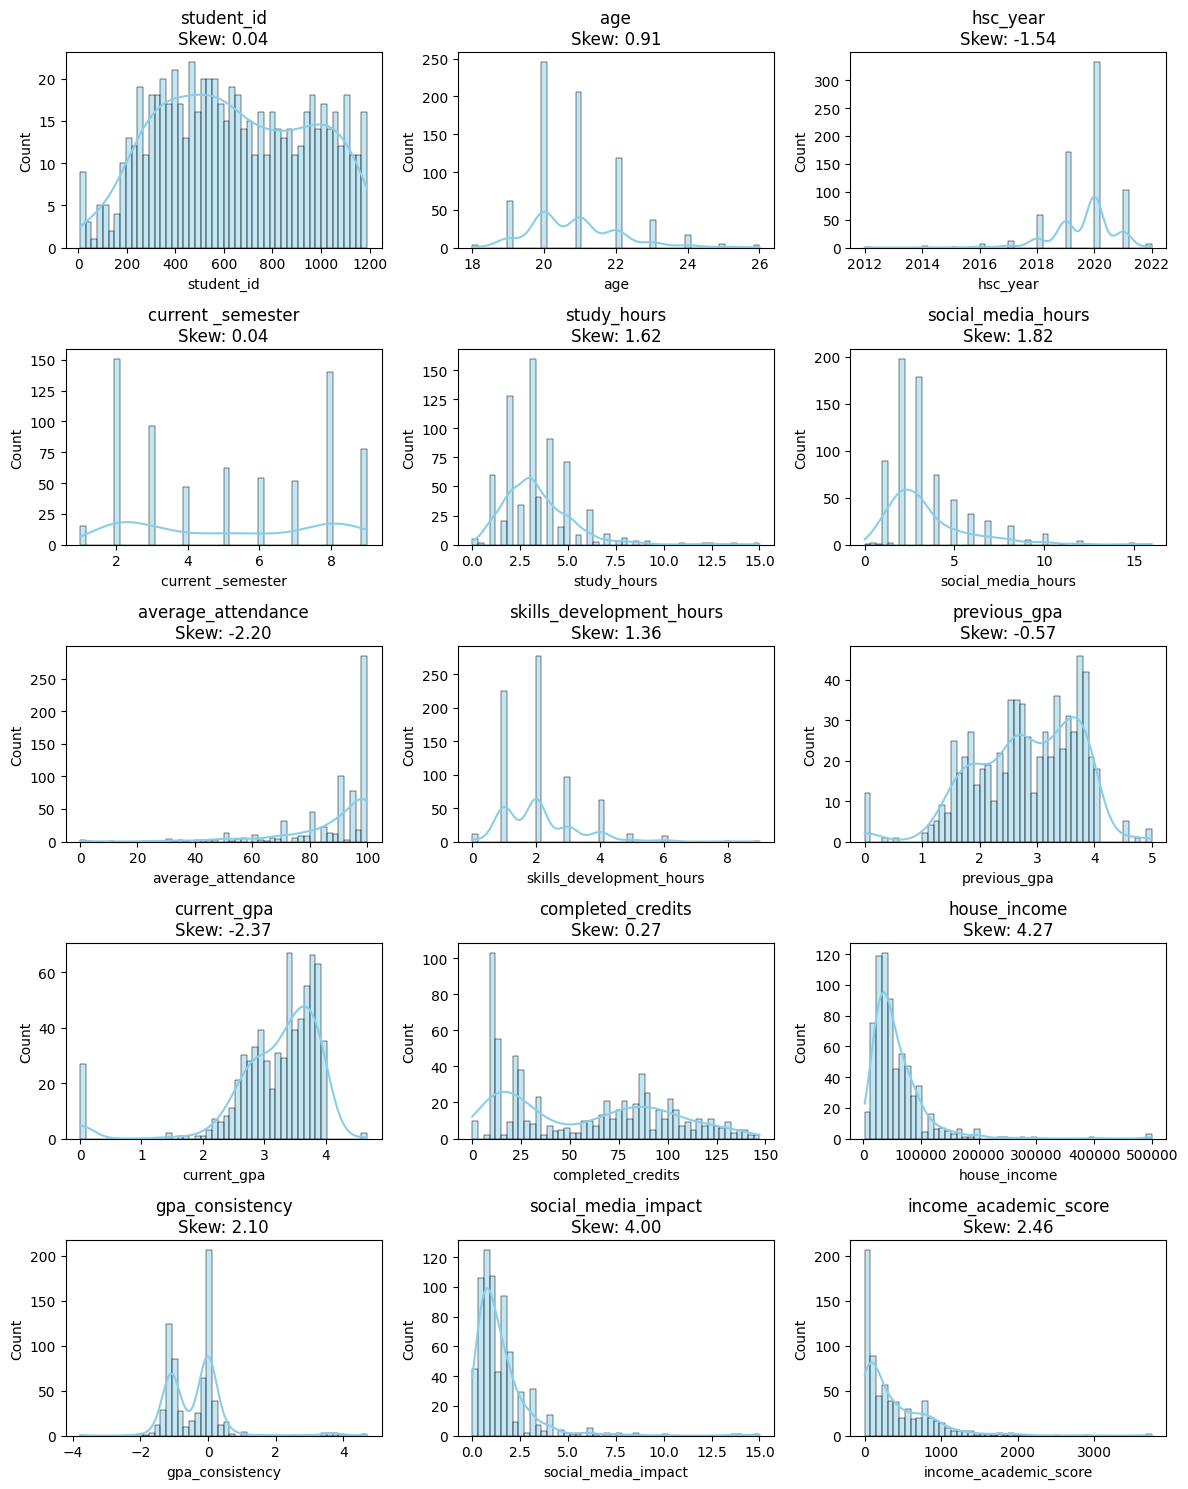

In [201]:
# visualize the distributions before transformation
n_cols = 3  # number of subplots per row
n_rows = int(np.ceil(len(num_cols) / n_cols))
plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(train_df[col], kde=True, bins=50, color='skyblue')
    plt.title(f"{col}\nSkew: {train_df[col].skew():.2f}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()


In [202]:
# Define Transformation Functions for Skewness ---

def transform_positive_skew(series):
    """
    Reduces right skewness using np.log1p.
    Shifts the data if minimum value <= 0.
    """
    shift = 0
    if series.min() <= 0:
        shift = abs(series.min()) + 1
    return np.log1p(series + shift)

def transform_negative_skew(series):
    """
    Reduces left skewness (negative skew) by inverting the data.
    Transforms using: log1p(max - x)
    """
    max_val = series.max()
    return np.log1p(max_val - series)


In [203]:
# Apply Transformations to Columns with High Skewness ---
# Define a skewness threshold above which transformation is applied.
skew_threshold = 1.0


In [204]:
# Create a copy to store transformed data so that we donot mess the original train_df untill we are done with all our experiments
train_df_transformed = train_df.copy()

for col in num_cols:
    s = train_df[col].skew()
    if s > skew_threshold:
        train_df_transformed[col] = transform_positive_skew(train_df[col])
        print(f"Applied log1p transformation to '{col}' (positive skew: {s:.2f}).")
    elif s < -skew_threshold:
        train_df_transformed[col] = transform_negative_skew(train_df[col])
        print(f"Applied inversion+log1p transformation to '{col}' (negative skew: {s:.2f}).")
    else:
        print(f"No transformation applied to '{col}' (skew: {s:.2f}).")


No transformation applied to 'student_id' (skew: 0.04).
No transformation applied to 'age' (skew: 0.91).
Applied inversion+log1p transformation to 'hsc_year' (negative skew: -1.54).
No transformation applied to 'current _semester' (skew: 0.04).
Applied log1p transformation to 'study_hours' (positive skew: 1.62).
Applied log1p transformation to 'social_media_hours' (positive skew: 1.82).
Applied inversion+log1p transformation to 'average_attendance' (negative skew: -2.20).
Applied log1p transformation to 'skills_development_hours' (positive skew: 1.36).
No transformation applied to 'previous_gpa' (skew: -0.57).
Applied inversion+log1p transformation to 'current_gpa' (negative skew: -2.37).
No transformation applied to 'completed_credits' (skew: 0.27).
Applied log1p transformation to 'house_income' (positive skew: 4.27).
Applied log1p transformation to 'gpa_consistency' (positive skew: 2.10).
Applied log1p transformation to 'social_media_impact' (positive skew: 4.00).
Applied log1p trans

In [205]:
# Check and Visualize Skewness After Transformation ---
print("\nSkewness after transformation:")
skew_after = train_df_transformed[num_cols].skew()
print(skew_after)



Skewness after transformation:
student_id                  0.042797
age                         0.911234
hsc_year                   -0.232252
current _semester           0.043399
study_hours                 0.146248
social_media_hours          0.658725
average_attendance          0.065920
skills_development_hours    0.398659
previous_gpa               -0.568123
current_gpa                 1.157297
completed_credits           0.270037
house_income               -0.134162
gpa_consistency             0.606618
social_media_impact         1.467045
income_academic_score      -0.508260
dtype: float64


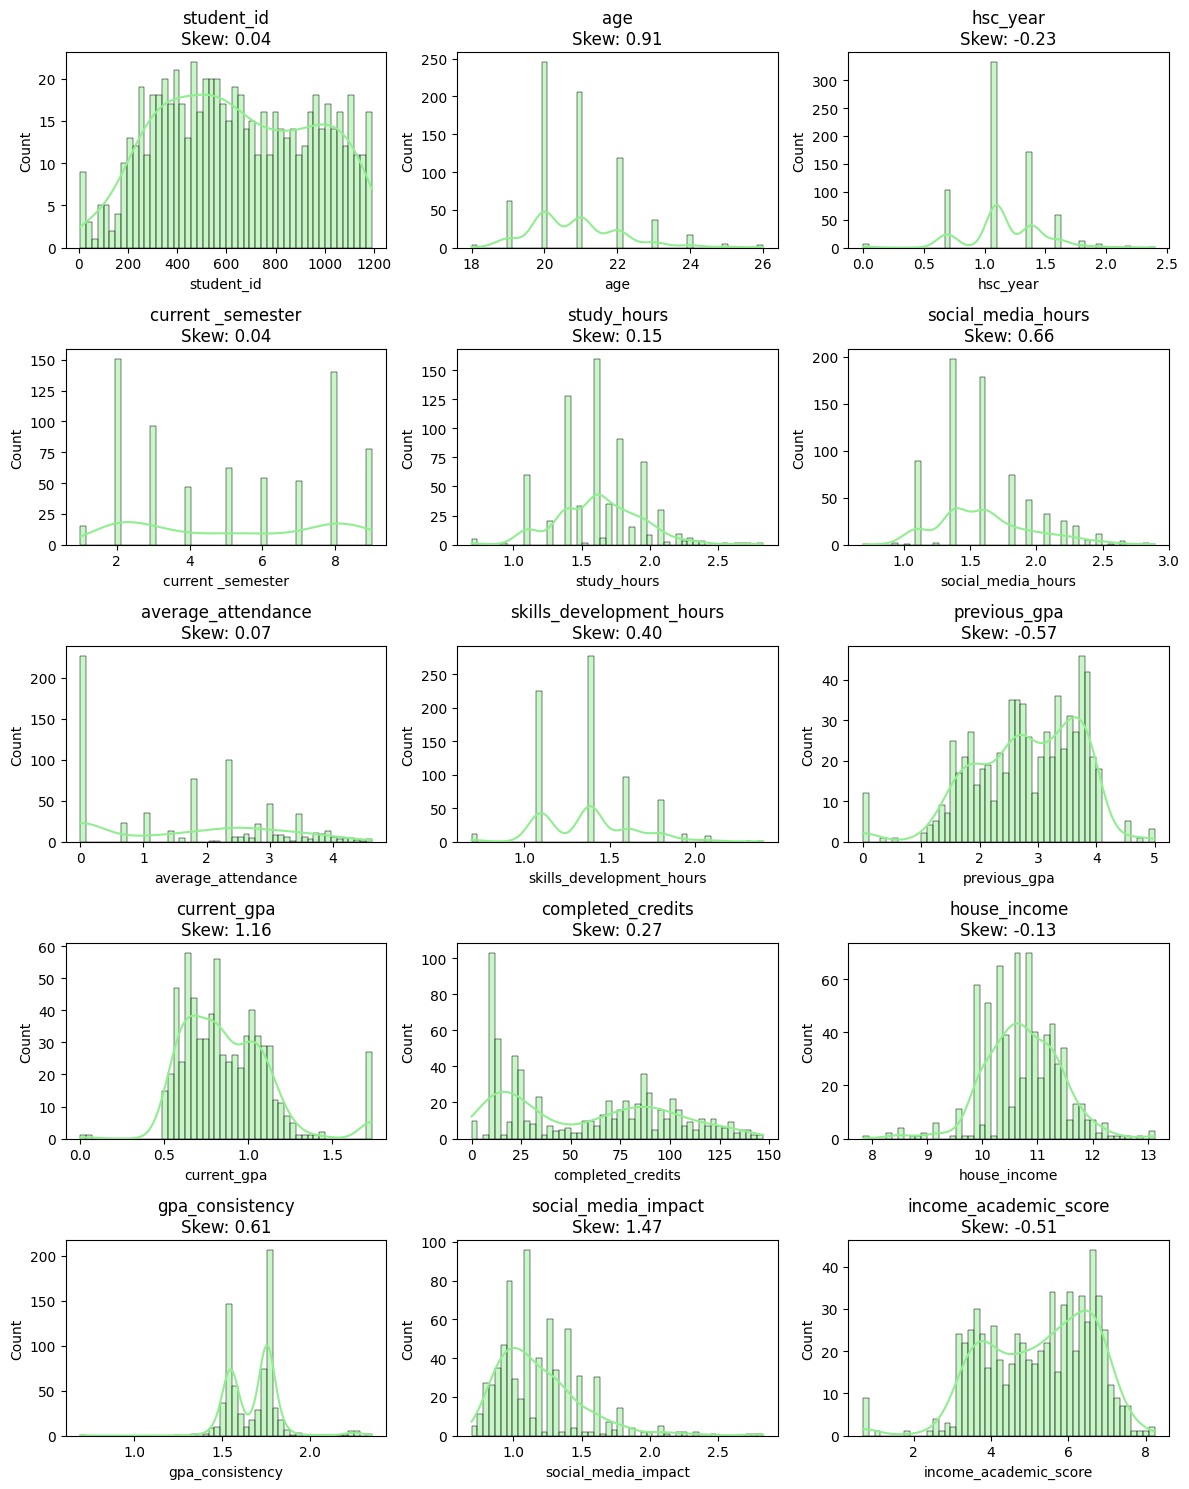

In [206]:
# visualize the distributions after transformation
plt.figure(figsize=(n_cols * 4, n_rows * 3))
for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(train_df_transformed[col], kde=True, bins=50, color='lightgreen')
    plt.title(f"{col}\nSkew: {train_df_transformed[col].skew():.2f}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()


In [207]:
train_df=train_df_transformed.copy() # applying the changes to the final df

In [208]:
#same for test data
# Create a copy to store transformed data so that we donot mess the original test_df untill we are done with all our experiments
test_df_transformed = test_df.copy()

for col in num_cols:
    s = test_df[col].skew()
    if s > skew_threshold:
        test_df_transformed[col] = transform_positive_skew(test_df[col])
        print(f"Applied log1p transformation to '{col}' (positive skew: {s:.2f}).")
    elif s < -skew_threshold:
        test_df_transformed[col] = transform_negative_skew(test_df[col])
        print(f"Applied inversion+log1p transformation to '{col}' (negative skew: {s:.2f}).")
    else:
        print(f"No transformation applied to '{col}' (skew: {s:.2f}).")
test_df=test_df_transformed.copy() # applying the changes to the final df


No transformation applied to 'student_id' (skew: -0.19).
No transformation applied to 'age' (skew: -0.16).
No transformation applied to 'hsc_year' (skew: -0.96).
Applied log1p transformation to 'current _semester' (positive skew: 2.17).
No transformation applied to 'study_hours' (skew: 0.70).
Applied log1p transformation to 'social_media_hours' (positive skew: 1.82).
Applied inversion+log1p transformation to 'average_attendance' (negative skew: -1.80).
Applied log1p transformation to 'skills_development_hours' (positive skew: 1.35).
No transformation applied to 'previous_gpa' (skew: -0.05).
No transformation applied to 'current_gpa' (skew: -0.16).
Applied inversion+log1p transformation to 'completed_credits' (negative skew: -2.21).
Applied log1p transformation to 'house_income' (positive skew: 2.85).
No transformation applied to 'gpa_consistency' (skew: 0.26).
Applied log1p transformation to 'social_media_impact' (positive skew: 3.86).
Applied log1p transformation to 'income_academic_s

In [209]:
#same for validation data
# Create a copy to store transformed data so that we donot mess the original validation_df untill we are done with all our experiments
validation_df_transformed = validation_df.copy()

for col in num_cols:
    s = validation_df[col].skew()
    if s > skew_threshold:
        validation_df_transformed[col] = transform_positive_skew(validation_df[col])
        print(f"Applied log1p transformation to '{col}' (positive skew: {s:.2f}).")
    elif s < -skew_threshold:
        validation_df_transformed[col] = transform_negative_skew(validation_df[col])
        print(f"Applied inversion+log1p transformation to '{col}' (negative skew: {s:.2f}).")
    else:
        print(f"No transformation applied to '{col}' (skew: {s:.2f}).")
validation_df=validation_df_transformed.copy() # applying the changes to the final df


Applied inversion+log1p transformation to 'student_id' (negative skew: -1.14).
No transformation applied to 'age' (skew: 0.14).
No transformation applied to 'hsc_year' (skew: -0.87).
No transformation applied to 'current _semester' (skew: -0.25).
No transformation applied to 'study_hours' (skew: 0.64).
Applied log1p transformation to 'social_media_hours' (positive skew: 1.37).
Applied inversion+log1p transformation to 'average_attendance' (negative skew: -1.40).
No transformation applied to 'skills_development_hours' (skew: 0.73).
No transformation applied to 'previous_gpa' (skew: -0.13).
No transformation applied to 'current_gpa' (skew: -0.44).
Applied inversion+log1p transformation to 'completed_credits' (negative skew: -2.26).
Applied log1p transformation to 'house_income' (positive skew: 1.75).
Applied log1p transformation to 'gpa_consistency' (positive skew: 1.23).
Applied log1p transformation to 'social_media_impact' (positive skew: 1.87).
Applied log1p transformation to 'income_

In [210]:
# <Student to fill this section>
data_transformation_5_explanations = """
### **Importance of Fixing Skewness**

#### **Why It’s Important**
1. **Improves Model Reliability**:
   - Skewed data can lead to biased models that underperform, particularly in predicting outcomes for minority cases. Fixing skewness ensures balanced representation across the dataset.

2. **Enhances Model Performance**:
   - Algorithms like linear regression and support vector machines often assume normal distributions. Addressing skewness improves convergence and prediction accuracy.

3. **Balances Feature Contributions**:
   - Skewed variables disproportionately influence the model. Fixing them ensures all features contribute fairly to the training process.

---

#### **Impacts**
1. **Refined Predictions**:
   - Reduced skewness leads to more precise predictions, especially for critical features like `study_hours` and `social_media_hours`.

2. **Better Generalization**:
   - Models trained on normalized data are more likely to perform well on unseen data, improving their robustness.

3. **Fair Resource Allocation**:
   - Balanced data enables models to identify patterns across all groups, ensuring equitable insights and interventions.

Fixing skewness is a vital step to enhance the dataset's usability and improve the reliability and effectiveness of the predictive model.

"""


In [211]:
# Do not modify this code
print_tile(size="h5", key='data_transformation_5_explanations', value=data_transformation_5_explanations)

### G.6 Fixing "scaling data"

> You can add more cells related to data preparation in this section

we have used Standard Scaling which Centers the values around zero, making them suitable for algorithms sensitive to data distribution


In [212]:

#Standardization of the featues
# Initialize the Standard scaler
scaler = StandardScaler()

# Scale the numerical columns
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])

# Check scaled data
print(train_df[num_cols].head())

   student_id       age  hsc_year  current _semester  study_hours  \
0   -0.495645  1.738179  0.708183          -1.602195    -0.778038   
1   -0.489071 -0.684350 -0.220882          -1.602195    -0.778038   
2   -1.399514 -0.684350 -0.220882          -1.602195    -0.778038   
3   -0.719147  0.123160 -0.220882          -1.602195     0.247891   
4   -0.784883 -0.684350 -0.220882          -1.602195    -0.059159   

   social_media_hours  average_attendance  skills_development_hours  \
0            1.912304           -1.206113                 -1.019838   
1            1.619913           -1.206113                 -1.019838   
2            1.293047           -1.206113                  1.596554   
3           -1.428898           -0.709872                 -1.019838   
4           -0.011282           -1.206113                  0.066063   

   previous_gpa  current_gpa  ...  learning_mode_Offline  \
0     -3.133916     3.234574  ...               0.600065   
1     -3.133916     3.234574  ...     

In [213]:
#same for test data
#Standardization of the featues
# Initialize the Standard scaler
scaler = StandardScaler()

# Scale the numerical columns
num_cols = test_df.select_dtypes(include=['float64', 'int64']).columns
test_df[num_cols] = scaler.fit_transform(test_df[num_cols])

# Check scaled data
print(test_df[num_cols].head())

   student_id       age  hsc_year  current _semester  study_hours  \
0    0.502863 -1.100388  1.398646           -0.52797    -0.751946   
1    0.159785 -0.515075  0.058091           -0.52797     0.411772   
2    0.956323 -1.685700  1.398646           -0.52797    -1.333805   
3    0.944390  1.240863  0.728368           -0.52797     0.993630   
4    1.051788 -0.515075  0.058091           -0.52797     0.993630   

   social_media_hours  average_attendance  skills_development_hours  \
0           -1.313636            0.909897                 -0.250979   
1            2.548521           -0.779914                 -0.250979   
2            0.109503           -1.268378                  1.114827   
3            0.109503           -1.268378                  1.114827   
4            2.040581            0.971214                 -0.250979   

   previous_gpa  current_gpa  ...  learning_mode_Offline  \
0      0.031091     1.413634  ...               0.633932   
1      1.272015     1.171699  ...     

In [214]:
#same for validation data
#Standardization of the featues
# Initialize the Standard scaler
scaler = StandardScaler()

# Scale the numerical columns
num_cols = validation_df.select_dtypes(include=['float64', 'int64']).columns
validation_df[num_cols] = scaler.fit_transform(validation_df[num_cols])

# Check scaled data
print(validation_df[num_cols].head())

   student_id       age  hsc_year  current _semester  study_hours  \
0    0.536376 -0.777878  0.218604          -2.040945    -0.033080   
1    0.538351 -1.363463  1.117308          -2.040945     0.647374   
2    0.221599  0.393291  0.218604          -2.040945    -1.393990   
3    0.152987 -1.363463  1.117308          -2.040945    -0.713535   
4    0.165325 -0.777878  1.117308          -2.040945    -0.033080   

   social_media_hours  average_attendance  skills_development_hours  \
0            1.996438           -1.096522                 -0.385479   
1           -0.702126            0.987976                  1.156438   
2            0.851482           -1.096522                 -1.156438   
3           -0.057321            1.448785                 -1.156438   
4           -0.057321            1.567580                 -0.385479   

   previous_gpa  current_gpa  ...  learning_mode_Offline  \
0     -0.844105    -1.151256  ...              -1.562645   
1     -0.903159    -0.974163  ...     

In [215]:
# <Student to fill this section>
data_transformation_6_explanations = """
### **Fixing Scaling Data (G.6)**

#### **Why It’s Important**
1. **Feature Comparability**:
   - Scaling ensures that numerical features with vastly different ranges (e.g., `house_income` and `study_hours`) are standardized. This is crucial for models like logistic regression or SVM, which are sensitive to feature magnitudes.

2. **Improves Model Performance**:
   - By centering the data around zero with a standard deviation of one, scaling enhances model convergence during training and prevents numerical instability.

3. **Equal Contribution**:
   - Features now contribute proportionally to the model training, avoiding dominance by high-value features like `house_income`.

---

#### **Impacts**
1. **Efficient Model Training**:
   - Scaled data allows algorithms to process features uniformly, ensuring faster and more reliable training.

2. **Better Predictions**:
   - Standardization improves the accuracy and generalization of the model, especially for sensitive predictive tasks like classifying student performance.

3. **Enhanced Interpretability**:
   - Standardized coefficients are easier to compare, aiding in understanding the impact of each feature on predictions.

Fixing scaling is a critical step in preparing the dataset for optimal model training and performance.
"""
# Do not modify this code
print_tile(size="h6", key='data_transformation_6_explanations', value=data_transformation_6_explanations)

---
## H. Save Datasets

In [216]:
X_train = train_df.copy()
X_val = validation_df.copy()
X_test = test_df.copy()



In [217]:
df.columns

Index(['student_id', 'full_name', 'age', 'email', 'phone_number', 'gender',
       'birth_country', 'secondary_address', 'building_number', 'street_name',
       'street_suffix', 'city', 'postcode', 'state_abbr', 'admission_year',
       'hsc_year', 'program', 'scholarship', 'university_transport',
       'learning_mode', 'has_phone', 'has_laptop', 'english_proficiency',
       'on_probation', 'is_suspended', 'has_consulted_teacher', 'relationship',
       'co_curricular', 'living_arrangement', 'health_issues', 'disabilities',
       'target', 'current _semester', 'study_hours', 'study_sessions',
       'social_media_hours', 'average_attendance', 'skills',
       'skills_development_hours', 'area_of_interest', 'previous_gpa',
       'current_gpa', 'completed_credits', 'has_diploma', 'house_income'],
      dtype='object')

In [218]:
# Do not modify this code
try:
  X_train.to_csv('../data/processed/X_train.csv', index=False)
  y_train.to_csv('../data/processed/y_train.csv', index=False)

  X_val.to_csv('../data/processed/X_val.csv', index=False)
  y_val.to_csv('../data/processed/y_val.csv', index=False)

  X_test.to_csv('../data/processed/X_test.csv', index=False)
  y_test.to_csv('../data/processed/y_test.csv', index=False)
except Exception as e:
  print(e)

---
## I. Assess Baseline Model

### I.1 Generate Predictions with Baseline Model

In [219]:
from sklearn.dummy import DummyClassifier

# Initialize DummyClassifier with a categorical strategy
dummy_classifier = DummyClassifier(strategy="most_frequent")  # Predicts the most frequent class
dummy_classifier.fit(X_train, y_train)

# Predict on the validation set
y_pred = dummy_classifier.predict(X_val)

# Display predictions
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


### I.2 Selection of Performance Metrics


In [220]:
# <Student to fill this section>

In [221]:
# few of the performance metrices for evaluation
# 1. Accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 2. Precision
precision = precision_score(y_val, y_pred, average='weighted',zero_division=1)  # Adjust average for multi-class if needed
print(f"Precision: {precision:.2f}")

# 3. Recall
recall = recall_score(y_val, y_pred, average='weighted')  # Adjust average for multi-class if needed
print(f"Recall: {recall:.2f}")

# 4. F1 Score
f1 = f1_score(y_val, y_pred, average='weighted')  # Adjust average for multi-class if needed
print(f"F1 Score: {f1:.2f}")

# 5. Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)  # Specify class labels if needed
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.59
Precision: 0.76
Recall: 0.59
F1 Score: 0.44
Confusion Matrix:
[[88  0  0  0]
 [47  0  0  0]
 [11  0  0  0]
 [ 2  0  0  0]]


In [222]:
# <Student to fill this section>
performance_metrics_explanations = """
### Why the Chosen Performance Metrics Are Appropriate

#### **1. F1 Score (Weighted)**
- The dataset exhibits imbalanced classes, with significantly more students in the "Poor" category compared to others like "Excellent."
- F1 Score considers both precision and recall, providing a balanced measure that ensures the model identifies students across all performance levels without bias toward the majority class.

#### **2. Precision**
- Precision evaluates the proportion of correct predictions among all positive predictions, ensuring that the model focuses on minimizing false positives.
- This is critical for identifying "at-risk" students in the "Poor" category so resources are not misallocated to students who do not need intervention.

#### **3. Recall**
- Recall measures the proportion of actual positives correctly identified, ensuring that students in need (e.g., "Poor" performance) are not overlooked by the model.
- High recall is particularly crucial for targeted support programs.

#### **4. Confusion Matrix**
- This metric gives a detailed breakdown of the model's predictions, showing how well it classifies each performance category.
- It helps identify areas for improvement, such as misclassifications between adjacent performance levels like "Good" and "Average."

---

"""

In [223]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

### I.3 Baseline Model Performance

In [224]:
# <Student to fill this section>

We will choose F1 Score as performance matrix

In [225]:
y_pred = dummy_classifier.predict(X_test)

In [226]:
# Predict on the test set
y_pred = dummy_classifier.predict(X_test)


# Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[70  0  0  0]
 [54  0  0  0]
 [18  0  0  0]
 [ 8  0  0  0]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.47      1.00      0.64        70
         1.0       0.00      0.00      0.00        54
         2.0       0.00      0.00      0.00        18
         3.0       0.00      0.00      0.00         8

    accuracy                           0.47       150
   macro avg       0.12      0.25      0.16       150
weighted avg       0.22      0.47      0.30       150



c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\student-at-risk-detector-vIau9WPj-py3.13\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\student-at-risk-detector-vIau9WPj-py3.13\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\agama\AppData\Local\pypoetry\Cache\virtualenvs\student-at-risk-detector-vIau9WPj-py3.13\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [227]:
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjust average for multi-class if needed
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.30


In [228]:
# <Student to fill this section>
baseline_performance_explanations = """
### Model Performance Explanation (Baseline Model)

The baseline model, which predicts the most frequent class ("Poor"), gives the following results:

#### **Key Observations**:
1. **Accuracy**:
   - The accuracy is **0.59**, meaning the model correctly predicts the majority class for 59% of cases. This is because the largest portion of the target variable belongs to the "Poor" performance category.

2. **Precision, Recall, F1-Score**:
   - For non-majority classes ("Average," "Good," and "Excellent"), the model provides **precision, recall, and F1-scores of 0**, since these categories are not predicted at all. This highlights a significant limitation in handling imbalanced classes.
   - The **F1-Score** for all classes is **0.30**, reflecting a poor overall balance between precision and recall.

3. **Confusion Matrix**:
   - The matrix reveals that all predictions belong to a single class ("Poor"), with no effort to distinguish between the other categories.

---
"""

In [229]:
# Do not modify this code
print_tile(size="h3", key='baseline_performance_explanations', value=baseline_performance_explanations)